## Описание проекта  ##

Начиная с 2020 года туристические потоки россиян стали заметно трансформироваться. Всёбольше людей отдают предпочтение внутреннему туризму. Развивается инфраструктура –как туристическая, так и транспортная. Сезонность и величина размаха трафика задают новые требования к развитию сетей связи не только в мегаполисах, но и в небольших городах, привлекающих туристов своими красотами и инфраструктурой. Мобильный оператор, который первым оценит перспективы этой ситуации, может обеспечить себе преимущество на ранних этапах развития региона за счет привлечения абонентов через улучшение покрытия и качества связей для разных категорийпотребителей.

**Задача команды**. Оценить перспективы развития туристической
отрасли городов России с точки зрения связи и разработать
локальные стратегии развития для наиболее интересных локаций
из предлагаемых для анализа. Предлагаемая стратегия развития должна обеспечивать
привлечение 10000 новых абонентов до конца 2024 г

**Задача 1.** Команде необходимо проанализировать данные по туристическому трафику в 36 целевых городах -как открытые,так и предоставленные МегаФоном, –иразработать прогностическую модель динамикитуристического трафика.Затем определить наиболее перспективные города с точки зрения роста туристического потока и наибольшеговремени пребывания туристов на территории. Следует учитывать не только линейные тренды, но и планируемыесобытия.

**Задача 2.** Получив список перспективных городов,
следует проанализировать качество связи МФ и
конкурентов и кластеризовать города по этому признаку.
Соотношение уровня развития инфраструктуры и качества
связи позволяет однозначно определить тип стратегии,
применимый к этой территории:

* A) Сеть МегаФона качественно хороша, сеть конкурентов
нет стратегия «Привлечение без стройки»
* B) Сеть МегаФона требует развития, сеть конкурентов
качественно хороша стратегия «Стройка
без привлечения»
* C) Сеть МегаФона качественно хороша, у конкурентов
тоже территория отсеивается
* D) B сеть МегаФона, и сеть конкурентов требует
развития стратегия «Стройка, затем привлечение»

**Задача 3.** Разработать
детальную локальную стратегию развития
присутствия МегаФона в городах кластеров A и D:

* A) Продуктовое предложение какие тарифы, сервисы и
услуги должны предлагаться абонентам туристам? Какие
из них уже существуют, а какие должны быть разработаны?
* B) Предложение по организации дистрибуции как
должна измениться дистрибуция (в том числе
карта салонов и зон доставки продуктов, сервисов и
услуг)?
* C) Предложение по продвижению продуктов и услуг
какие действия следует предпринять для информирования
как текущих, так и новых абонентов о продуктах, сервисах и
услугах МегаФона?
* D) Предложения по развитию инфраструктуры как
должна измениться инфраструктура?

**Задача 4.** По каждому пункту команда должна представитьплан действий,план расходовиописание эффектовот каждогопредлагаемого действия.

**Структура данных**

В каждом
csv файле одна и та же структура, ниже описание переменных:

* Snap_date
дата начала месяца туризма

* Id_hash
id абонента. Один абонент может встречаться несколько раз в разных месяцах или
городах

* days
продолжительность присутствия в днях в точке туризма

* home_region
номер домашнего региона

* city
точка туризма

* gender
предсказанный моделью пол абонента

* age
предсказанный моделью возраст абонента в годах

* mou
голосовой трафик абонента за месяц ( snap_date ) в минутах

* mou_out
исходящий голосовой трафик абонента за месяц в минутах

* dou
интернет трфик абонента за месяц, МБ

* Interests
список интересов абонента за месяц snap_date

* top_service
url , по которому у абонента больше всего трафика за месяц

* volume_sum
трафик абонента за время присутствия в точке туризма, МБ

* dl
ul_volume_sum разложение volume_sum на uplink , downlink , МБ

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"

import seaborn as sns
sns.set_palette('muted') # for the sns palette
sns.set_color_codes('muted')
sns.set_style('white') # grid

import scipy.stats as stats
from statsmodels.formula.api import ols
import plotly.express as px

import warnings
warnings.filterwarnings('ignore') # ignoring warnings 

%config InlineBackend.figure_format = 'retina'

def myPlot(x, label=None):
    all_cities[x].plot() # dirty manner
    plt.title('Plot of '+ label)
    #plt.xticks(range(12), dfUKcars['year'], rotation='vertical')
    plt.grid()
    plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn_pandas import DataFrameMapper

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

# 0. Import the data

In [3]:
def open_data(path):
    return pd.read_csv(path+'.csv').drop(columns='Unnamed: 0')

In [4]:
%time
abinsk_2021 = open_data('Tourists_Абинск_2021')
aleksandrov_2021 = open_data('Tourists_Александров_2021')
armavir_2021 = open_data('Tourists_Армавир_2021')
baikalsk_2021 = open_data('Tourists_Байкальск_2021')
belorechensk_2021 = open_data('Tourists_Белореченск_2021')
vyazniki_2021 = open_data('Tourists_Вязники_2021')
gorno_altaisk_2021 = open_data('Tourists_Горно-Алтайск_2021')
gorodishe_2021 = open_data('Tourists_Городищи_2021')
gorohovec_2021 = open_data('Tourists_Гороховец_2021')
gorychiy_kluch_2021 = open_data('Tourists_Горячий Ключ_2021')
gulkevichi_2021 = open_data('Tourists_Гулькевичи_2021')
eisk_2021 = open_data('Tourists_Ейск_2021')
kovrov_2021 = open_data('Tourists_Ковров_2021')
kolchugino_2021 = open_data('Tourists_Кольчугино_2021')
korenovsk_2021 = open_data('Tourists_Кореновск_2021')
kropotkin_2021 = open_data('Tourists_Кропоткин_2021')
krimsk_2021 = open_data('Tourists_Крымск_2021')
kurganinsk_2021 = open_data('Tourists_Курганинск_2021')
labinsk_2021 = open_data('Tourists_Лабинск_2021')
lakinsk_2021 = open_data('Tourists_Лакинск_2021')
melenki_2021 = open_data('Tourists_Меленки_2021')
murom_2021 = open_data('Tourists_Муром_2021')
novokubansk_2021 = open_data('Tourists_Новокубанск_2021')
petushki_2021 = open_data('Tourists_Петушки_2021')
pokrov_2021 = open_data('Tourists_Покров_2021')
sirius_2021 = open_data('Tourists_Сириус_2021')
slavyansk_2021 = open_data('Tourists_Славянск-на-Кубани_2021')
sortavala_2021 = open_data('Tourists_Сортавала_2021')
strunino_2021 = open_data('Tourists_Струнино_2021')
temryuk_2021 = open_data('Tourists_Темрюк_2021')
timashevsk_2021 = open_data('Tourists_Тимашевск_2021')
tihoretsk_2021 = open_data('Tourists_Тихорецк_2021')
tuapse_2021 = open_data('Tourists_Туапсе_2021')
ust_labinsk_2021 = open_data('Tourists_Усть-Лабинск_2021')
haduzhensk_2021 = open_data('Tourists_Хадыженск_2021')
yuriev_2021 = open_data('Tourists_Юрьев-Польский_2021')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


In [5]:
%time
abinsk_2022 = open_data('Tourists_Абинск_2022')
aleksandrov_2022 = open_data('Tourists_Александров_2022')
armavir_2022 = open_data('Tourists_Армавир_2022')
baikalsk_2022 = open_data('Tourists_Байкальск_2022')
belorechensk_2022 = open_data('Tourists_Белореченск_2022')
vyazniki_2022 = open_data('Tourists_Вязники_2022')
gorno_altaisk_2022 = open_data('Tourists_Горно-Алтайск_2022')
gorodishe_2022 = open_data('Tourists_Городищи_2022')
gorohovec_2022 = open_data('Tourists_Гороховец_2022')
gorychiy_kluch_2022 = open_data('Tourists_Горячий Ключ_2022')
gulkevichi_2022 = open_data('Tourists_Гулькевичи_2022')
eisk_2022 = open_data('Tourists_Ейск_2022')
kovrov_2022 = open_data('Tourists_Ковров_2022')
kolchugino_2022 = open_data('Tourists_Кольчугино_2022')
korenovsk_2022 = open_data('Tourists_Кореновск_2022')
kropotkin_2022 = open_data('Tourists_Кропоткин_2022')
krimsk_2022 = open_data('Tourists_Крымск_2022')
kurganinsk_2022 = open_data('Tourists_Курганинск_2022')
labinsk_2022 = open_data('Tourists_Лабинск_2022')
lakinsk_2022 = open_data('Tourists_Лакинск_2022')
melenki_2022 = open_data('Tourists_Меленки_2022')
murom_2022 = open_data('Tourists_Муром_2022')
novokubansk_2022 = open_data('Tourists_Новокубанск_2022')
petushki_2022 = open_data('Tourists_Петушки_2022')
pokrov_2022 = open_data('Tourists_Покров_2022')
sirius_2022 = open_data('Tourists_Сириус_2022')
slavyansk_2022 = open_data('Tourists_Славянск-на-Кубани_2022')
sortavala_2022 = open_data('Tourists_Сортавала_2022')
strunino_2022 = open_data('Tourists_Струнино_2022')
temryuk_2022 = open_data('Tourists_Темрюк_2022')
timashevsk_2022 = open_data('Tourists_Тимашевск_2022')
tihoretsk_2022 = open_data('Tourists_Тихорецк_2022')
tuapse_2022= open_data('Tourists_Туапсе_2022')
ust_labinsk_2022 = open_data('Tourists_Усть-Лабинск_2022')
haduzhensk_2022 = open_data('Tourists_Хадыженск_2022')
yuriev_2022 = open_data('Tourists_Юрьев-Польский_2022')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


In [6]:
def concat_years(city_2021, city_2022):
    return pd.concat([city_2021, city_2022], axis=0)

In [7]:
abinsk = concat_years(abinsk_2021, abinsk_2022)
aleksandrov = concat_years(aleksandrov_2021, aleksandrov_2022)
armavir = concat_years(armavir_2021, armavir_2022)
baikalsk = concat_years(baikalsk_2021, baikalsk_2022)
belorechensk = concat_years(belorechensk_2021, belorechensk_2022)
vyazniki = concat_years(vyazniki_2021, vyazniki_2022)
gorno_altaisk = concat_years(gorno_altaisk_2021, gorno_altaisk_2022)
gorodishe = concat_years(gorodishe_2021, gorodishe_2022)
gorohovec = concat_years(gorohovec_2021, gorohovec_2022)
gorychiy_kluch = concat_years(gorychiy_kluch_2021, gorychiy_kluch_2022)
gulkevichi = concat_years(gulkevichi_2021, gulkevichi_2022)
eisk = concat_years(eisk_2021, eisk_2022)
kovrov = concat_years(kovrov_2021, kovrov_2022)
kolchugino = concat_years(kolchugino_2021, kolchugino_2022)
korenovsk = concat_years(korenovsk_2021, korenovsk_2022)
kropotkin = concat_years(kropotkin_2021, kropotkin_2022)
krimsk = concat_years(krimsk_2021, krimsk_2022)
kurganinsk = concat_years(kurganinsk_2021, kurganinsk_2022)
labinsk = concat_years(labinsk_2021, labinsk_2022)
lakinsk = concat_years(lakinsk_2021, lakinsk_2022)
melenki = concat_years(melenki_2021, melenki_2022)
murom = concat_years(murom_2021, murom_2022)
novokubansk = concat_years(novokubansk_2021, novokubansk_2022)
petushki = concat_years(petushki_2021, petushki_2022)
pokrov = concat_years(pokrov_2021, pokrov_2022)
sirius = concat_years(sirius_2021, sirius_2022)
slavyansk = concat_years(slavyansk_2021, slavyansk_2022)
sortavala = concat_years(sortavala_2021, sortavala_2022)
strunino = concat_years(strunino_2021, strunino_2022)
temryuk = concat_years(temryuk_2021, temryuk_2022)
timashevsk = concat_years(timashevsk_2021, timashevsk_2022)
tihoretsk = concat_years(tihoretsk_2021, tihoretsk_2022)
tuapse = concat_years(tuapse_2021, tuapse_2022)
ust_labinsk = concat_years(ust_labinsk_2021, ust_labinsk_2022)
haduzhensk = concat_years(haduzhensk_2021, haduzhensk_2022)
yuriev = concat_years(yuriev_2021, yuriev_2022)

In [8]:
all_cities = pd.concat([abinsk, aleksandrov, armavir, baikalsk, belorechensk, vyazniki, gorno_altaisk\
, gorodishe, gorychiy_kluch, gulkevichi, eisk, kovrov, kolchugino, korenovsk, kropotkin, krimsk, kurganinsk\
, labinsk, lakinsk, melenki, murom, novokubansk, petushki, pokrov, sirius, slavyansk, sortavala\
, strunino, temryuk, timashevsk, tihoretsk, tuapse, ust_labinsk, haduzhensk, yuriev], axis=0)

In [9]:
all_cities['snap_date'] = pd.to_datetime(all_cities['snap_date'])

--------

In [3]:
all_cities = pd.read_csv('all_cities.csv')

In [52]:
all_cities.head()

,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou,interests,top_service,volume_sum,dl_volume_sum,ul_volume_sum
0,2021-07-01,61fc25d86364a6a5d6e85319bcf7aef5,3,77,23,Абинск,1,47,33.51250,NaN,8.053427,NaN,NaN,NaN,NaN,NaN
1,2021-07-01,c42fc8d3ad95a2e006567967814463a3,15,61,23,Абинск,2,28,1738.25760,1029.315000,46874.117000,NaN,NaN,NaN,NaN,NaN
2,2021-07-01,ce99dc79821948d73c0d2ab2d9eee25d,5,34,23,Абинск,1,36,326.65500,173.512500,31097.098000,NaN,NaN,NaN,NaN,NaN
3,2021-07-01,02db2c7539fb8a552f48b42e3096151f,11,72,23,Абинск,2,34,165.54999,39.917496,2390.938200,NaN,NaN,NaN,NaN,NaN
4,2021-07-01,d3fd4dd683cf977fabbf8804d4006dfe,1,7,23,Абинск,2,33,1355.11250,469.910000,600.361100,NaN,NaN,NaN,NaN,NaN


# 1. Chosen cities

### Top_service

In [10]:
service_cities = []
service_services = []

for x in all_cities.city.unique():
    service_cities.append(x)  
    service_services.append(all_cities[all_cities.city == x].top_service.value_counts().index[0])
print(service_cities)
print(service_services)

['Абинск', 'Александров', 'Армавир', 'Байкальск', 'Белореченск', 'Вязники', 'Горно-Алтайск', 'Городищи', 'Горячий Ключ', 'Гулькевичи', 'Ейск', 'Ковров', 'Кольчугино', 'Кореновск', 'Кропоткин', 'Крымск', 'Курганинск', 'Лабинск', 'Лакинск', 'Меленки', 'Муром', 'Новокубанск', 'Петушки', 'Покров', 'Сириус', 'Славянск-на-Кубани', 'Сортавала', 'Струнино', 'Темрюк', 'Тимашевск', 'Тихорецк', 'Туапсе', 'Усть-Лабинск', 'Хадыженск', 'Юрьев-Польский']
['[dns]', '[vkontakte]', '[tiktok]', '[dns]', '[dns]', '[dns]', '[dns]', '[dns]', '[vkontakte]', '[tiktok]', '[dns]', '[dns]', '[dns]', '[vkontakte]', '[existing]', '[dns]', '[existing]', '[tiktok]', '[dns]', '[dns]', '[dns]', '[dns]', '[dns]', '[dns]', '[vkontakte]', '[dns]', '[dns]', '[vkontakte]', '[dns]', '[vkontakte]', '[vkontakte]', '[vkontakte]', '[dns]', '[existing]', '[dns]']


In [11]:
df_services = pd.DataFrame({'city' : service_cities, 'services' : service_services})

### Interests

In [12]:
interest_cities = []
interest_interests = []

for x in all_cities.city.unique():
    interest_cities.append(x)  
    interest_interests.append(all_cities[all_cities.city == x].interests.value_counts().index[0])
print(interest_cities)
print(interest_interests)

['Абинск', 'Александров', 'Армавир', 'Байкальск', 'Белореченск', 'Вязники', 'Горно-Алтайск', 'Городищи', 'Горячий Ключ', 'Гулькевичи', 'Ейск', 'Ковров', 'Кольчугино', 'Кореновск', 'Кропоткин', 'Крымск', 'Курганинск', 'Лабинск', 'Лакинск', 'Меленки', 'Муром', 'Новокубанск', 'Петушки', 'Покров', 'Сириус', 'Славянск-на-Кубани', 'Сортавала', 'Струнино', 'Темрюк', 'Тимашевск', 'Тихорецк', 'Туапсе', 'Усть-Лабинск', 'Хадыженск', 'Юрьев-Польский']
['[Видеоигры и игровые сервисы]', '[Видеоигры и игровые сервисы]', '[Видеоигры и игровые сервисы]', '[Видеоигры и игровые сервисы]', '[Продуктовые сети]', '[Навигация]', '[Видеоигры и игровые сервисы]', '[Продуктовые сети]', '[Продуктовые сети]', '[Видеоигры и игровые сервисы]', '[Видеоигры и игровые сервисы]', '[Продуктовые сети]', '[Навигация]', '[Видеоигры и игровые сервисы]', '[Видеоигры и игровые сервисы]', '[Видеоигры и игровые сервисы]', '[Одежда и обувь]', '[Маркетплейсы]', '[Навигация]', '[Навигация]', '[Навигация]', '[Продуктовые сети]', '[

In [18]:
df_interests = pd.DataFrame({'city' : interest_cities, 'interests' : interest_interests})

### `city_grouped_2021` & `city_summer_2021`

In [13]:
city_grouped_2021 = all_cities.query('snap_date <= "31-12-2021"').groupby(['tourists_region', 'city'],  
                                                                          as_index=False)\
.agg({'id_hash': 'count', 'days':'mean', 'dou':'median', 'volume_sum':'median'})\
.sort_values(by='id_hash', ascending=False)
city_grouped_2021 = city_grouped_2021.rename(columns={'id_hash': 'tourists_2021', 'tourists_region':'region', 
                                                      'days':'days_2021', 'dou' : 'dou_2021',
                                                      'volume_sum' : 'volume_sum_2021',
                                                      'interests' : 'interests_2021'})
city_grouped_2021

,region,city,tourists_2021,days_2021,dou_2021,volume_sum_2021
14,23,Сириус,462833,6.858791,7630.77900,NaN
5,23,Горячий Ключ,416797,6.615823,6417.80800,NaN
8,23,Кореновск,303185,5.665313,7318.94630,NaN
17,23,Тимашевск,258132,6.441476,5851.74300,NaN
19,23,Туапсе,237624,6.453199,6932.62965,NaN
16,23,Темрюк,227881,8.089354,6283.77930,NaN
15,23,Славянск-на-Кубани,178141,8.040990,6419.92650,NaN
18,23,Тихорецк,153137,5.492879,6763.53900,NaN
10,23,Крымск,121509,7.297295,6025.77340,NaN
3,23,Армавир,112905,6.625552,9393.17400,NaN


In [14]:
city_summer_2021 = all_cities[(all_cities['snap_date'] >= '2021-06-01') & (all_cities['snap_date'] < '2021-09-01')]\
.groupby('city', as_index=False).agg({'id_hash': 'count'})\
.sort_values(by='id_hash', ascending=False)\
.rename(columns={'id_hash': 'summer_2021'})

city_summer_2021

,city,summer_2021
8,Горячий Ключ,248183
24,Сириус,195982
13,Кореновск,188575
28,Темрюк,158545
29,Тимашевск,150265
31,Туапсе,138876
25,Славянск-на-Кубани,122223
30,Тихорецк,83898
15,Крымск,74385
10,Ейск,46279


### `city_grouped_2022` & `city_summer_2022`

In [15]:
city_grouped_2022 = all_cities.query('snap_date > "31-12-2021"').groupby(['tourists_region', 'city'],  as_index=False)\
.agg({'id_hash': 'count', 'days':'mean', 'dou':'median', 'volume_sum':'median'})\
.sort_values(by='id_hash', ascending=False)
city_grouped_2022 = city_grouped_2022.rename(columns={'id_hash': 'tourists_2022', 
                                                      'tourists_region':'region', 'days':'days_2022',
                                                      'dou' : 'dou_2022', 'volume_sum' : 'volume_sum_2022'})

In [16]:
city_summer_2022 = all_cities[(all_cities['snap_date'] >= '2022-06-01') & (all_cities['snap_date'] < '2022-09-01')]\
.groupby('city', as_index=False).agg({'id_hash': 'count'})\
.sort_values(by='id_hash', ascending=False)\
.rename(columns={'id_hash': 'summer_2022'})
city_summer_2022

,city,summer_2022
8,Горячий Ключ,292723
13,Кореновск,242503
24,Сириус,221389
31,Туапсе,177613
28,Темрюк,168236
29,Тимашевск,161388
25,Славянск-на-Кубани,145455
15,Крымск,98792
30,Тихорецк,96801
2,Армавир,63037


### `city_not_summer_2021` & `city_not_summer_2022`

In [121]:
cities_2021 = all_cities[all_cities['snap_date'] < '2022-01-01']

city_not_summer_2021 = cities_2021[(cities_2021['snap_date'] < '2021-06-01') | (cities_2021['snap_date'] >= '2021-09-01')]\
.groupby('city', as_index=False).agg({'id_hash': 'count'})\
.sort_values(by='id_hash', ascending=False)\
.rename(columns={'id_hash': 'not_summer_2021'})

city_not_summer_2021

,city,not_summer_2021
24,Сириус,266851
8,Горячий Ключ,168614
13,Кореновск,114610
29,Тимашевск,107867
31,Туапсе,98748
18,Лакинск,75718
23,Покров,74111
28,Темрюк,69336
30,Тихорецк,69239
2,Армавир,68906


In [122]:
cities_2022 = all_cities[all_cities['snap_date'] >= '2022-01-01']

city_not_summer_2022 = cities_2022[(cities_2022['snap_date'] < '2022-06-01') | (cities_2022['snap_date'] >= '2022-09-01')]\
.groupby('city', as_index=False).agg({'id_hash': 'count'})\
.sort_values(by='id_hash', ascending=False)\
.rename(columns={'id_hash': 'not_summer_2022'})

city_not_summer_2022

,city,not_summer_2022
24,Сириус,180395
8,Горячий Ключ,123991
29,Тимашевск,93361
13,Кореновск,89824
31,Туапсе,81181
23,Покров,60634
18,Лакинск,59308
30,Тихорецк,58571
2,Армавир,56334
14,Кропоткин,51962


In [130]:
city_not_summer = city_not_summer_2021.merge(city_not_summer_2022, on='city', how='outer')


city_not_summer['not_summer_change_%'] = (city_not_summer['not_summer_2022'] - city_not_summer['not_summer_2021'])*100.0/city_not_summer['not_summer_2021']
city_not_summer['not_summer_change_abs'] = city_not_summer['not_summer_2022'] - city_not_summer['not_summer_2021']

city_not_summer = city_not_summer[['city', 'not_summer_2021', 'not_summer_2022', 'not_summer_change_abs',
                                   'not_summer_change_%']]

city_not_summer = city_not_summer.sort_values(by='not_summer_change_%', ascending=False)
city_not_summer.index = [i+1 for i in range(len(city_not_summer))]
#city_not_summer.to_csv('not_summer.csv')
city_not_summer

,city,not_summer_2021,not_summer_2022,not_summer_change_abs,not_summer_change_%
1,Юрьев-Польский,10439,12298,1859,17.808219
2,Кольчугино,6970,6654,-316,-4.533716
3,Крымск,47124,42787,-4337,-9.203378
4,Струнино,23949,21390,-2559,-10.685206
5,Александров,32408,28627,-3781,-11.666872
6,Меленки,6235,5495,-740,-11.868484
7,Тимашевск,107867,93361,-14506,-13.448042
8,Тихорецк,69239,58571,-10668,-15.407502
9,Муром,51835,42875,-8960,-17.285618
10,Гулькевичи,32144,26467,-5677,-17.661150


### Search (ignore)

In [181]:
interest_cities

['Абинск',
 'Александров',
 'Армавир',
 'Байкальск',
 'Белореченск',
 'Вязники',
 'Горно-Алтайск',
 'Городищи',
 'Горячий Ключ',
 'Гулькевичи',
 'Ейск',
 'Ковров',
 'Кольчугино',
 'Кореновск',
 'Кропоткин',
 'Крымск',
 'Курганинск',
 'Лабинск',
 'Лакинск',
 'Меленки',
 'Муром',
 'Новокубанск',
 'Петушки',
 'Покров',
 'Сириус',
 'Славянск-на-Кубани',
 'Сортавала',
 'Струнино',
 'Темрюк',
 'Тимашевск',
 'Тихорецк',
 'Туапсе',
 'Усть-Лабинск',
 'Хадыженск',
 'Юрьев-Польский']

In [183]:
df=pd.DataFrame()

for i in interest_cities[:10]:
    
    path = 'search/'+i+'.csv'
    
    #print(path)
    
    city = pd.read_csv(path)
    
    city = city.reset_index().drop([0]).rename(columns={'Категория: Все категории' : 'tourists'})
    city['index'] = pd.to_datetime(city['index'])
    city['tourists'] = city['tourists'].astype(int)

    city = city[['index']].set_index(city['index']).resample('Y').count().T
    #city = city.reset_index()

    city['city'] = i
    
    city.columns = city.columns.astype(str)
    
    city = city.rename(columns={'2018-12-31 00:00:00' : '2018',
                                '2019-12-31 00:00:00' : '2019',
                                '2020-12-31 00:00:00' : '2020',
                                '2021-12-31 00:00:00' : '2021',
                                '2022-12-31 00:00:00' : '2022',
                                '2023-12-31 00:00:00' : '2023'})
    
    city = city[['city', '2018', '2019', '2020', '2021', '2022', '2023']]
    
    df = pd.concat([df, city], axis = 0)
    
df

index,city,2018,2019,2020,2021,2022,2023
index,Абинск,38,52,52,52,52,14
index,Александров,38,52,52,52,52,14
index,Армавир,38,52,52,52,52,14
index,Байкальск,38,52,52,52,52,14
index,Белореченск,38,52,52,52,52,14
index,Вязники,38,52,52,52,52,14
index,Горно-Алтайск,38,52,52,52,52,14
index,Городищи,38,52,52,52,52,14
index,Горячий Ключ,38,52,52,52,52,14
index,Гулькевичи,38,52,52,52,52,14


### `city_grouped`

In [19]:
city_grouped = city_grouped_2021.merge(city_grouped_2022, on=['region', 'city'], how='outer')

city_grouped = city_grouped.merge(df_interests, on='city', how='outer')\
                     .merge(df_services, on='city', how='outer')\
                     .rename(columns={'interests': 'interests_2022', 'services' : 'services_2022'})

city_grouped = city_grouped.merge(city_summer_2021, on='city', how='outer')\
                     .merge(city_summer_2022, on='city', how='outer')


city_grouped['change_%'] = (city_grouped['tourists_2022'] - city_grouped['tourists_2021'])*100.0/city_grouped['tourists_2021']
city_grouped['change_abs'] = city_grouped['tourists_2022'] - city_grouped['tourists_2021']

city_grouped['summer_change_%'] = (city_grouped['summer_2022'] - city_grouped['summer_2021'])*100.0/city_grouped['summer_2021']
city_grouped['summer_change_abs'] = city_grouped['summer_2022'] - city_grouped['summer_2021']

city_grouped['all_days_2021'] = city_grouped['tourists_2021'] * city_grouped['days_2021']
city_grouped['all_days_2022'] = city_grouped['tourists_2022'] * city_grouped['days_2022']
city_grouped['INDEX'] = city_grouped['change_%'] + city_grouped['days_2022']

city_grouped = city_grouped[['region', 'city', 'all_days_2021', 'all_days_2022',
                             'days_2021', 'days_2022', 
                             'dou_2021', 'dou_2022', 'volume_sum_2021', 'volume_sum_2022',
                             'interests_2022', 'services_2022',
                             'summer_2021', 'summer_2022',
                             'summer_change_abs', 'summer_change_%',
                             'tourists_2021', 'tourists_2022', 'change_abs', 'change_%', 'INDEX']]

city_grouped = city_grouped.sort_values(by='change_%', ascending=False)
city_grouped.index = [i+1 for i in range(len(city_grouped))]
city_grouped

,region,city,all_days_2021,all_days_2022,days_2021,days_2022,dou_2021,dou_2022,volume_sum_2021,volume_sum_2022,...,services_2022,summer_2021,summer_2022,summer_change_abs,summer_change_%,tourists_2021,tourists_2022,change_abs,change_%,INDEX
1,33,Юрьев-Польский,155722.0,210827.0,10.216638,10.300322,6420.20100,7560.79700,NaN,2.644698e+08,...,[dns],4803,8170,3367,70.102020,15242,20468,5226,34.286839,44.587161
2,23,Крымск,886687.0,1105375.0,7.297295,7.807479,6025.77340,7311.76200,NaN,1.780549e+09,...,[dns],74385,98792,24407,32.811723,121509,141579,20070,16.517295,24.324774
3,23,Хадыженск,112679.0,132362.0,4.939029,5.016943,7402.75340,8484.22900,NaN,2.085366e+09,...,[existing],13011,18520,5509,42.341096,22814,26383,3569,15.643903,20.660846
4,33,Кольчугино,90314.0,100494.0,8.786263,8.524387,6395.30200,6291.12200,NaN,3.774632e+08,...,[dns],3309,5135,1826,55.182835,10279,11789,1510,14.690145,23.214532
5,4,Горно-Алтайск,366691.0,405559.0,7.227005,7.148556,9299.06800,10917.16350,NaN,1.353521e+09,...,[dns],33696,42783,9087,26.967593,50739,56733,5994,11.813398,18.961953
6,23,Кореновск,1717638.0,1844445.0,5.665313,5.550091,7318.94630,8409.79350,NaN,1.988554e+09,...,[vkontakte],188575,242503,53928,28.597640,303185,332327,29142,9.611953,15.162044
7,23,Туапсе,1533435.0,1708556.0,6.453199,6.601992,6932.62965,8326.02300,NaN,2.697906e+09,...,[vkontakte],138876,177613,38737,27.893228,237624,258794,21170,8.909033,15.511025
8,10,Сортавала,145166.0,147169.0,5.352137,4.990979,6469.95100,7382.88330,NaN,1.111076e+09,...,[dns],15375,20734,5359,34.855285,27123,29487,2364,8.715850,13.706829
9,23,Славянск-на-Кубани,1432430.0,1561804.0,8.040990,8.163692,6419.92650,7719.10800,NaN,7.613287e+08,...,[dns],122223,145455,23232,19.007879,178141,191311,13170,7.393020,15.556712
10,23,Армавир,748058.0,755283.0,6.625552,6.327190,9393.17400,10329.56850,NaN,9.475073e+08,...,[tiktok],43999,63037,19038,43.269165,112905,119371,6466,5.726939,12.054129


In [20]:
city_grouped.to_csv('city_grouped.csv')

### `city_grouped` : filter`summer`

In [154]:
summer = city_grouped[['region', 'city', 
              'summer_2021', 'summer_2022',
              'summer_change_abs', 'summer_change_%']]\
.sort_values(by='summer_change_%', ascending=False)
summer

,region,city,summer_2021,summer_2022,summer_change_abs,summer_change_%
1,33,Юрьев-Польский,4803,8170,3367,70.102020
2,33,Кольчугино,3309,5135,1826,55.182835
3,23,Армавир,43999,63037,19038,43.269165
4,23,Хадыженск,13011,18520,5509,42.341096
5,33,Меленки,2907,4043,1136,39.078087
6,10,Сортавала,15375,20734,5359,34.855285
7,23,Кропоткин,39948,53530,13582,33.999199
8,33,Муром,20932,27830,6898,32.954328
9,23,Крымск,74385,98792,24407,32.811723
10,23,Усть-Лабинск,23242,30049,6807,29.287497


In [155]:
summer.to_csv('summer.csv')

### `city_grouped` : filter

In [21]:
city_grouped[['region', 'city', 
              #'all_days_2021', 'all_days_2022',
              #'days_2021', 'days_2022',
              #'dou_2021', 'dou_2022', 
              #'volume_sum_2021', 'volume_sum_2022',
              #'interests_2022', 'services_2022',
              #'summer_2021', 'summer_2022',
              #'summer_change_abs', 'summer_change_%']]\
              'tourists_2021', 'tourists_2022', 'change_abs', 'change_%', 'INDEX']]\
.sort_values(by='INDEX', ascending=False)


,region,city,tourists_2021,tourists_2022,change_abs,change_%,INDEX
1,33,Юрьев-Польский,15242,20468,5226,34.286839,44.587161
9,23,Крымск,121509,141579,20070,16.517295,24.324774
2,33,Кольчугино,10279,11789,1510,14.690145,23.214532
4,23,Хадыженск,22814,26383,3569,15.643903,20.660846
14,4,Горно-Алтайск,50739,56733,5994,11.813398,18.961953
21,23,Славянск-на-Кубани,178141,191311,13170,7.393020,15.556712
12,23,Туапсе,237624,258794,21170,8.909033,15.511025
11,23,Кореновск,303185,332327,29142,9.611953,15.162044
6,10,Сортавала,27123,29487,2364,8.715850,13.706829
5,33,Меленки,9142,9538,396,4.331656,12.177745


# 2. Юрьев-Польский

In [45]:
yuriev = all_cities[all_cities['city'] == 'Юрьев-Польский']
yuriev.head(1)

,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou,interests,top_service,volume_sum,dl_volume_sum,ul_volume_sum
0,2021-07-01,f219476d2dc3e433f3cd7ec1d570121f,2,44,33,Юрьев-Польский,2,48,547.97754,224.14001,6014.73,NaN,NaN,NaN,NaN,NaN


## Турпоток Мегафона, 2021-2022

<AxesSubplot:xlabel='month', ylabel='tourists_yuriev'>

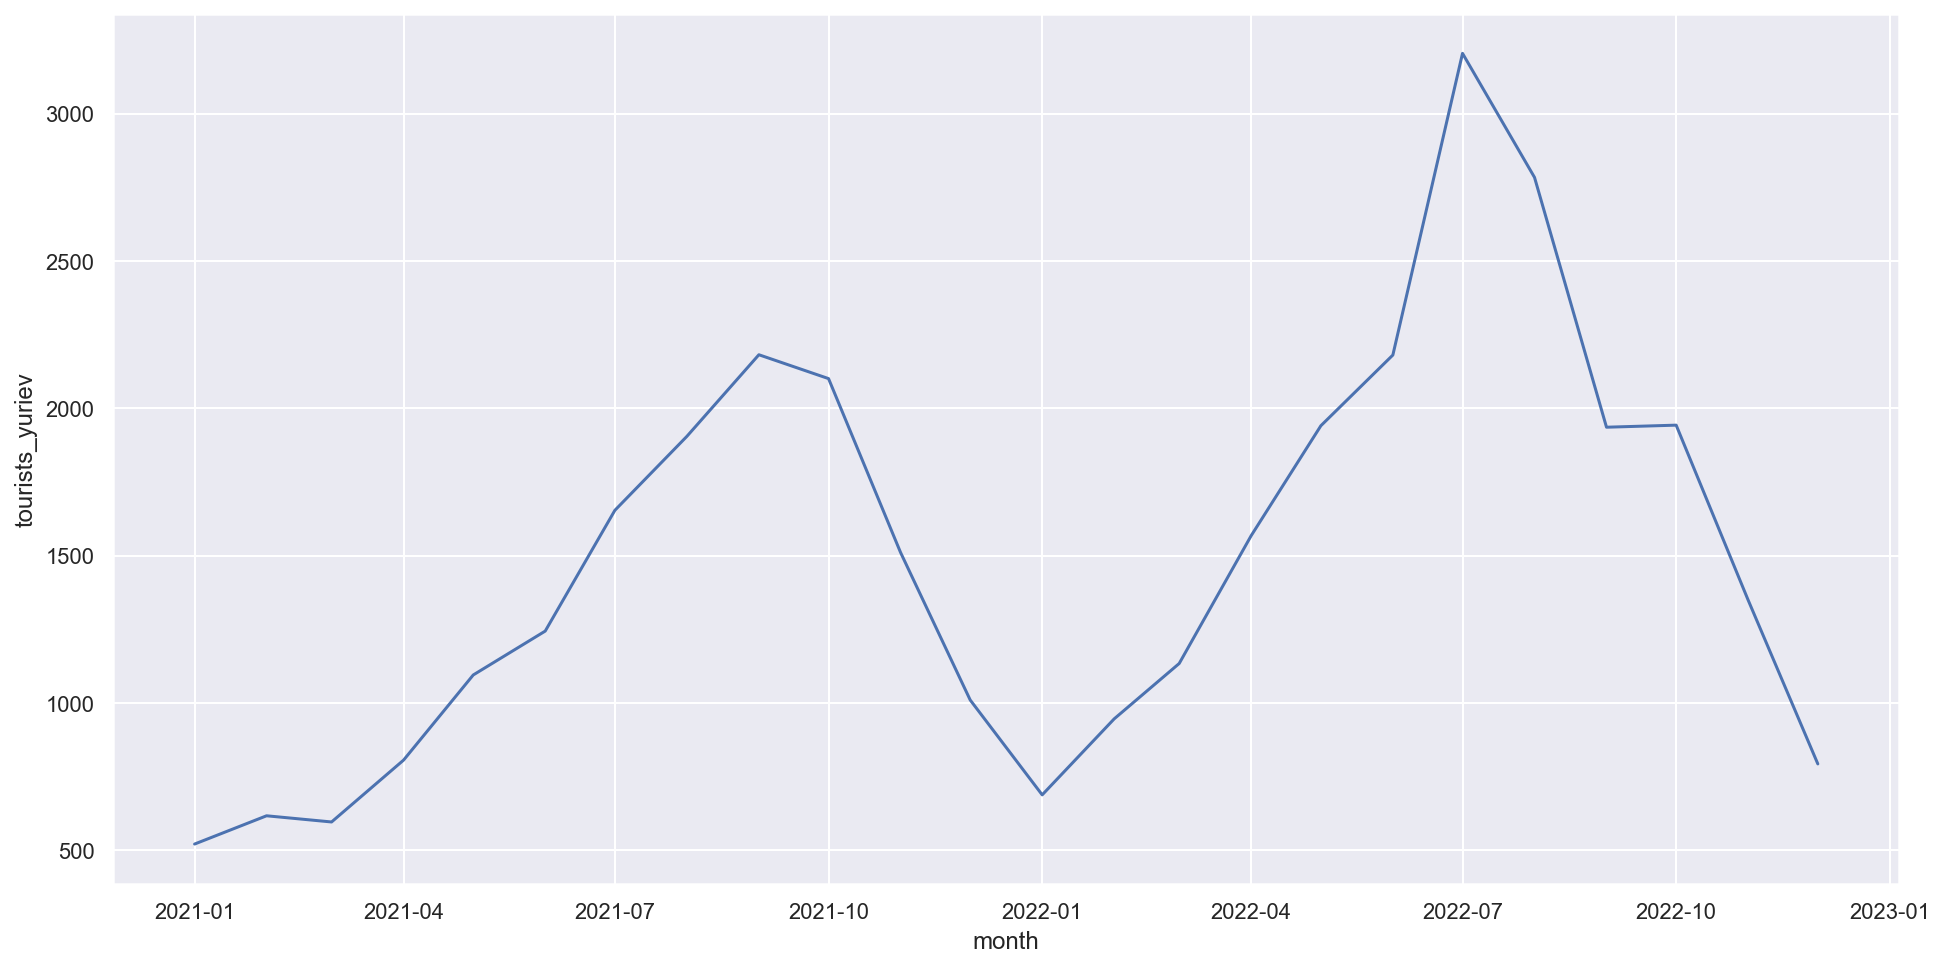

In [46]:
time_yuriev = yuriev.groupby(['snap_date'], as_index=False).agg({'id_hash' : 'count'})\
.rename(columns={'snap_date':'month', 'id_hash' : 'tourists_yuriev'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'tourists_yuriev', data = time_yuriev)

## Среднее количество дней, 2021-2022

<AxesSubplot:xlabel='month', ylabel='average_days_yuriev'>

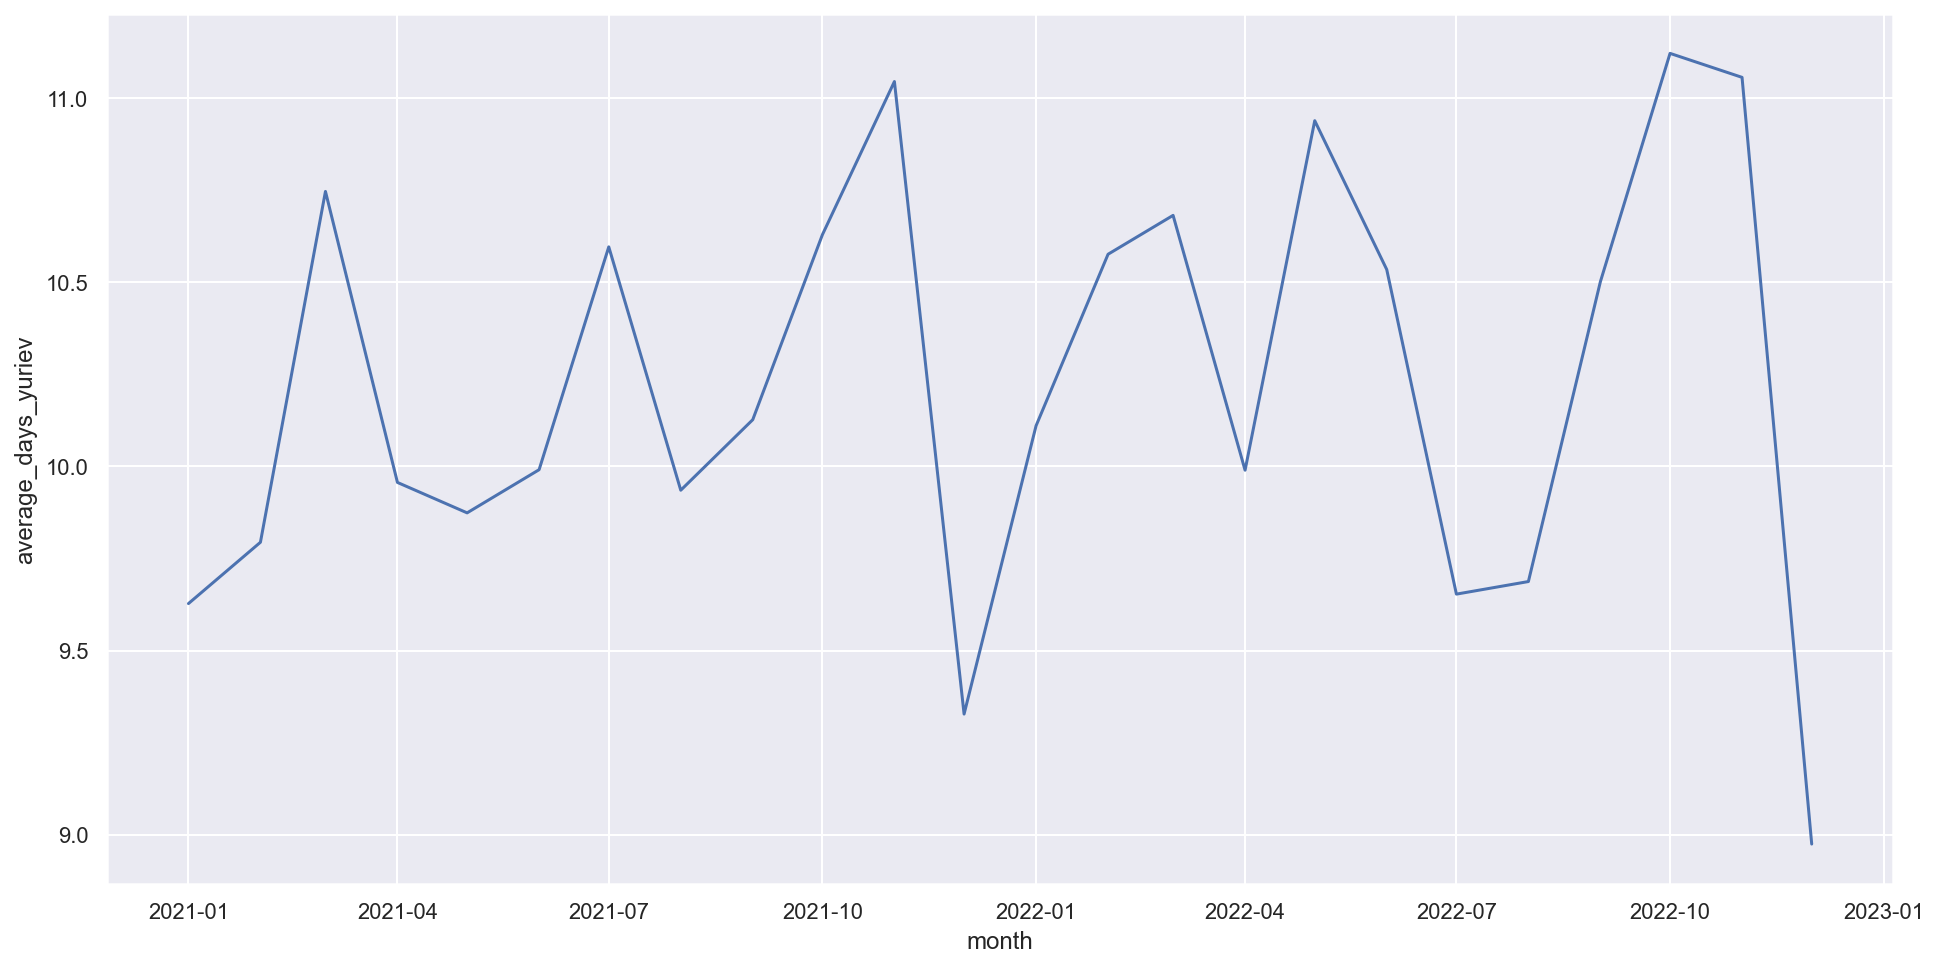

In [47]:
days_yuriev = yuriev.groupby(['snap_date'], as_index=False).agg({'days' : 'mean'})\
.rename(columns={'snap_date':'month', 'days' : 'average_days_yuriev'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'average_days_yuriev', data = days_yuriev)

## Топ интересы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='interest'>

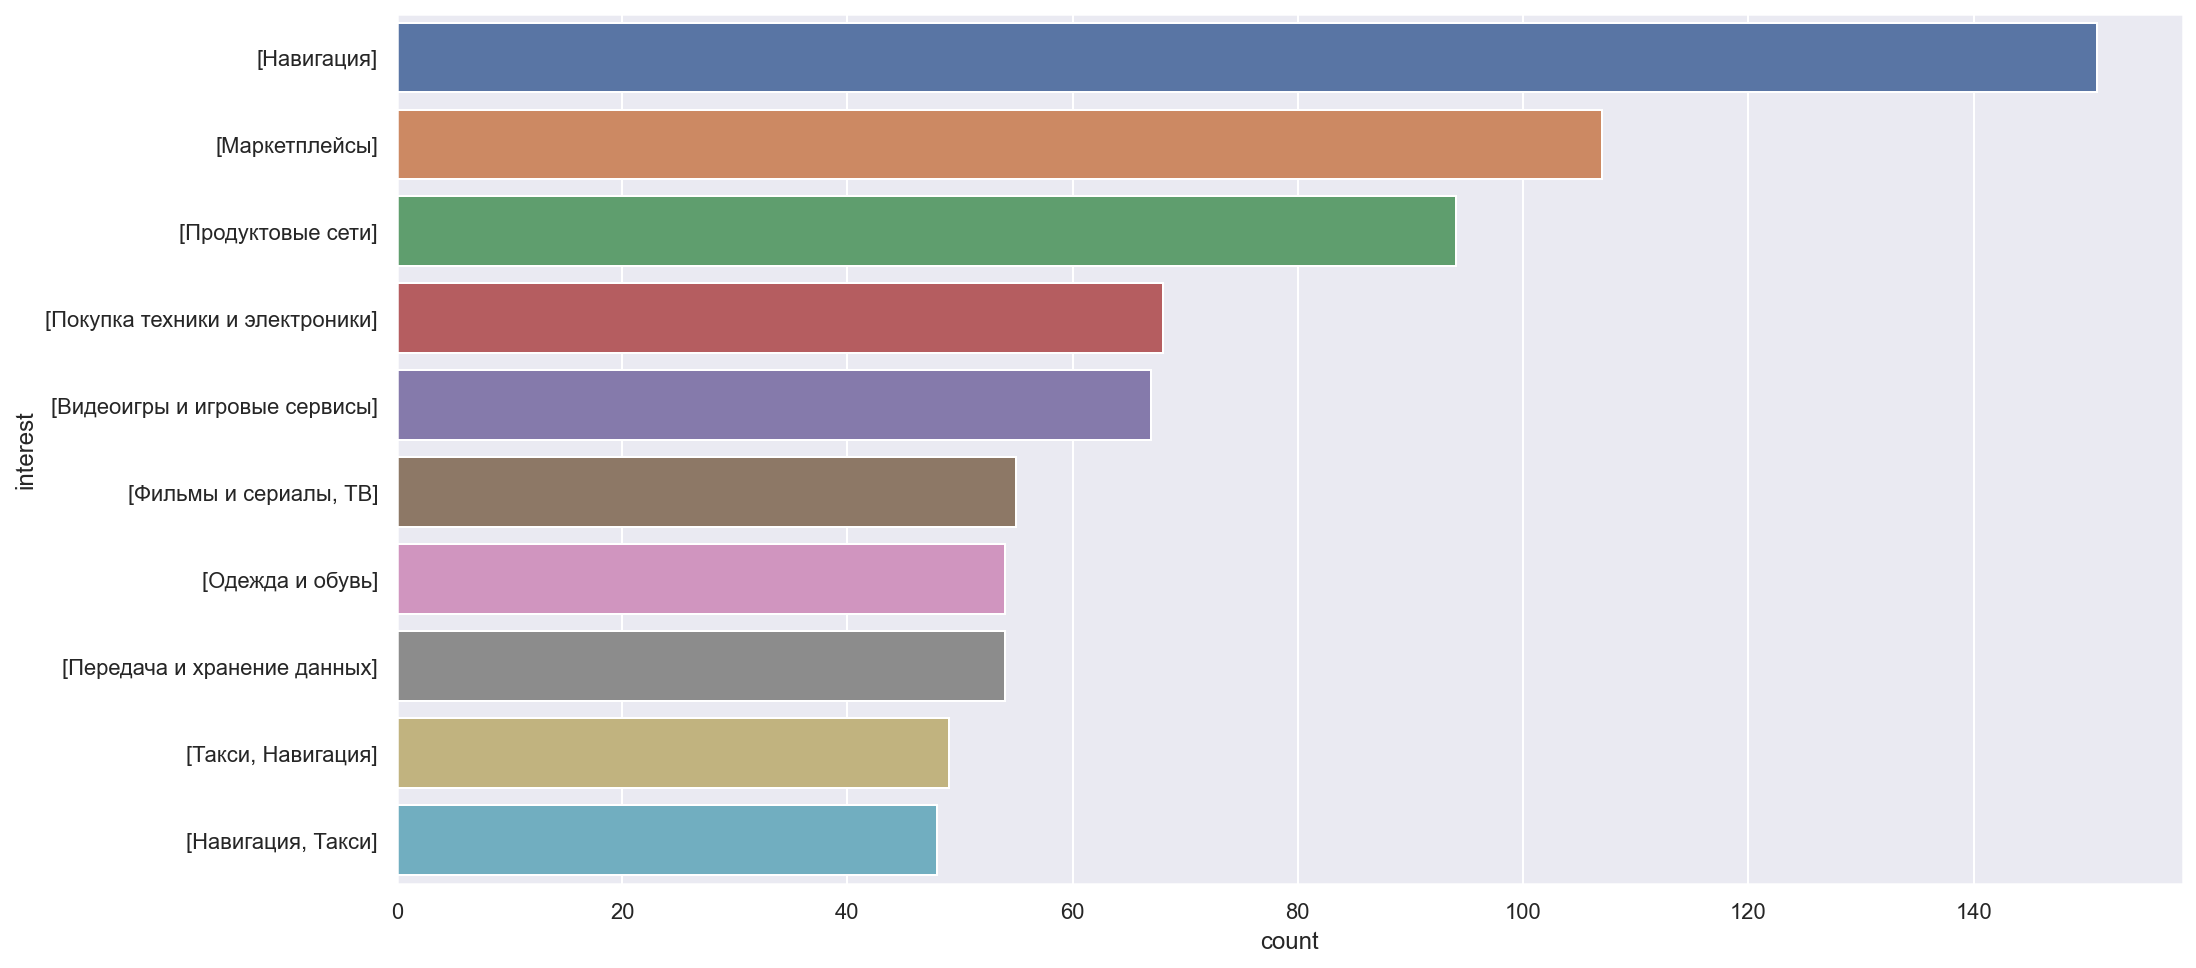

In [135]:
interests_yuriev = yuriev[~yuriev['interests'].isna()]['interests']
df_interests_yuriev = interests_yuriev.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'interest', 'interests' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_interests_yuriev[:10], x='count', y='interest', orient='h')

## Топ сервисы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='service'>

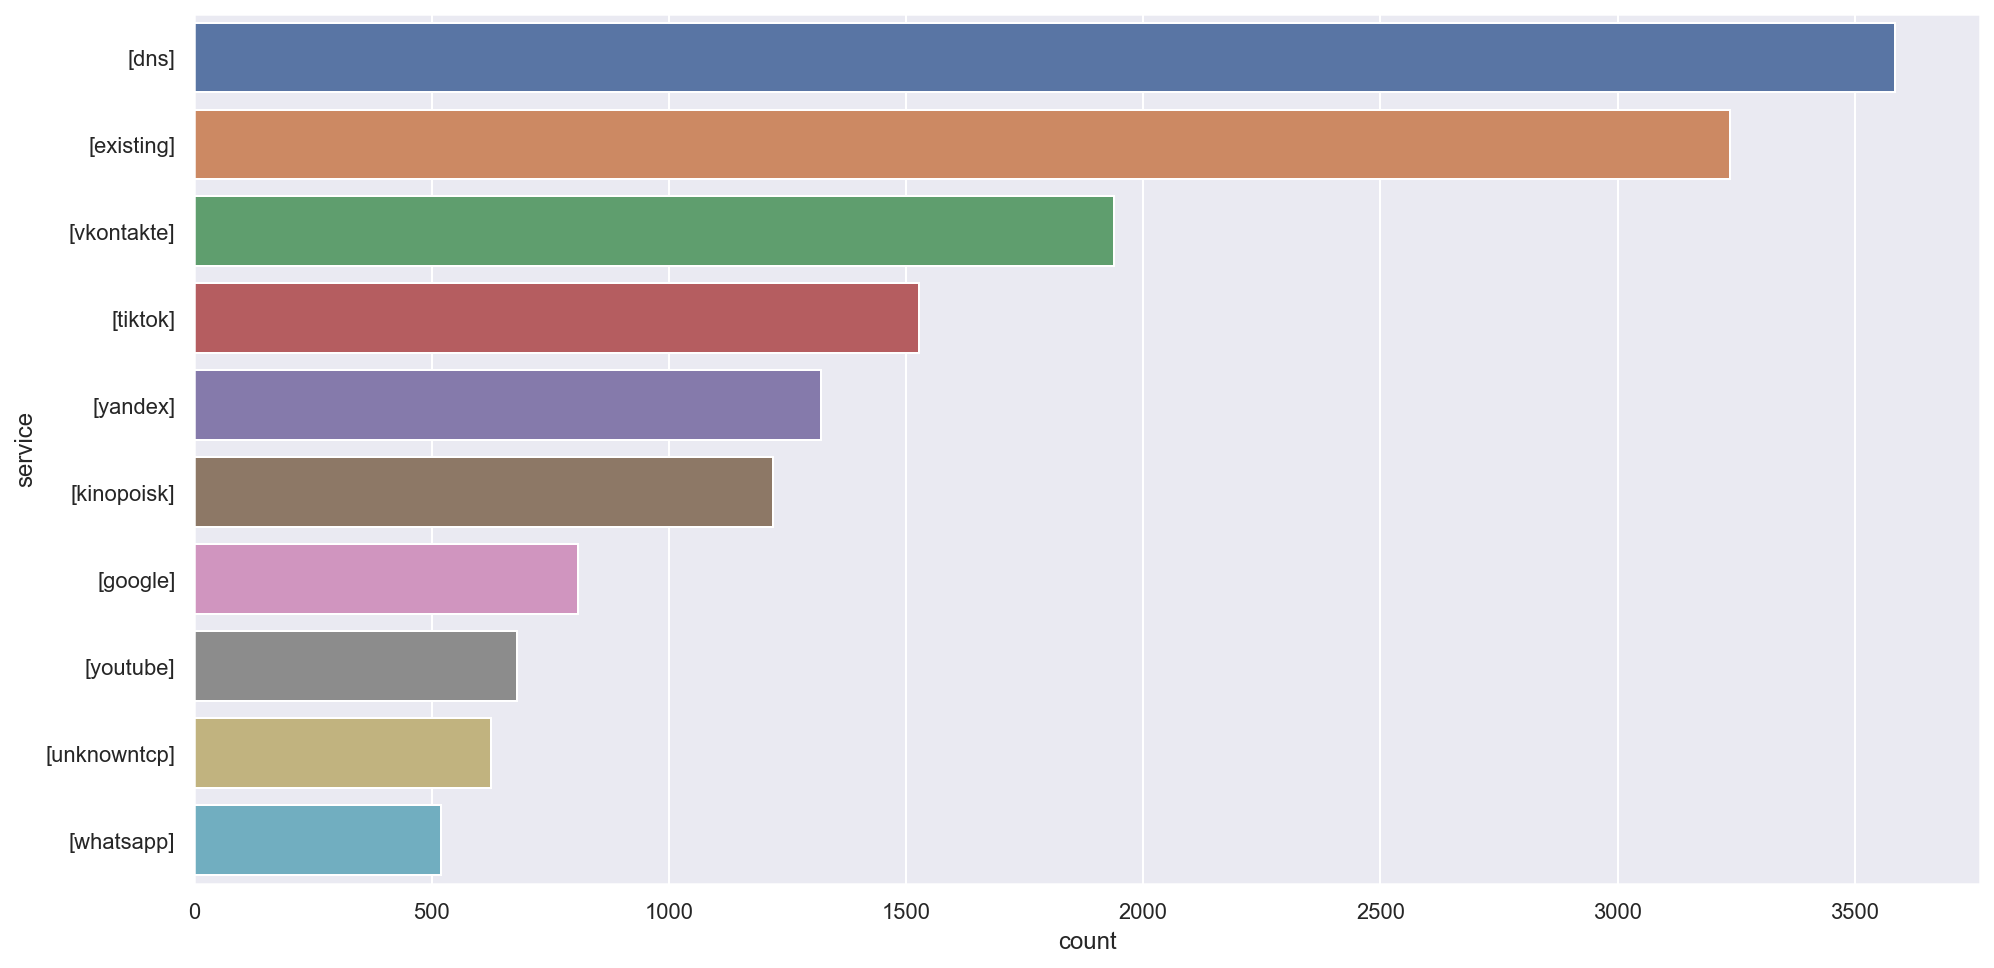

In [43]:
services_yuriev = yuriev[~yuriev['top_service'].isna()]['top_service']
df_services_yuriev = services_yuriev.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'service', 'top_service' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_services_yuriev[:10], x='count', y='service', orient='h')

## Откуда приезжают (ИСПРАВИТЬ)

In [86]:
from_yuriev = yuriev.home_region.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'home_region', 'home_region' : 'count'})\
           .sort_values(by='count', ascending = False)

from_yuriev

,home_region,count
0,77,17134
1,37,12599
2,52,1014
3,78,948
4,76,434
...,...,...
73,87,2
74,1,1
75,8,1
76,49,1


<AxesSubplot:xlabel='count', ylabel='home_region'>

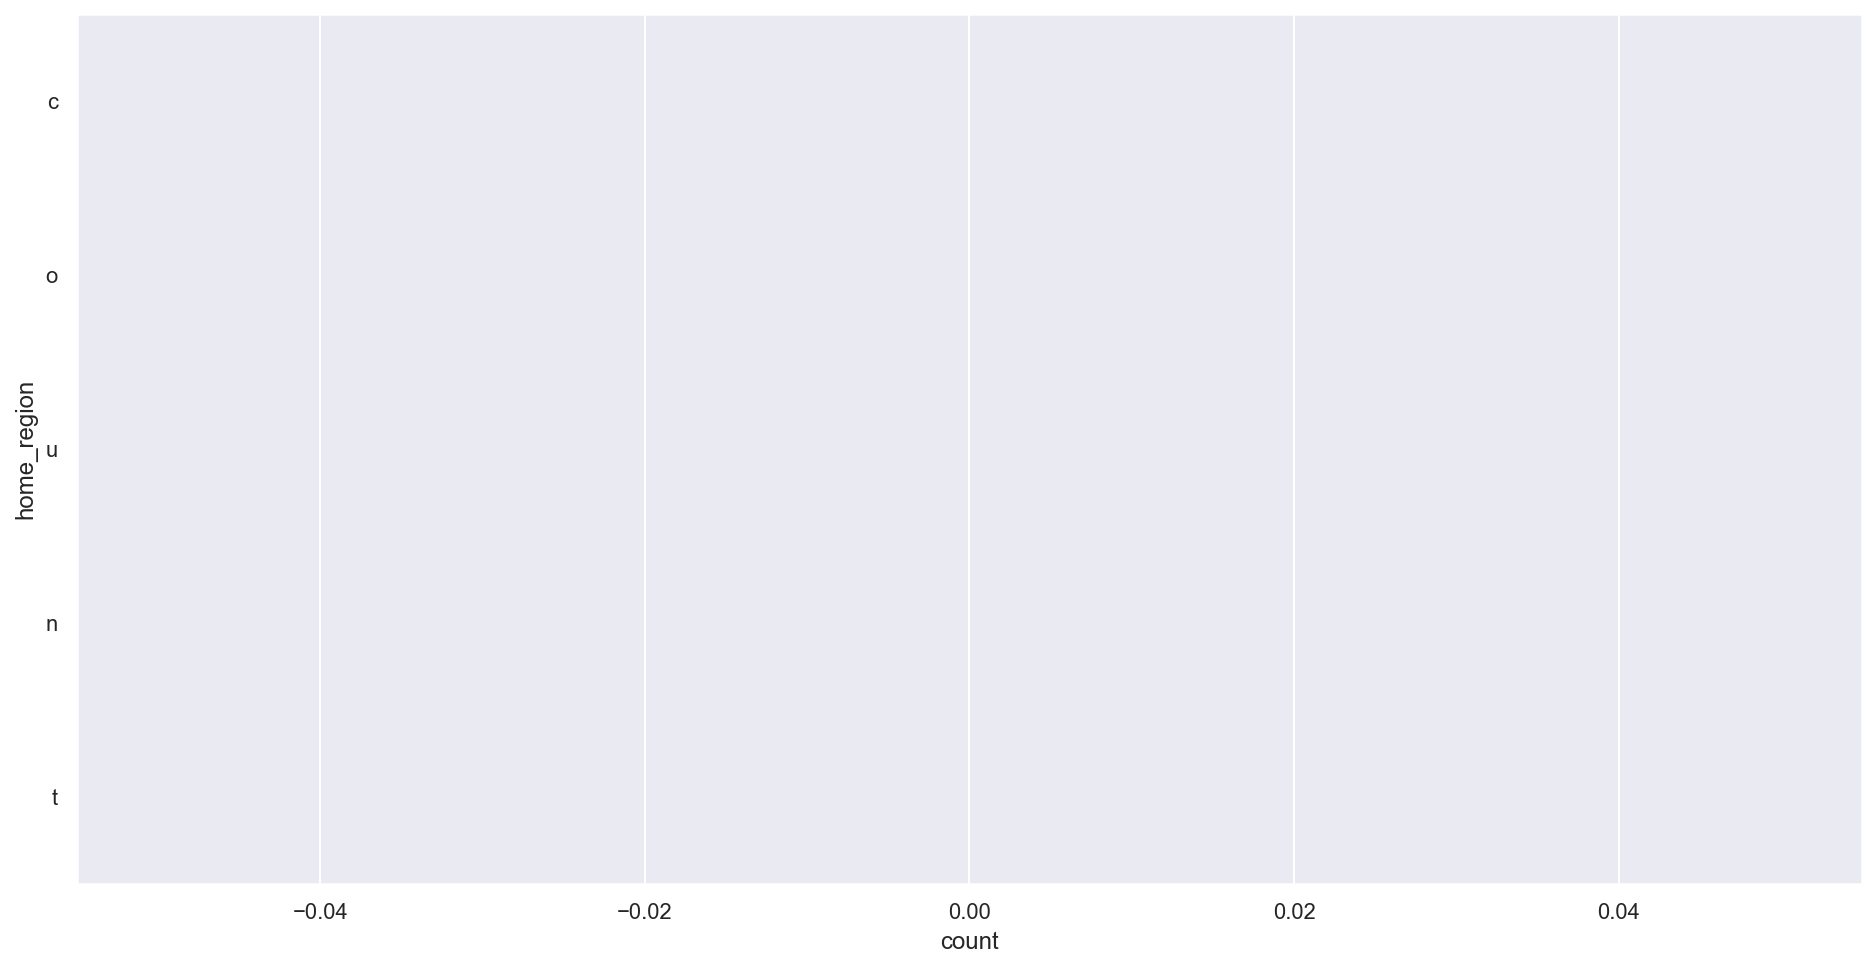

In [90]:
#sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=from_yuriev, x='count', y='home_region', orient='h', order = 'count')

## Прирост турпотока Мегафон по месяцам, 2021-2022

In [37]:
yuriev_month_2021 = yuriev.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2021', 'snap_date': 'month'})[:12]

yuriev_month_2022 = yuriev.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2022', 'snap_date': 'month'})[12:]\
.set_index([pd.Index([i for i in range(12)])])

yuriev_month = pd.concat([yuriev_month_2021, yuriev_month_2022[['tourists_2022']]], axis = 1)

yuriev_month['change_abs'] = yuriev_month['tourists_2022'] - yuriev_month['tourists_2021'] 
yuriev_month['change_%'] = (yuriev_month['change_abs'] / yuriev_month['tourists_2021']) * 100

yuriev_month

,month,tourists_2021,tourists_2022,change_abs,change_%
0,2021.01.01,521,688,167,32.053743
1,2021.02.01,617,946,329,53.322528
2,2021.03.01,596,1134,538,90.268456
3,2021.04.01,806,1568,762,94.540943
4,2021.05.01,1095,1941,846,77.260274
5,2021.06.01,1244,2181,937,75.321543
6,2021.07.01,1654,3205,1551,93.772672
7,2021.08.01,1905,2784,879,46.141732
8,2021.09.01,2182,1936,-246,-11.274060
9,2021.10.01,2101,1943,-158,-7.520228


# 3. Кольчугино

In [48]:
kolchugino = all_cities[all_cities['city'] == 'Кольчугино']
kolchugino.head(1)

,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou,interests,top_service,volume_sum,dl_volume_sum,ul_volume_sum
0,2021-07-01,74de9d6c11fee908bd6efec30a70e8f2,14,77,33,Кольчугино,2,31,1185.3275,522.7775,804.7317,NaN,NaN,NaN,NaN,NaN


## Турпоток Мегафона, 2021-2022

<AxesSubplot:xlabel='month', ylabel='tourists_kolchugino'>

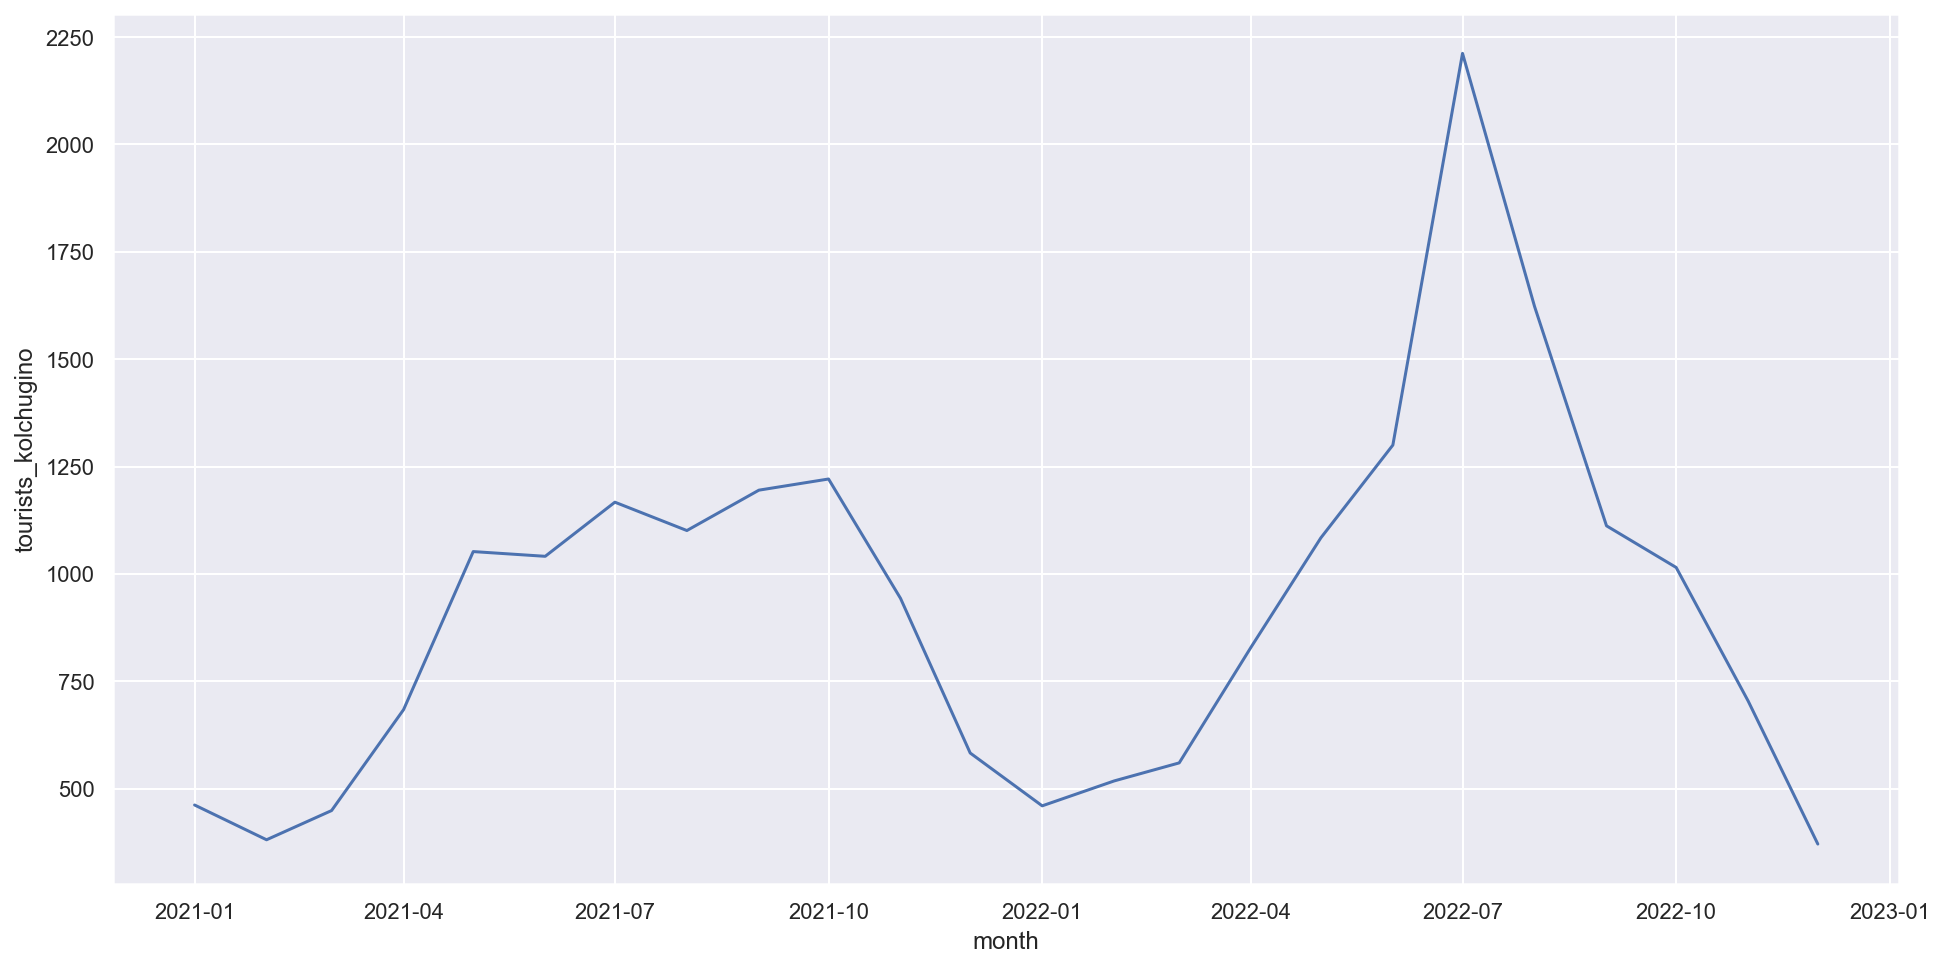

In [49]:
time_kolchugino = kolchugino.groupby(['snap_date'], as_index=False).agg({'id_hash' : 'count'})\
.rename(columns={'snap_date':'month', 'id_hash' : 'tourists_kolchugino'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'tourists_kolchugino', data = time_kolchugino)

## Среднее количество дней, 2021-2022

<AxesSubplot:xlabel='month', ylabel='average_days_kolchugino'>

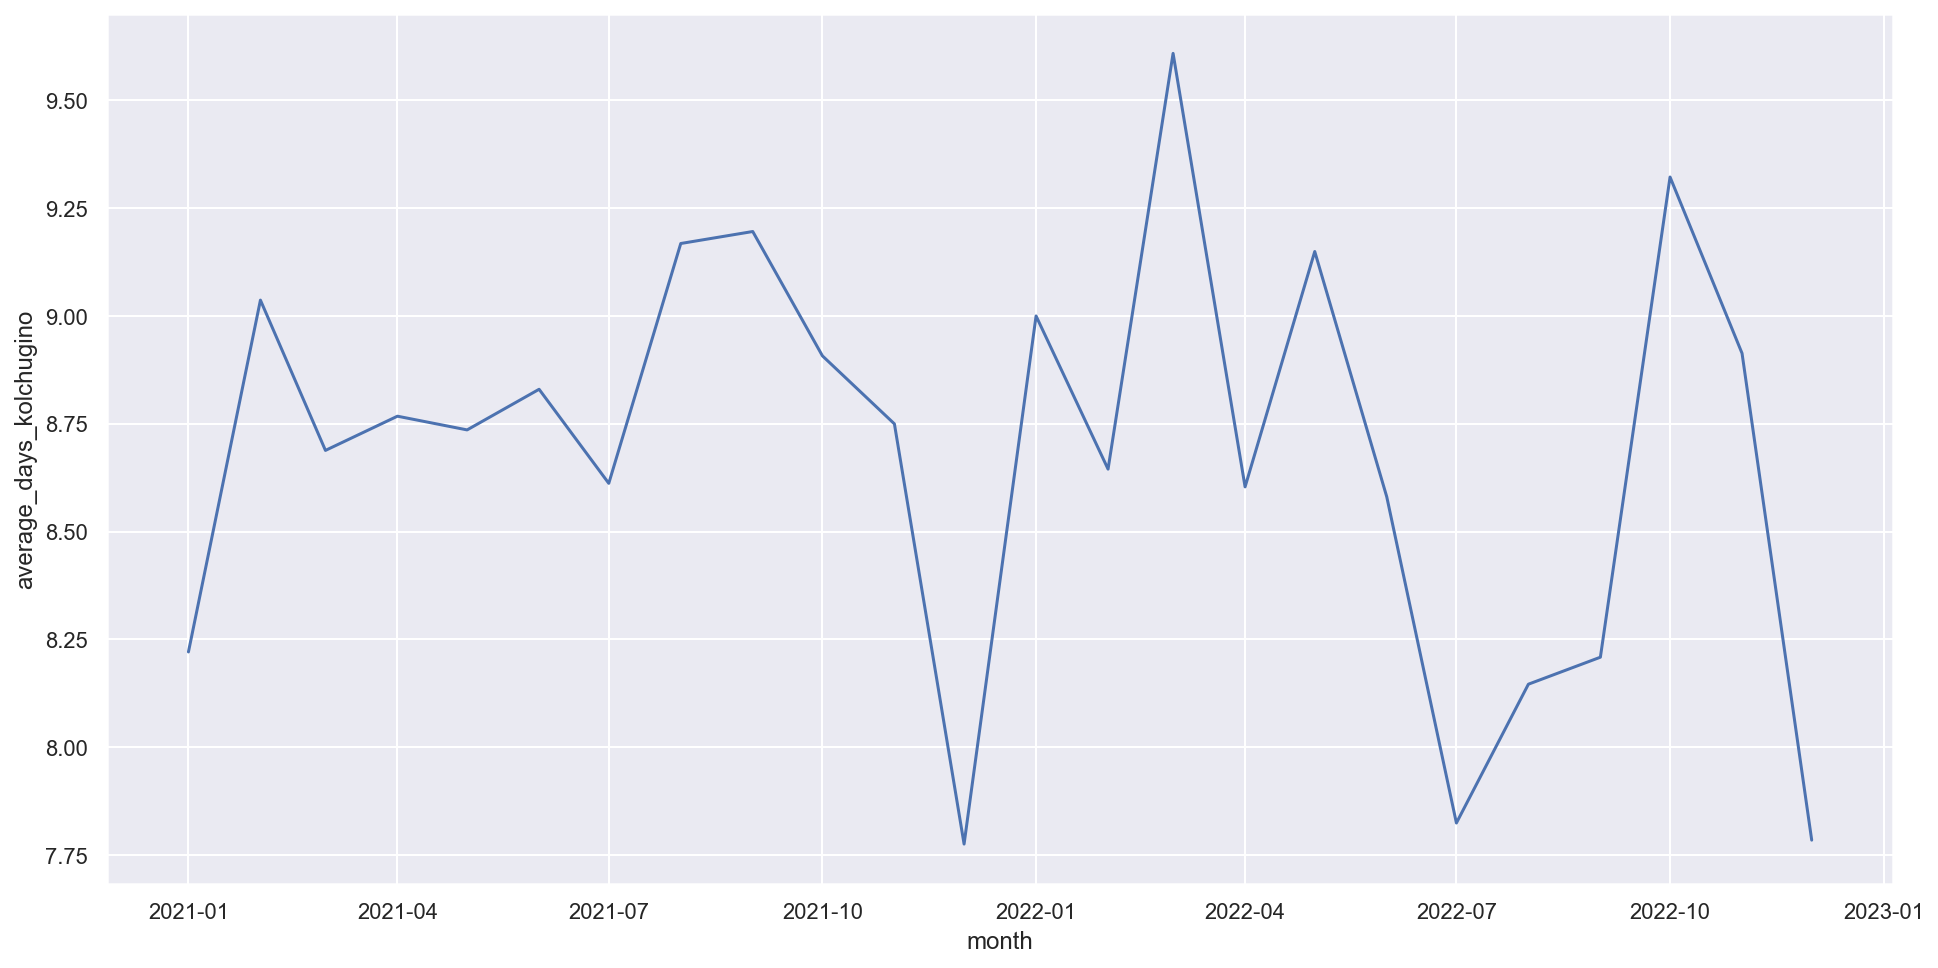

In [50]:
days_kolchugino = kolchugino.groupby(['snap_date'], as_index=False).agg({'days' : 'mean'})\
.rename(columns={'snap_date':'month', 'days' : 'average_days_kolchugino'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'average_days_kolchugino', data = days_kolchugino)

## Топ интересы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='interest'>

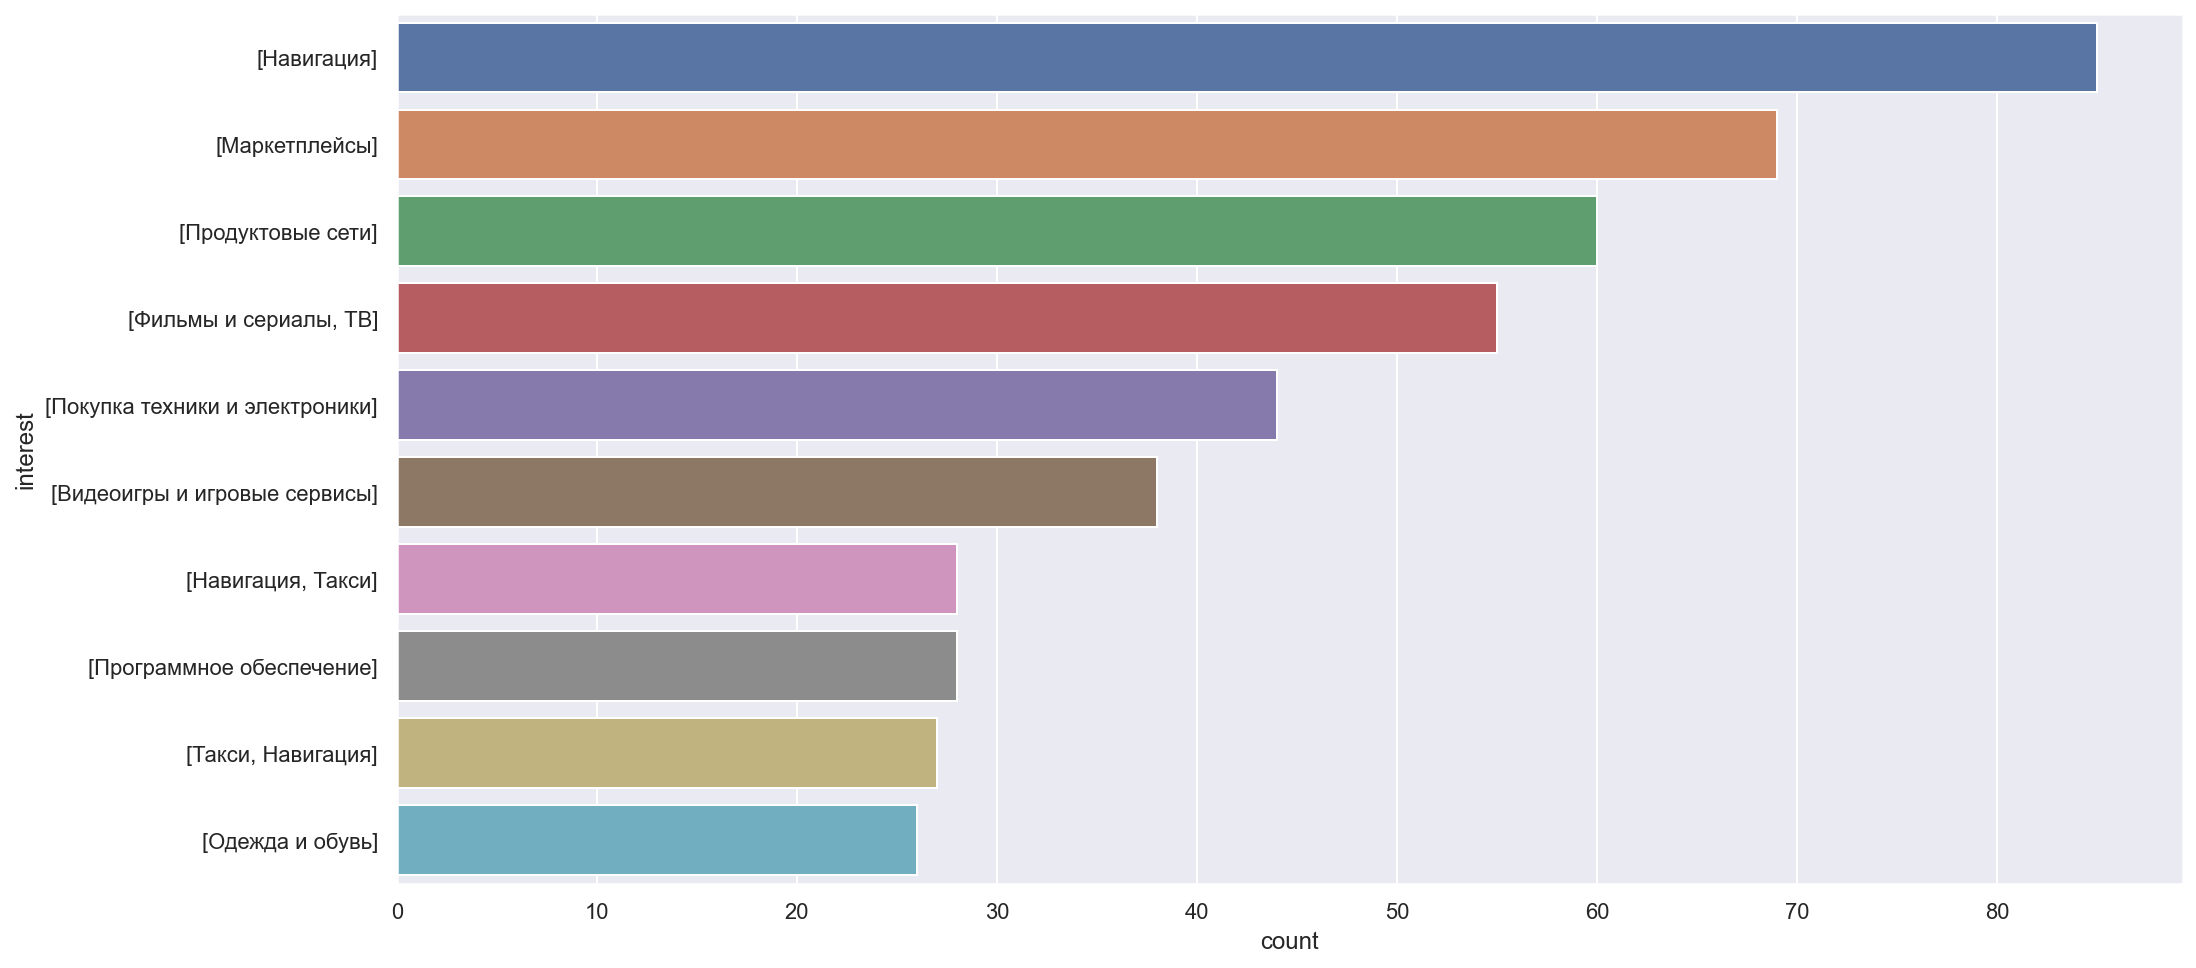

In [136]:
interests_kolchugino = kolchugino[~kolchugino['interests'].isna()]['interests']
df_interests_kolchugino = interests_kolchugino.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'interest', 'interests' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_interests_kolchugino[:10], x='count', y='interest', orient='h')

## Топ сервисы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='service'>

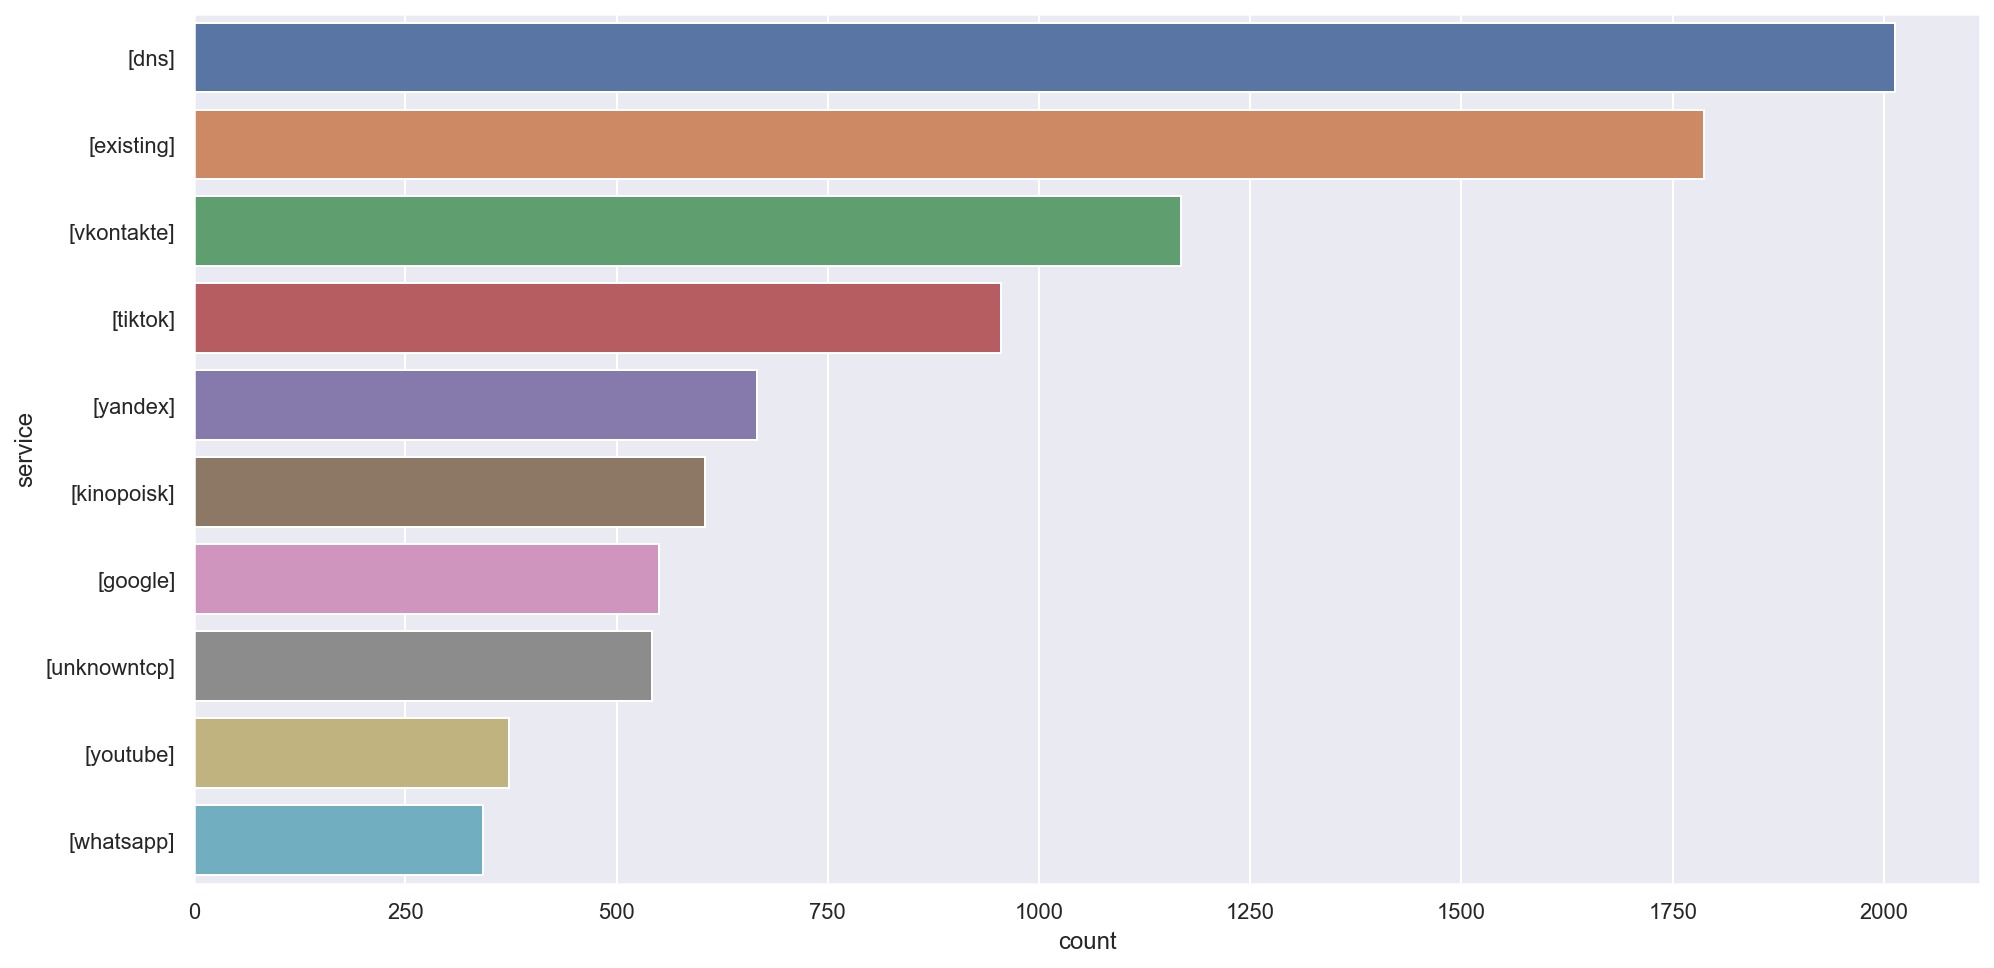

In [42]:
services_kolchugino = kolchugino[~kolchugino['top_service'].isna()]['top_service']
df_services_kolchugino = services_kolchugino.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'service', 'top_service' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_services_kolchugino[:10], x='count', y='service', orient='h')

## Прирост турпотока Мегафона по месяцам, 2021-2022

In [43]:
kolchugino_month_2021 = kolchugino.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2021', 'snap_date': 'month'})[:12]

kolchugino_month_2022 = kolchugino.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2022', 'snap_date': 'month'})[12:]\
.set_index([pd.Index([i for i in range(12)])])

kolchugino_month = pd.concat([kolchugino_month_2021, kolchugino_month_2022[['tourists_2022']]], axis = 1)

kolchugino_month['change_abs'] = kolchugino_month['tourists_2022'] - kolchugino_month['tourists_2021'] 
kolchugino_month['change_%'] = (kolchugino_month['change_abs'] / kolchugino_month['tourists_2021']) * 100

kolchugino_month

,month,tourists_2021,tourists_2022,change_abs,change_%
0,2021-01-01,462,460,-2,-0.432900
1,2021-02-01,381,518,137,35.958005
2,2021-03-01,449,560,111,24.721604
3,2021-04-01,684,830,146,21.345029
4,2021-05-01,1052,1084,32,3.041825
5,2021-06-01,1041,1300,259,24.879923
6,2021-07-01,1167,2212,1045,89.545844
7,2021-08-01,1101,1623,522,47.411444
8,2021-09-01,1195,1112,-83,-6.945607
9,2021-10-01,1221,1015,-206,-16.871417


# 4. Сортавала

In [44]:
sortavala = all_cities[all_cities['city'] == 'Сортавала']
sortavala.head(1)

,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou,interests,top_service,volume_sum,dl_volume_sum,ul_volume_sum
0,2021-07-01,67f2696dfa0a3fc987621d78801906f5,4,77,10,Сортавала,2,44,438.6025,159.845,2623.4065,NaN,NaN,NaN,NaN,NaN


## Турпоток Мегафона, 2021-2022

<AxesSubplot:xlabel='month', ylabel='tourists_sortavala'>

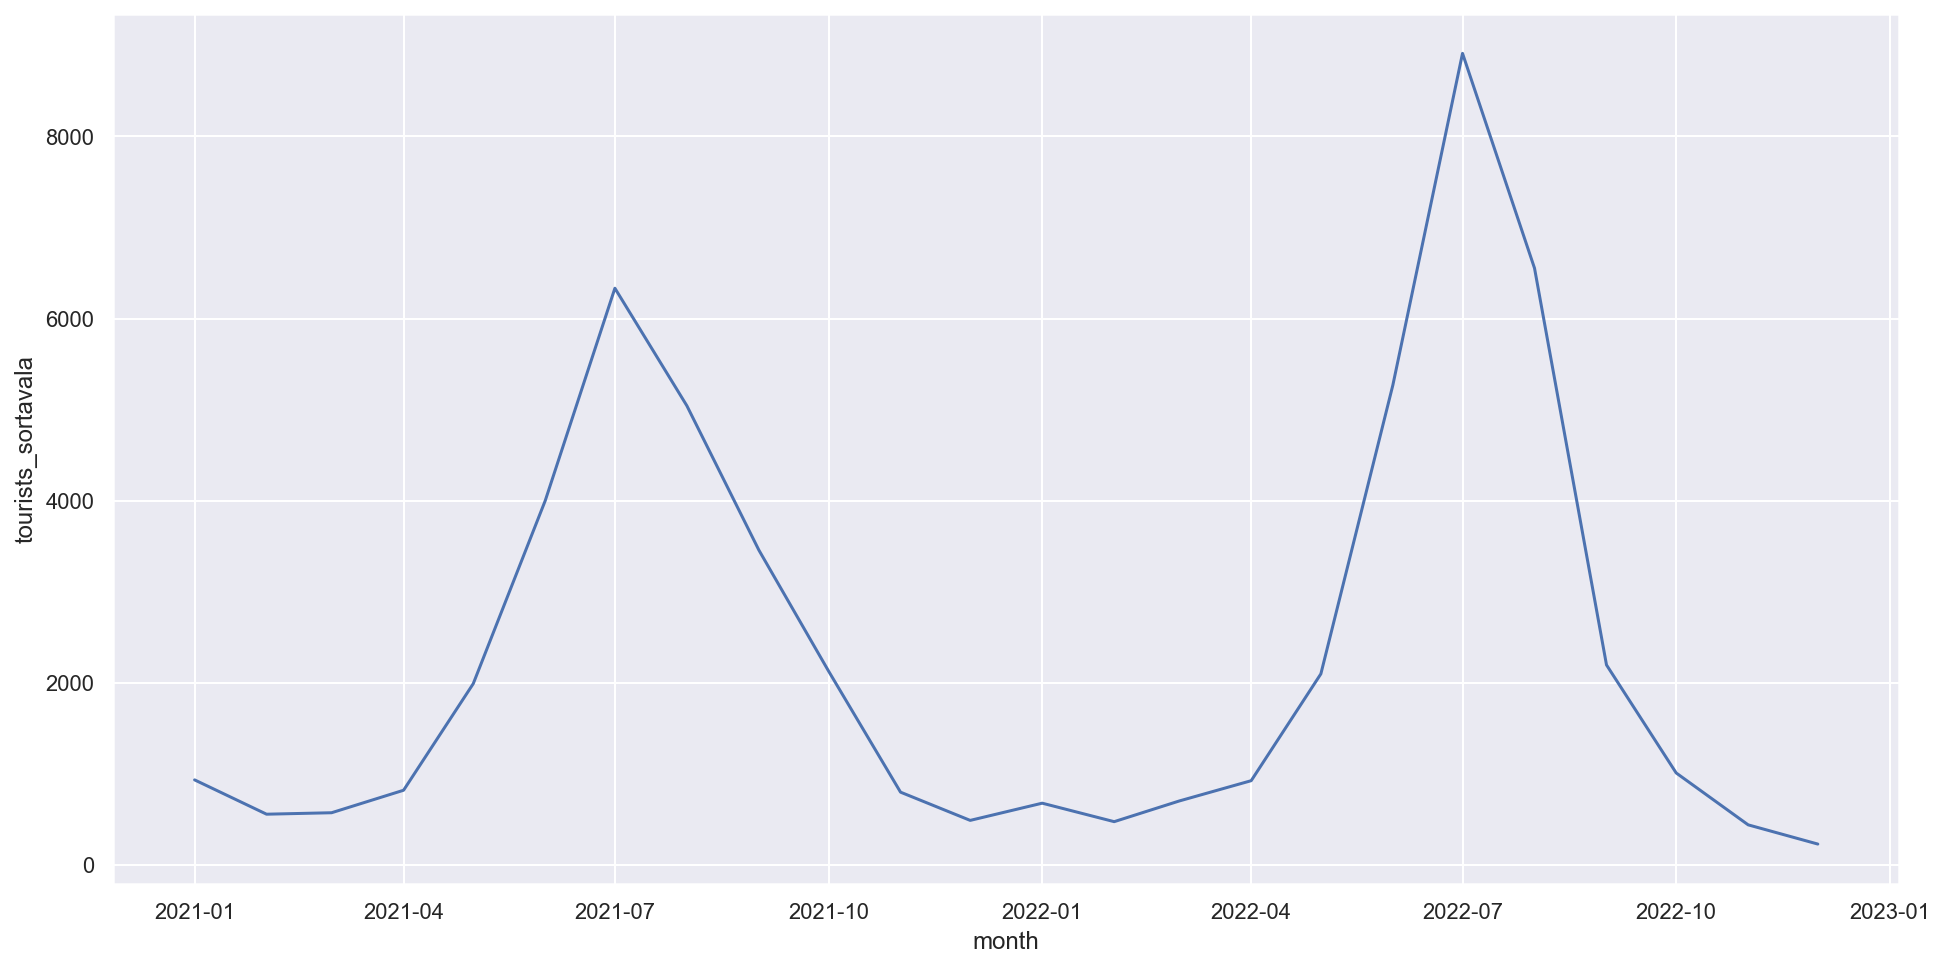

In [51]:
time_sortavala = sortavala.groupby(['snap_date'], as_index=False).agg({'id_hash' : 'count'})\
.rename(columns={'snap_date':'month', 'id_hash' : 'tourists_sortavala'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'tourists_sortavala', data = time_sortavala)

## Среднее количество дней, 2021-2022

<AxesSubplot:xlabel='month', ylabel='average_days_sortavala'>

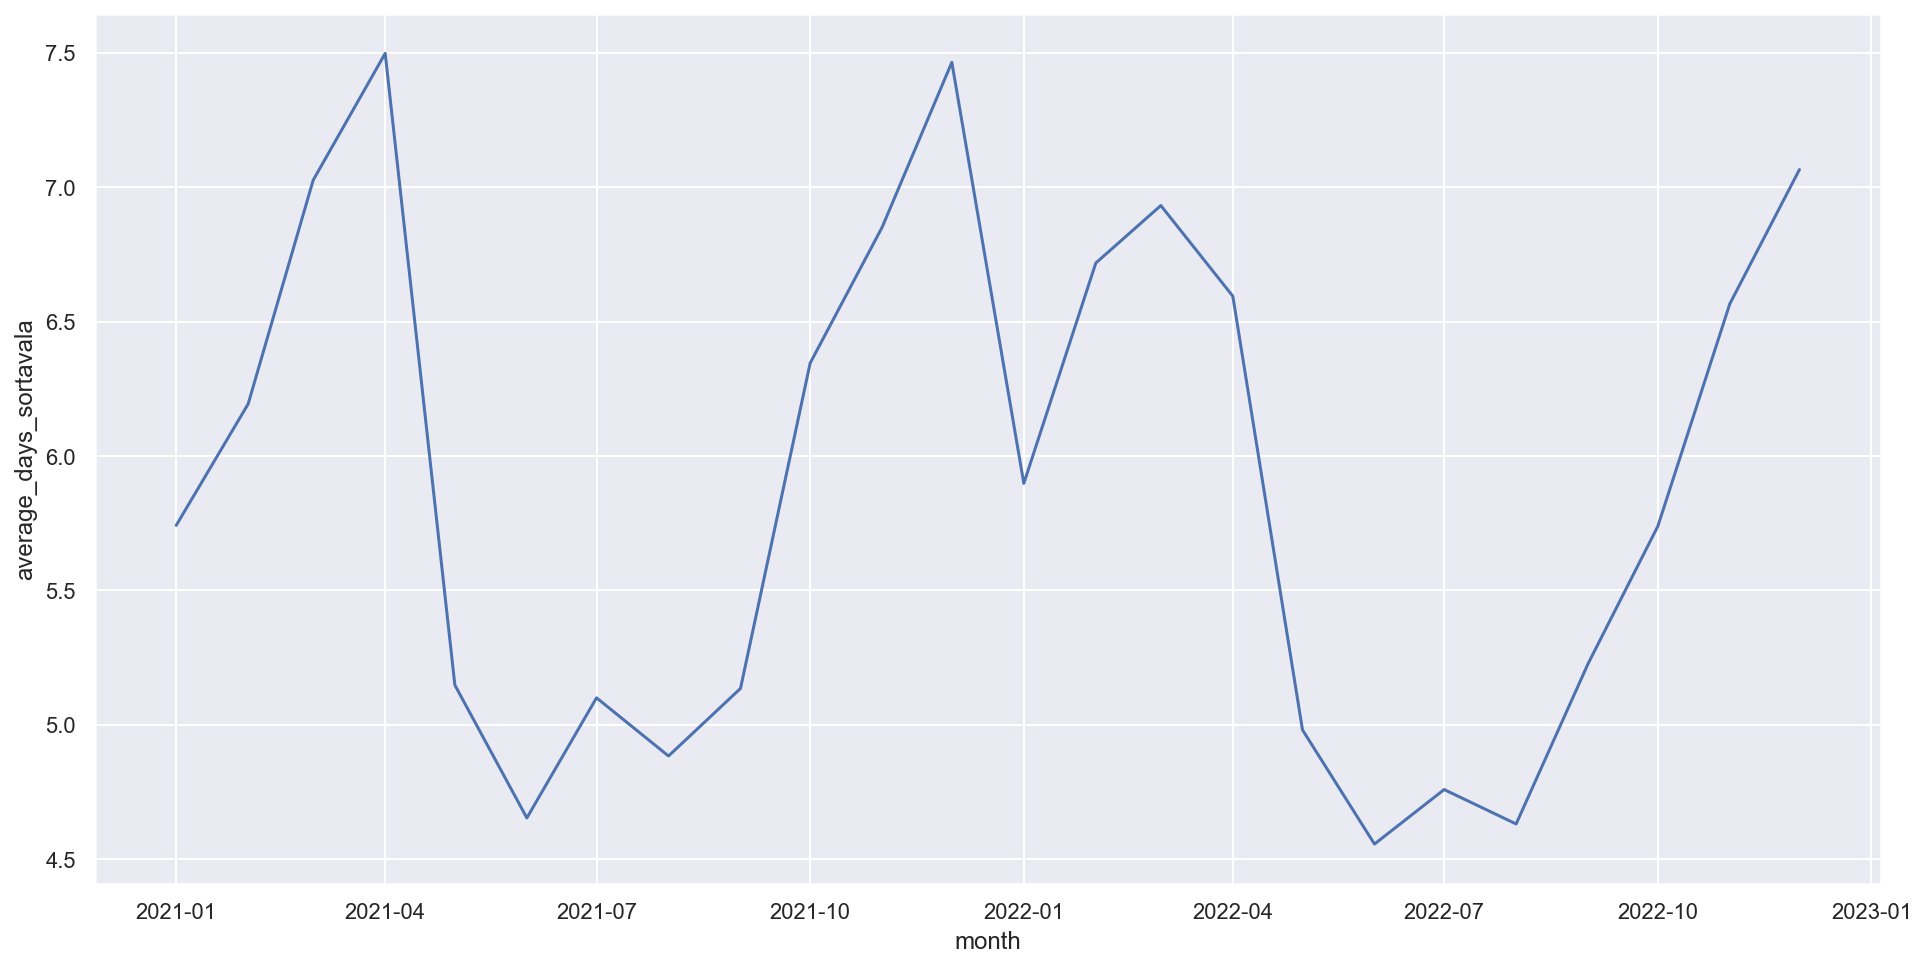

In [52]:
days_sortavala = sortavala.groupby(['snap_date'], as_index=False).agg({'days' : 'mean'})\
.rename(columns={'snap_date':'month', 'days' : 'average_days_sortavala'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'average_days_sortavala', data = days_sortavala)

## Топ интересы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='interest'>

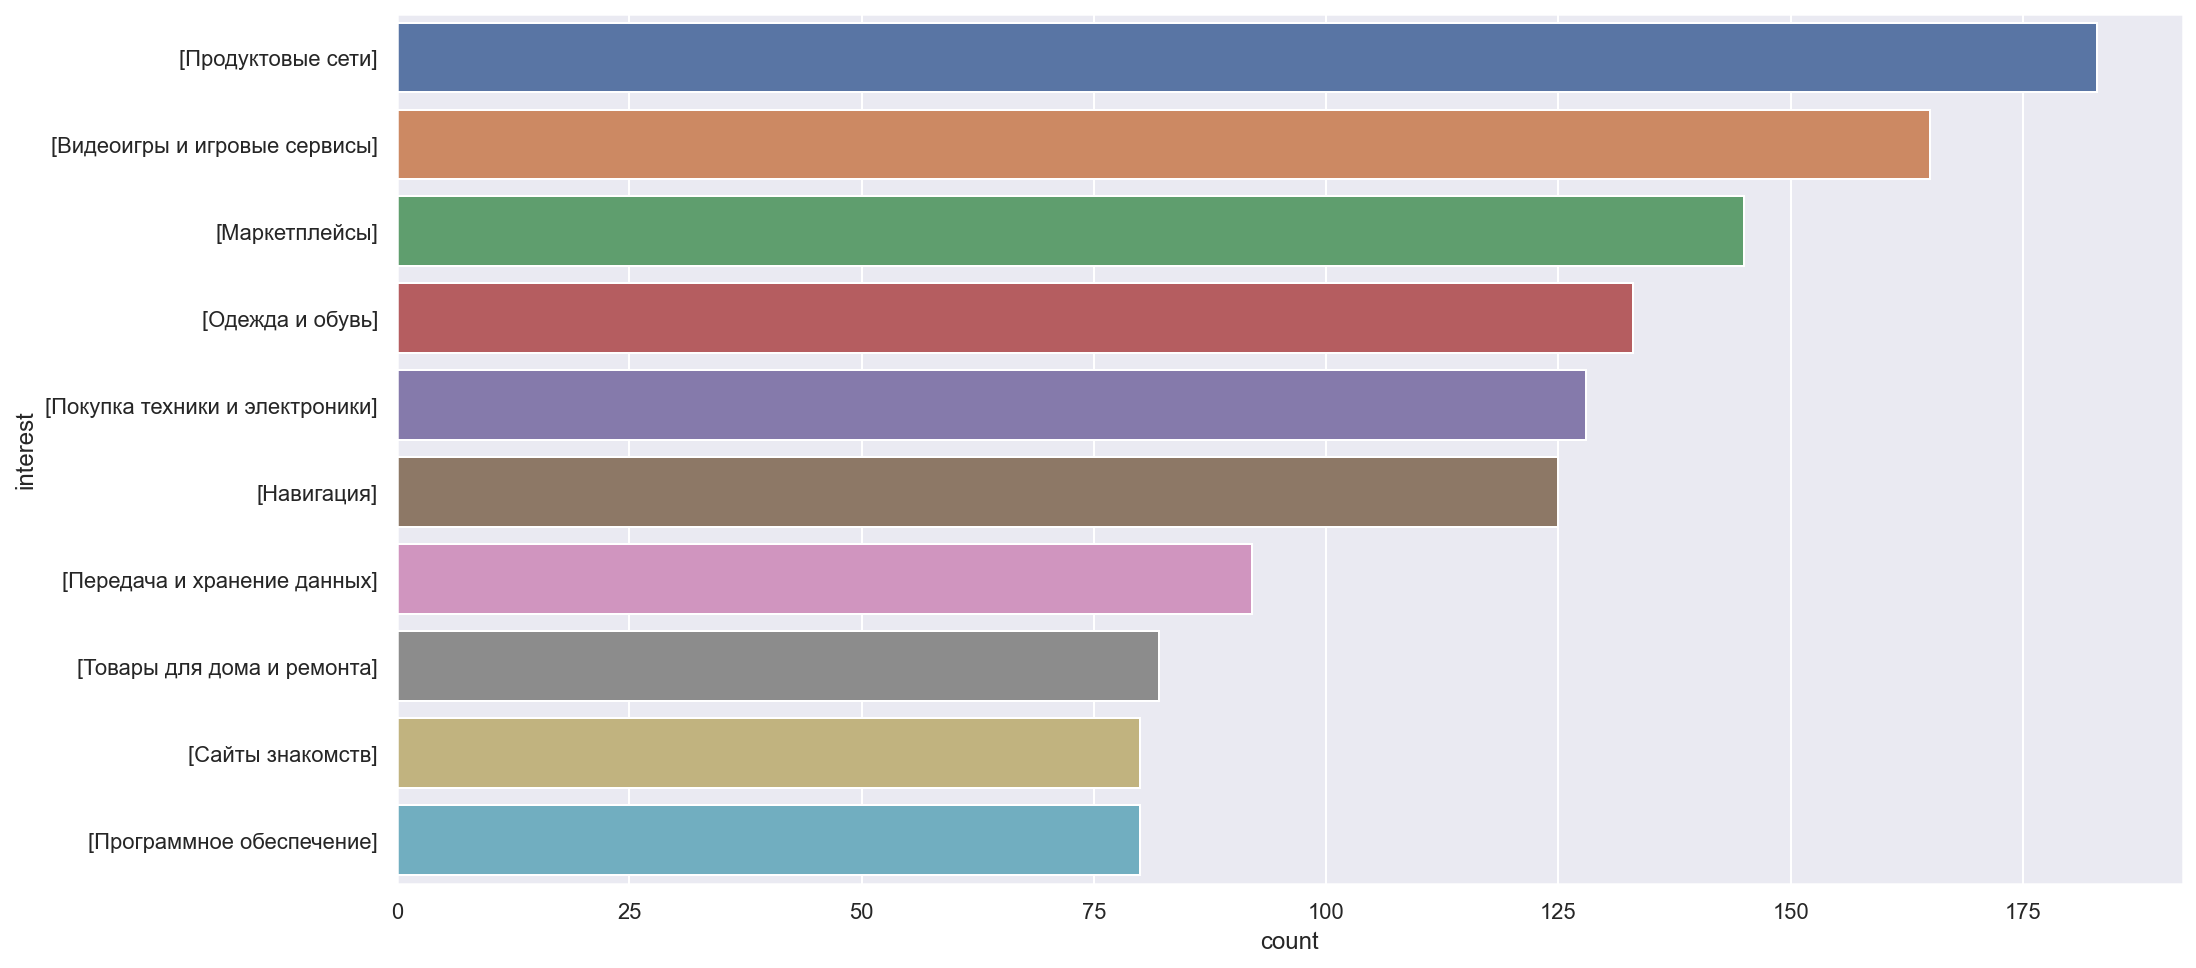

In [137]:
interests_sortavala = sortavala[~sortavala['interests'].isna()]['interests']
df_interests_sortavala = interests_sortavala.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'interest', 'interests' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_interests_sortavala[:10], x='count', y='interest', orient='h')

## Топ сервисы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='service'>

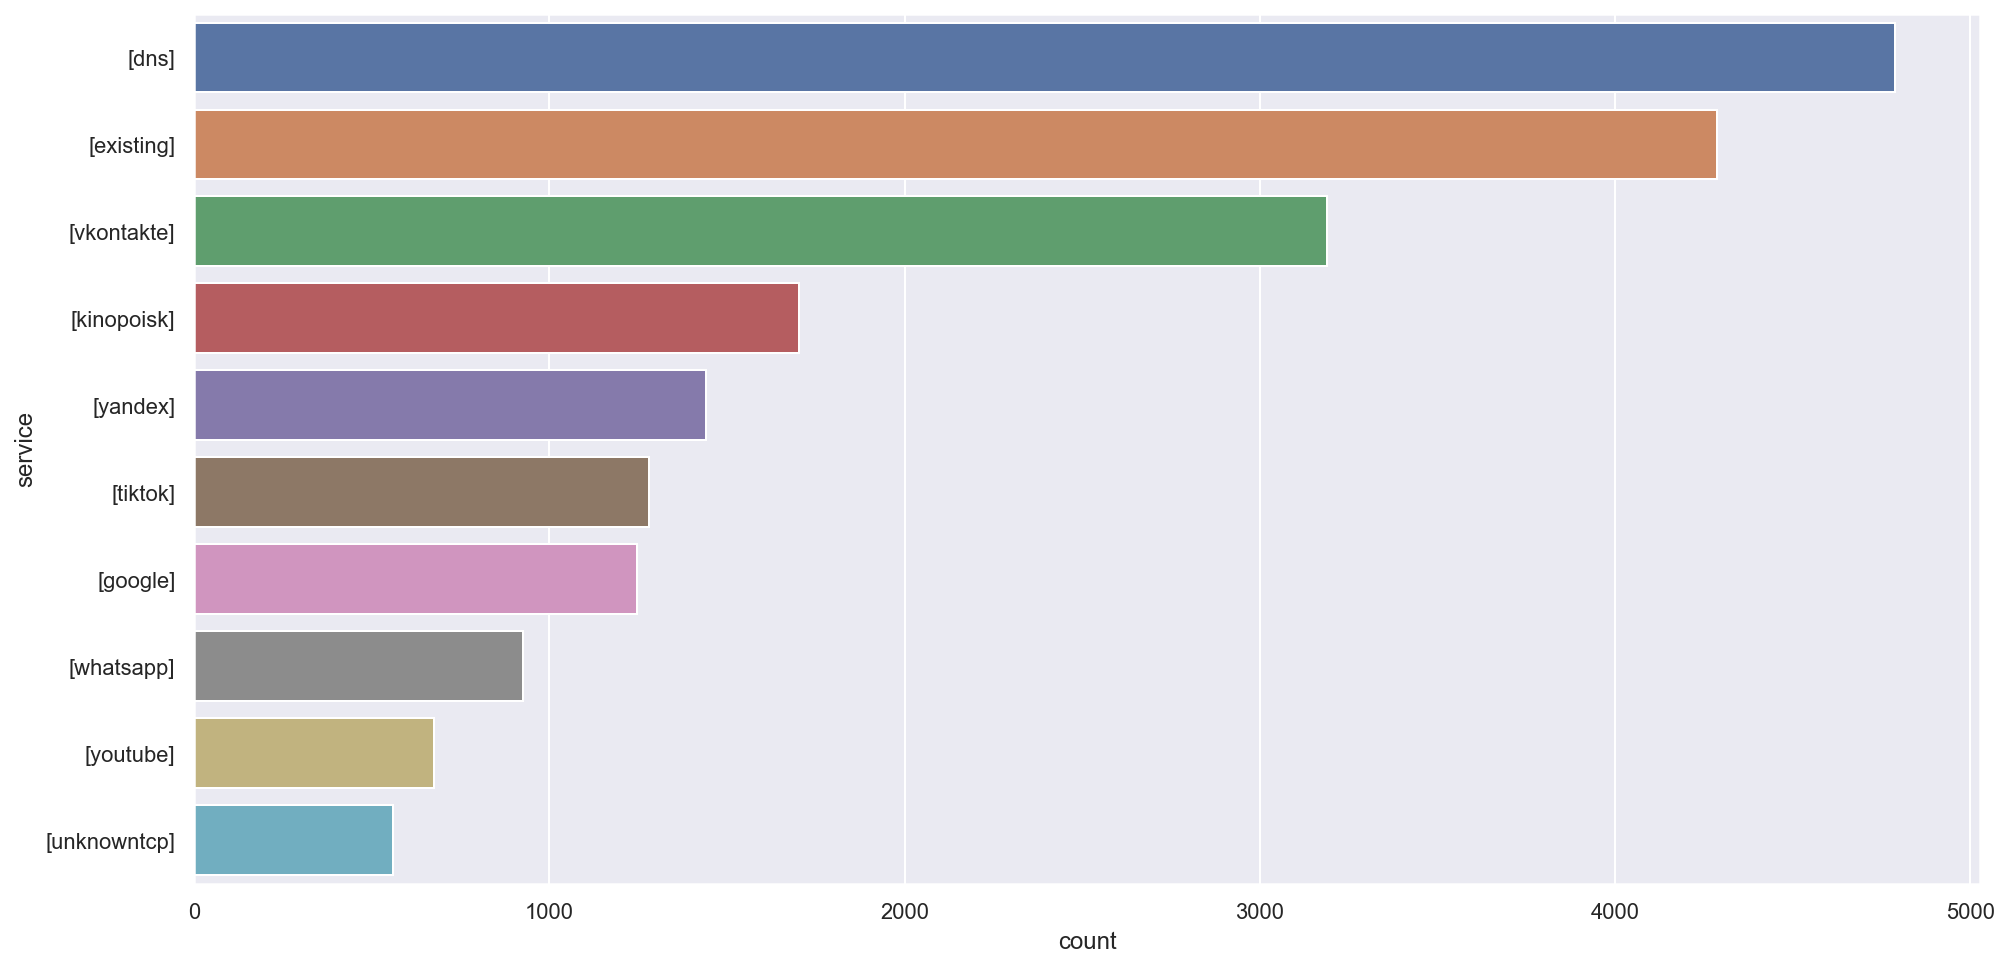

In [141]:
services_sortavala = sortavala[~sortavala['top_service'].isna()]['top_service']
df_services_sortavala = services_sortavala.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'service', 'top_service' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_services_sortavala[:10], x='count', y='service', orient='h')

## Прирост турпотока Мегафона по месяцам, 2021-2022

In [142]:
sortavala_month_2021 = sortavala.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2021', 'snap_date': 'month'})[:12]

sortavala_month_2022 = sortavala.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2022', 'snap_date': 'month'})[12:]\
.set_index([pd.Index([i for i in range(12)])])

sortavala_month = pd.concat([sortavala_month_2021, sortavala_month_2022[['tourists_2022']]], axis = 1)

sortavala_month['change_abs'] = sortavala_month['tourists_2022'] - sortavala_month['tourists_2021'] 
sortavala_month['change_%'] = (sortavala_month['change_abs'] / sortavala_month['tourists_2021']) * 100

sortavala_month

,month,tourists_2021,tourists_2022,change_abs,change_%
0,2021-01-01,934,678,-256,-27.408994
1,2021-02-01,557,475,-82,-14.721724
2,2021-03-01,573,702,129,22.513089
3,2021-04-01,820,925,105,12.804878
4,2021-05-01,1990,2098,108,5.427136
5,2021-06-01,4000,5269,1269,31.725000
6,2021-07-01,6333,8912,2579,40.723196
7,2021-08-01,5042,6553,1511,29.968267
8,2021-09-01,3457,2196,-1261,-36.476714
9,2021-10-01,2129,1010,-1119,-52.559887


# 5. Славянск-на-Кубани

In [146]:
slavyansk = all_cities[all_cities['city'] == 'Славянск-на-Кубани']
slavyansk.head(1)

,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou,interests,top_service,volume_sum,dl_volume_sum,ul_volume_sum
0,2021-07-01,7f3483561100d78b579db6e815cd6ba1,5,77,23,Славянск-на-Кубани,2,46,73.36,55.3175,3.151026,NaN,NaN,NaN,NaN,NaN


## Турпоток Мегафона, 2021-2022

<AxesSubplot:xlabel='month', ylabel='tourists_slavyansk'>

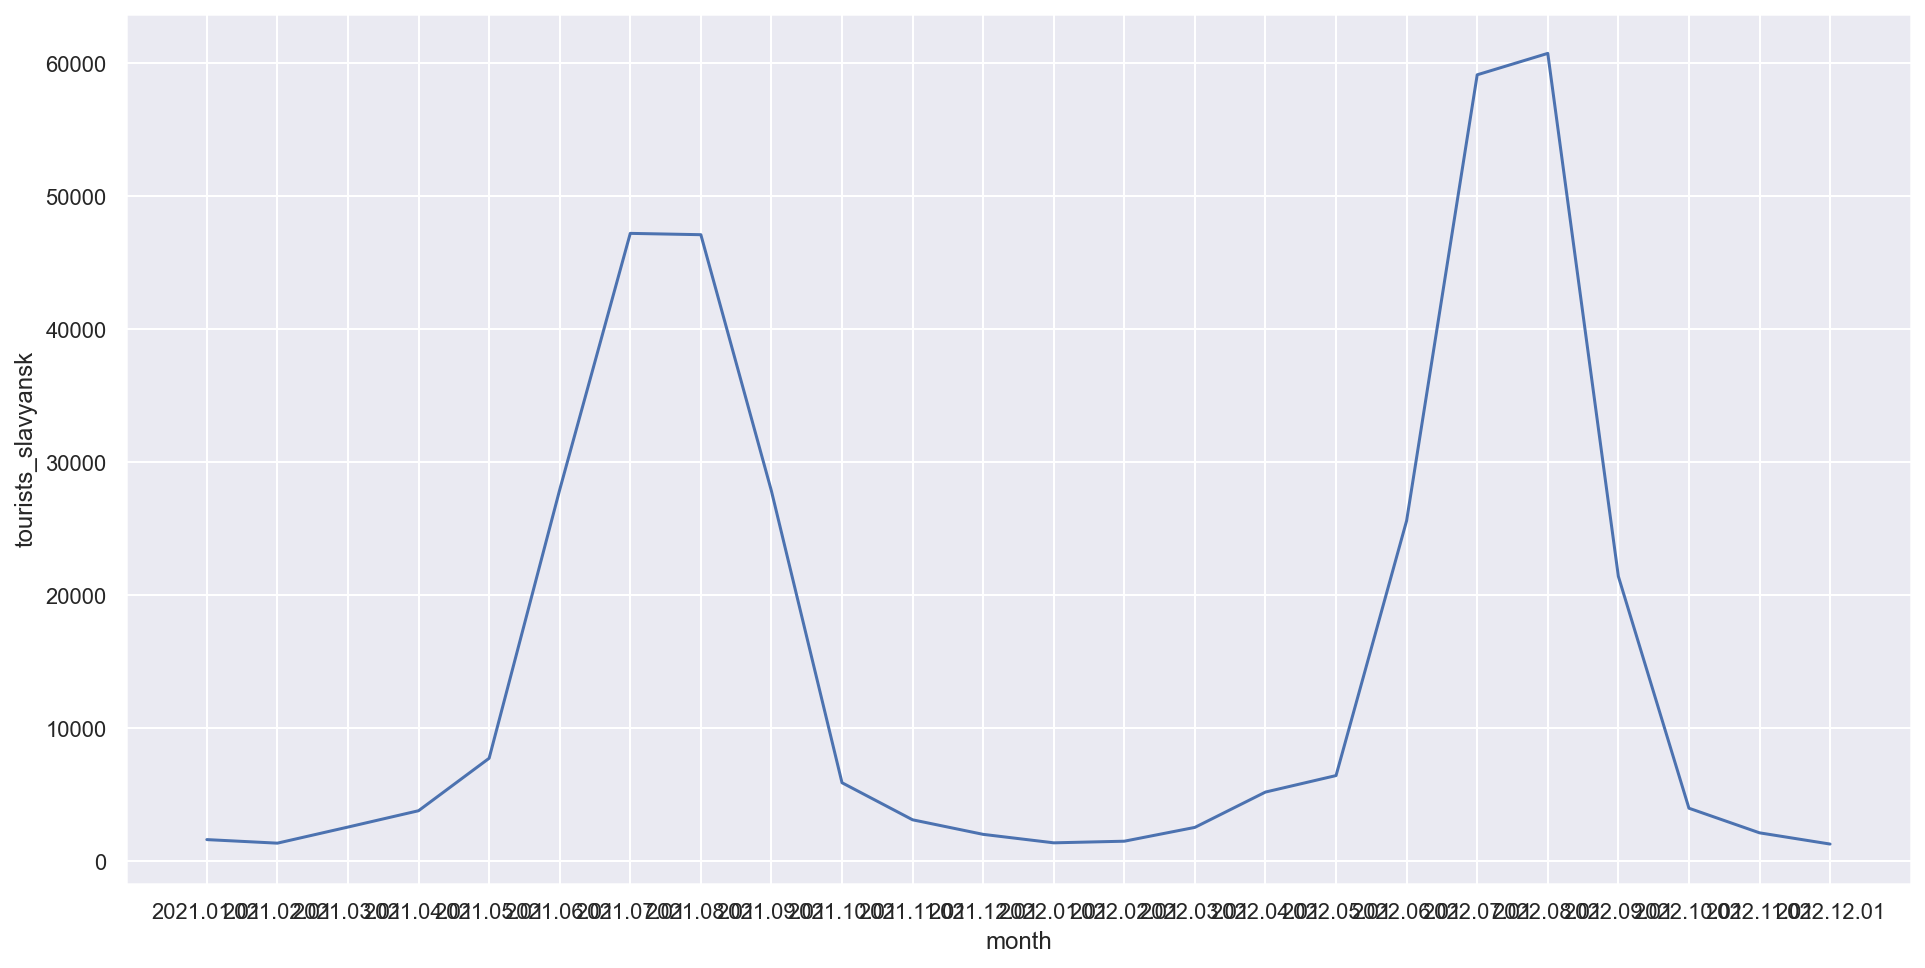

In [53]:
time_slavyansk = slavyansk.groupby(['snap_date'], as_index=False).agg({'id_hash' : 'count'})\
.rename(columns={'snap_date':'month', 'id_hash' : 'tourists_slavyansk'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'tourists_slavyansk', data = time_slavyansk)

## Среднее количество дней, 2021-2022

<AxesSubplot:xlabel='month', ylabel='average_days_slavyansk'>

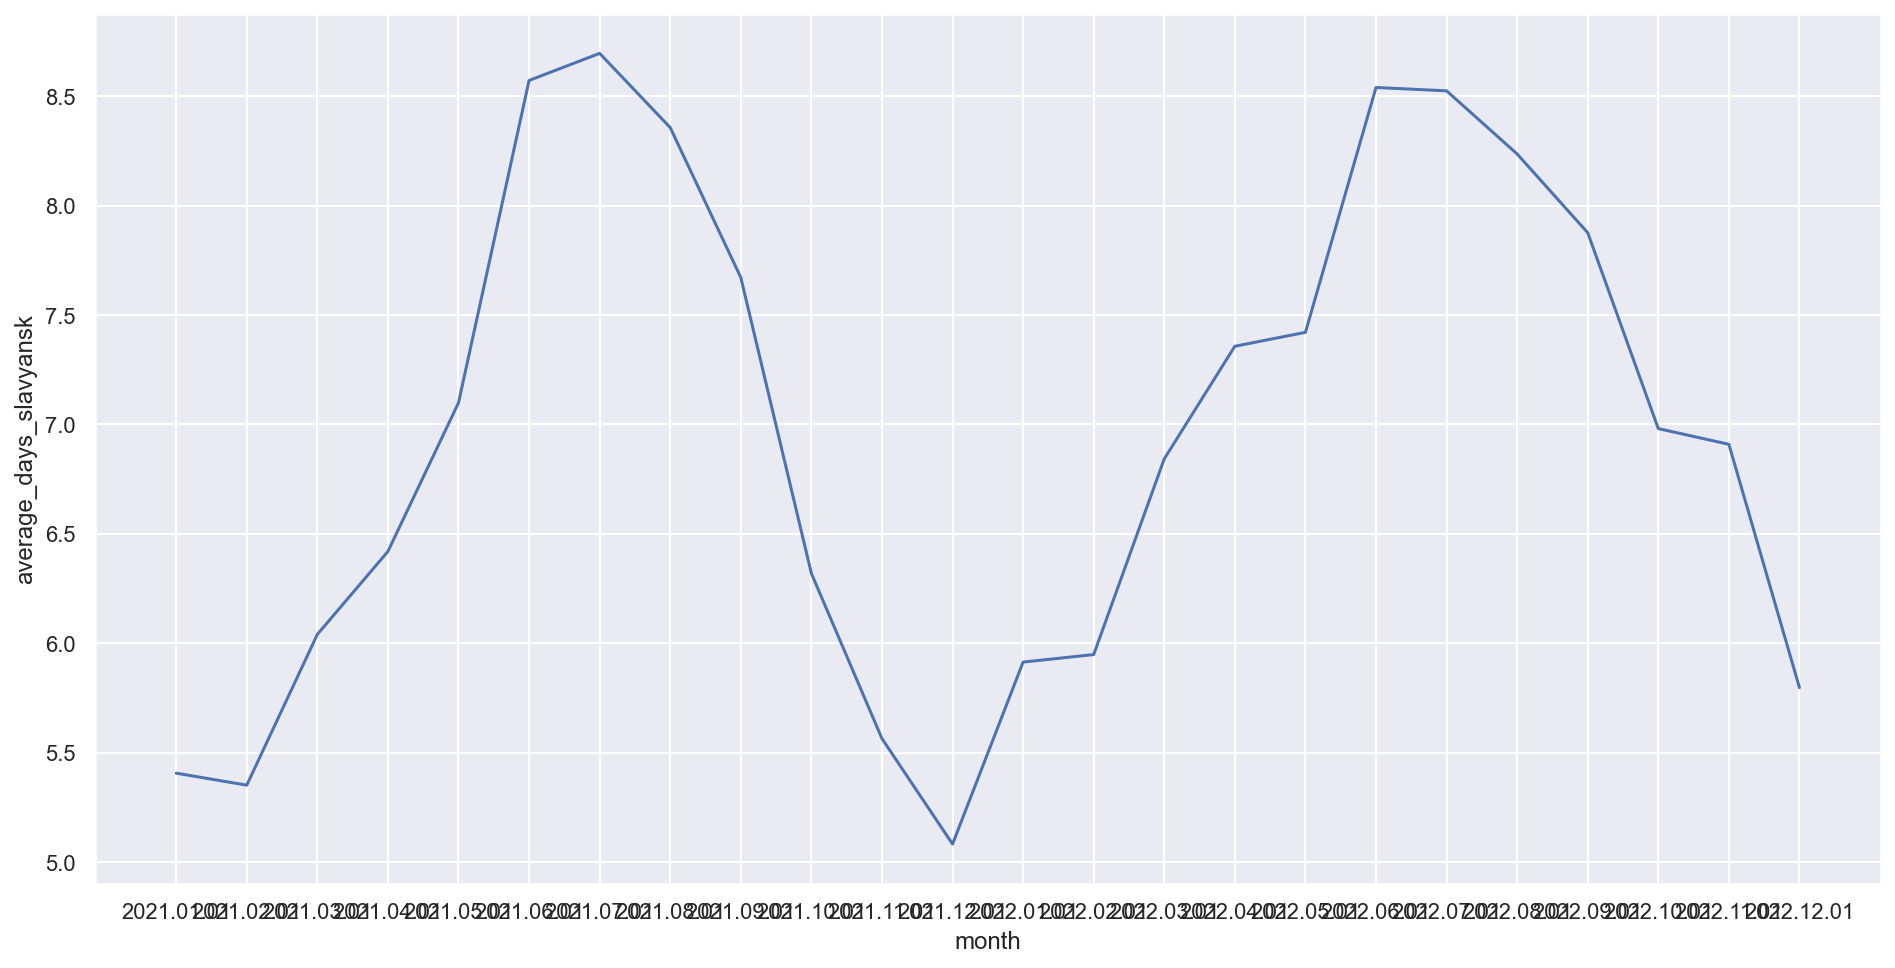

In [54]:
days_slavyansk = slavyansk.groupby(['snap_date'], as_index=False).agg({'days' : 'mean'})\
.rename(columns={'snap_date':'month', 'days' : 'average_days_slavyansk'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'average_days_slavyansk', data = days_slavyansk)

## Топ интересы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='interest'>

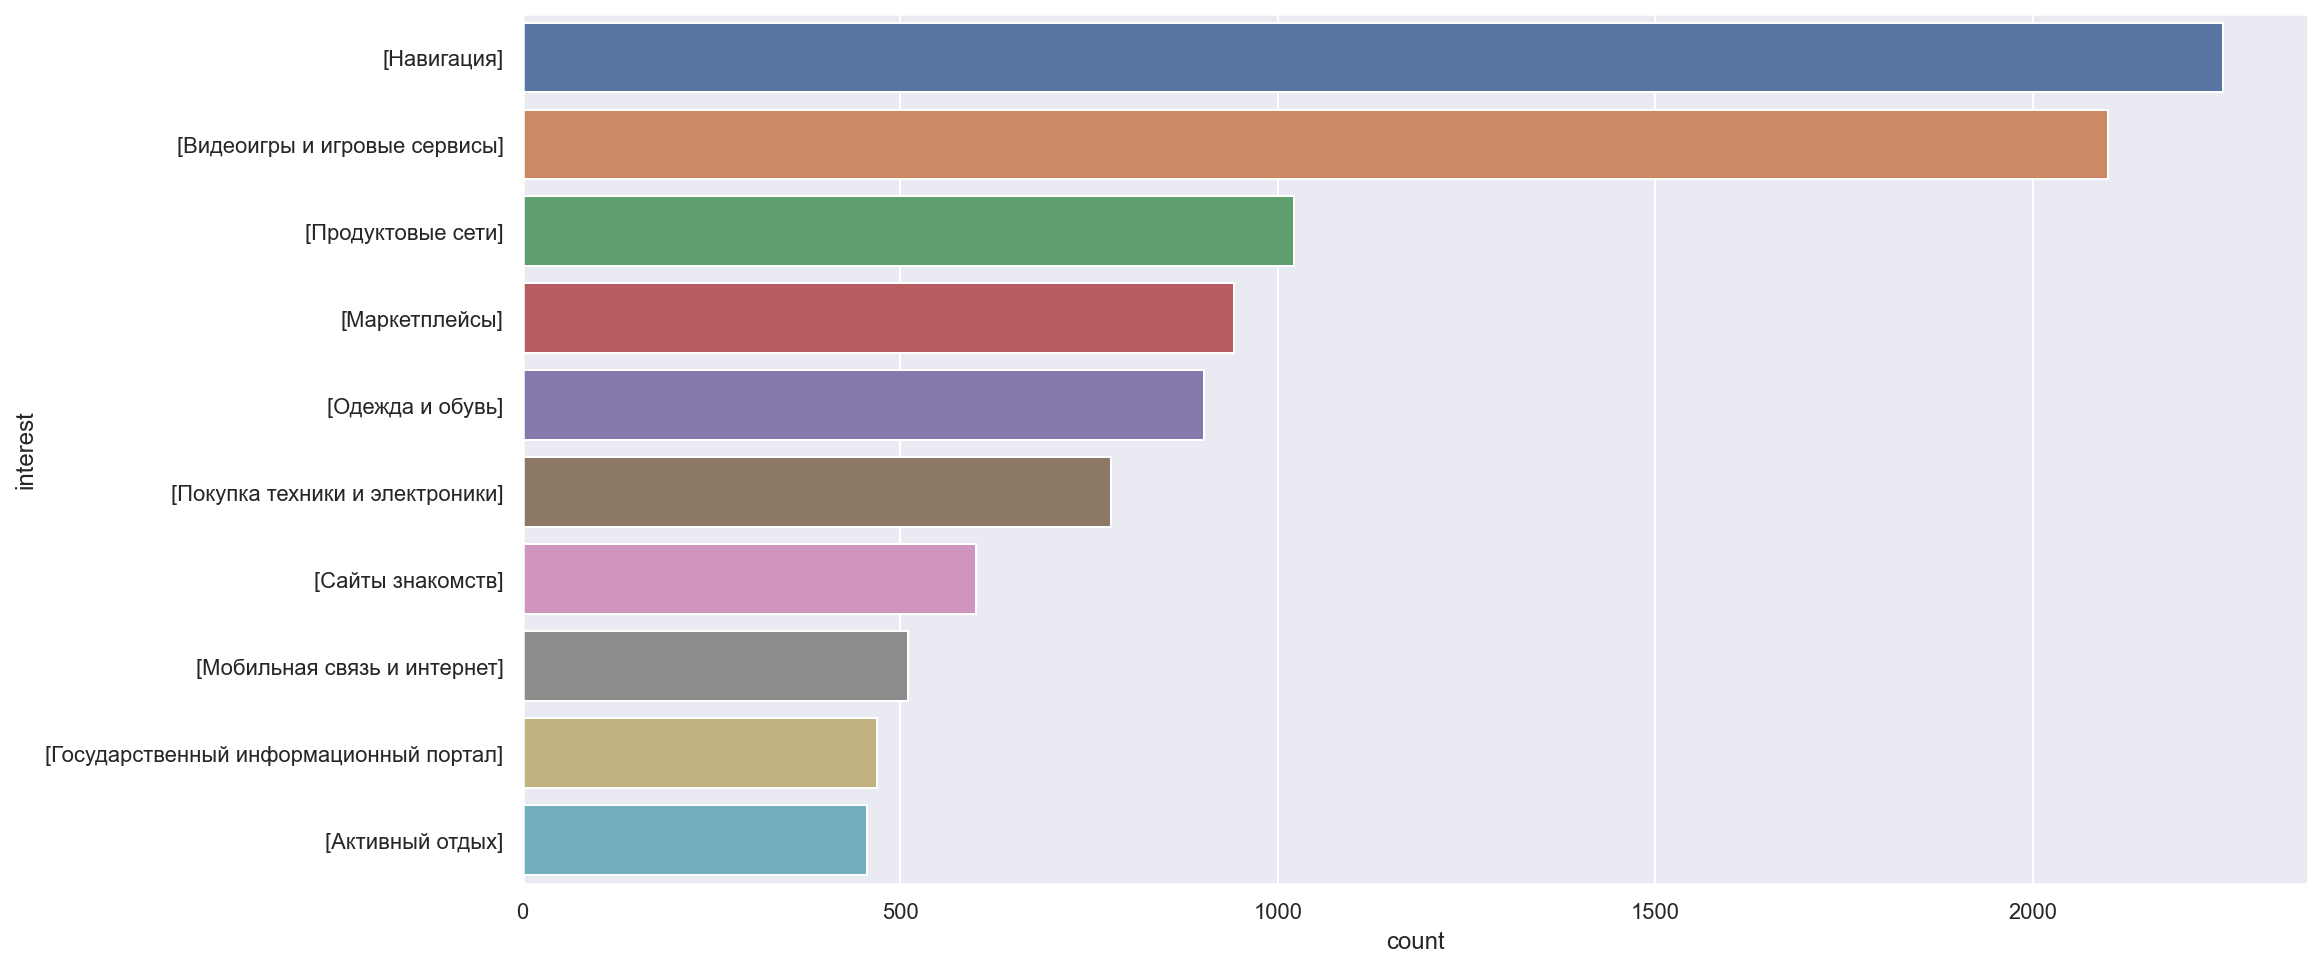

In [138]:
interests_slavyansk = slavyansk[~slavyansk['interests'].isna()]['interests']
df_interests_slavyansk = interests_slavyansk.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'interest', 'interests' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_interests_slavyansk[:10], x='count', y='interest', orient='h')

## Топ сервисы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='service'>

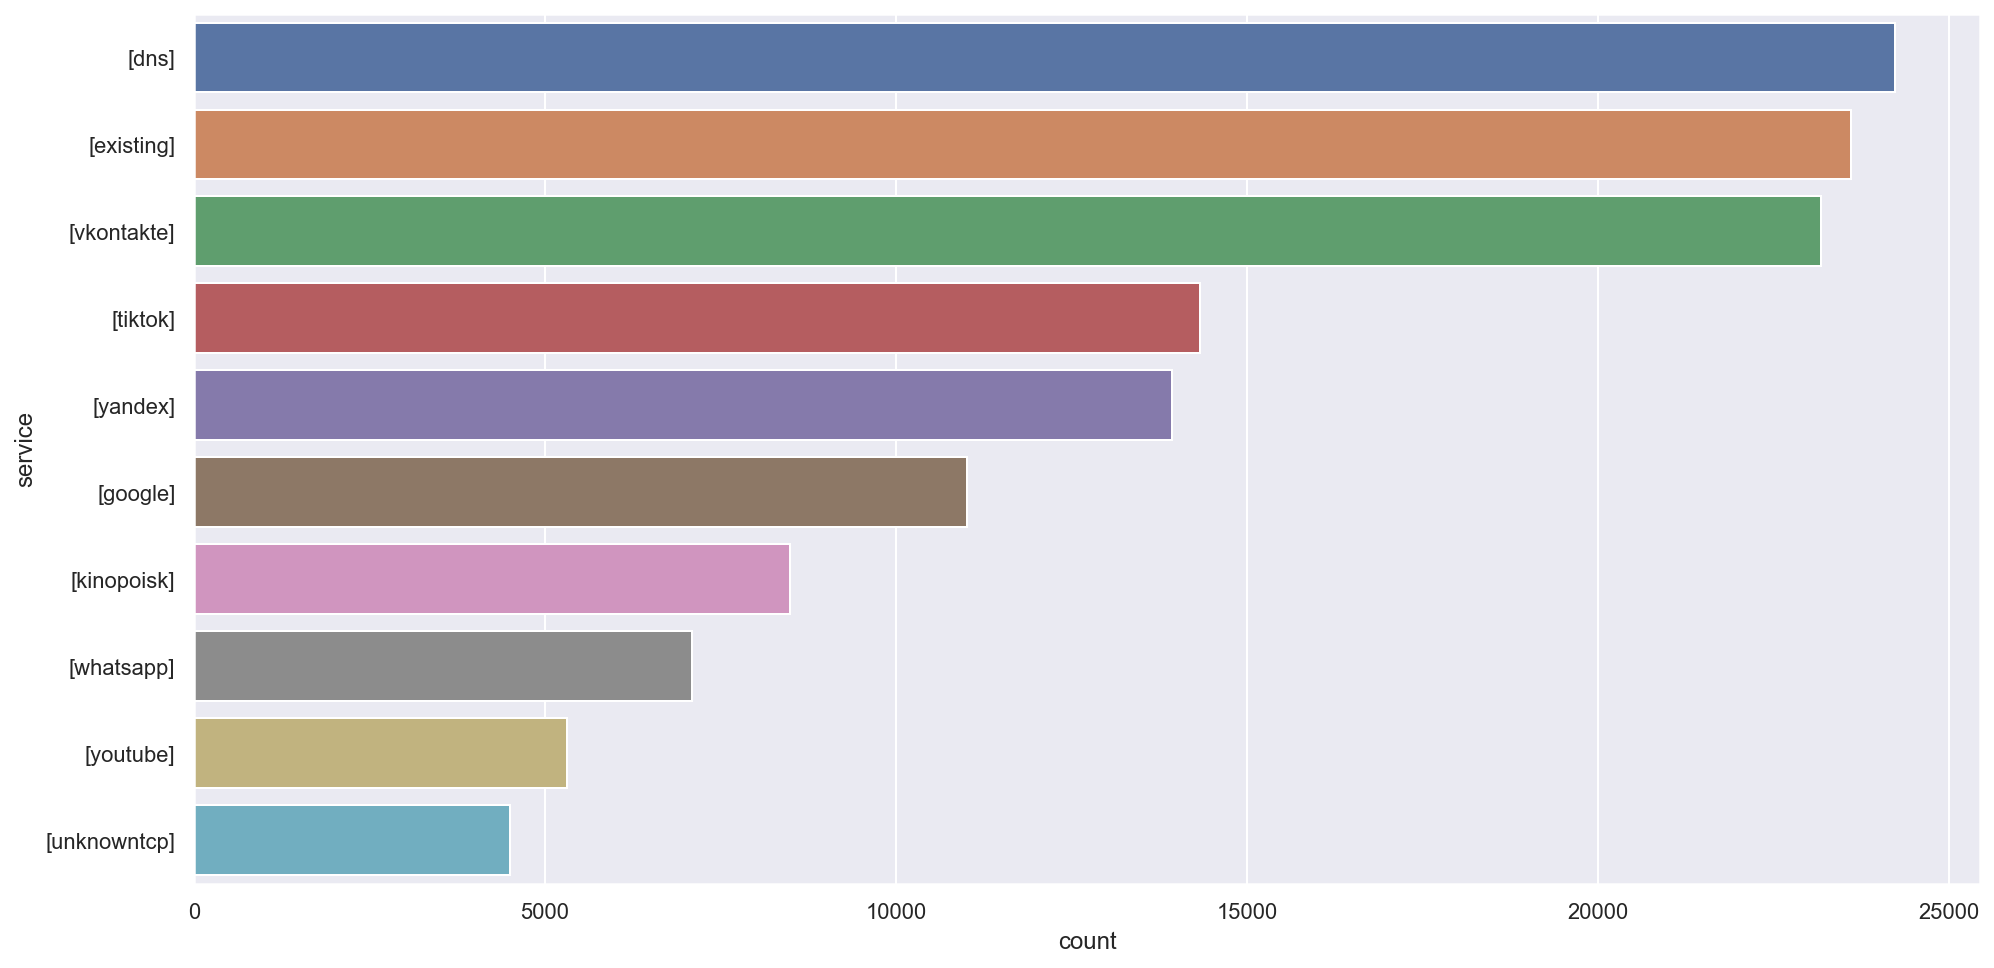

In [150]:
services_slavyansk = slavyansk[~slavyansk['top_service'].isna()]['top_service']
df_services_slavyansk = services_slavyansk.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'service', 'top_service' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_services_slavyansk[:10], x='count', y='service', orient='h')

## Прирост турпотока Мегафон по месяцам, 2021-2022

In [151]:
slavyansk_month_2021 = slavyansk.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2021', 'snap_date': 'month'})[:12]

slavyansk_month_2022 = slavyansk.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2022', 'snap_date': 'month'})[12:]\
.set_index([pd.Index([i for i in range(12)])])

slavyansk_month = pd.concat([slavyansk_month_2021, slavyansk_month_2022[['tourists_2022']]], axis = 1)

slavyansk_month['change_abs'] = slavyansk_month['tourists_2022'] - slavyansk_month['tourists_2021'] 
slavyansk_month['change_%'] = (slavyansk_month['change_abs'] / slavyansk_month['tourists_2021']) * 100

slavyansk_month

,month,tourists_2021,tourists_2022,change_abs,change_%
0,2021-01-01,1621,1378,-243,-14.990746
1,2021-02-01,1353,1500,147,10.864745
2,2021-03-01,2563,2539,-24,-0.936403
3,2021-04-01,3792,5195,1403,36.998945
4,2021-05-01,7735,6435,-1300,-16.806723
5,2021-06-01,27923,25600,-2323,-8.319307
6,2021-07-01,47200,59122,11922,25.258475
7,2021-08-01,47100,60733,13633,28.944798
8,2021-09-01,27832,21413,-6419,-23.063380
9,2021-10-01,5897,3981,-1916,-32.491097


# 6. Хадыженск

In [55]:
hadyjenck = all_cities[all_cities['city'] == 'Хадыженск']
hadyjenck.head(1)

,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou,interests,top_service,volume_sum,dl_volume_sum,ul_volume_sum
0,2021-07-01,cf354b108add3f072fb38eaadce3f3e8,7,16,23,Хадыженск,1,36,81.7425,NaN,662.2916,NaN,NaN,NaN,NaN,NaN


## Турпоток Мегафона, 2021-2022

<AxesSubplot:xlabel='month', ylabel='tourists_hadyjenck'>

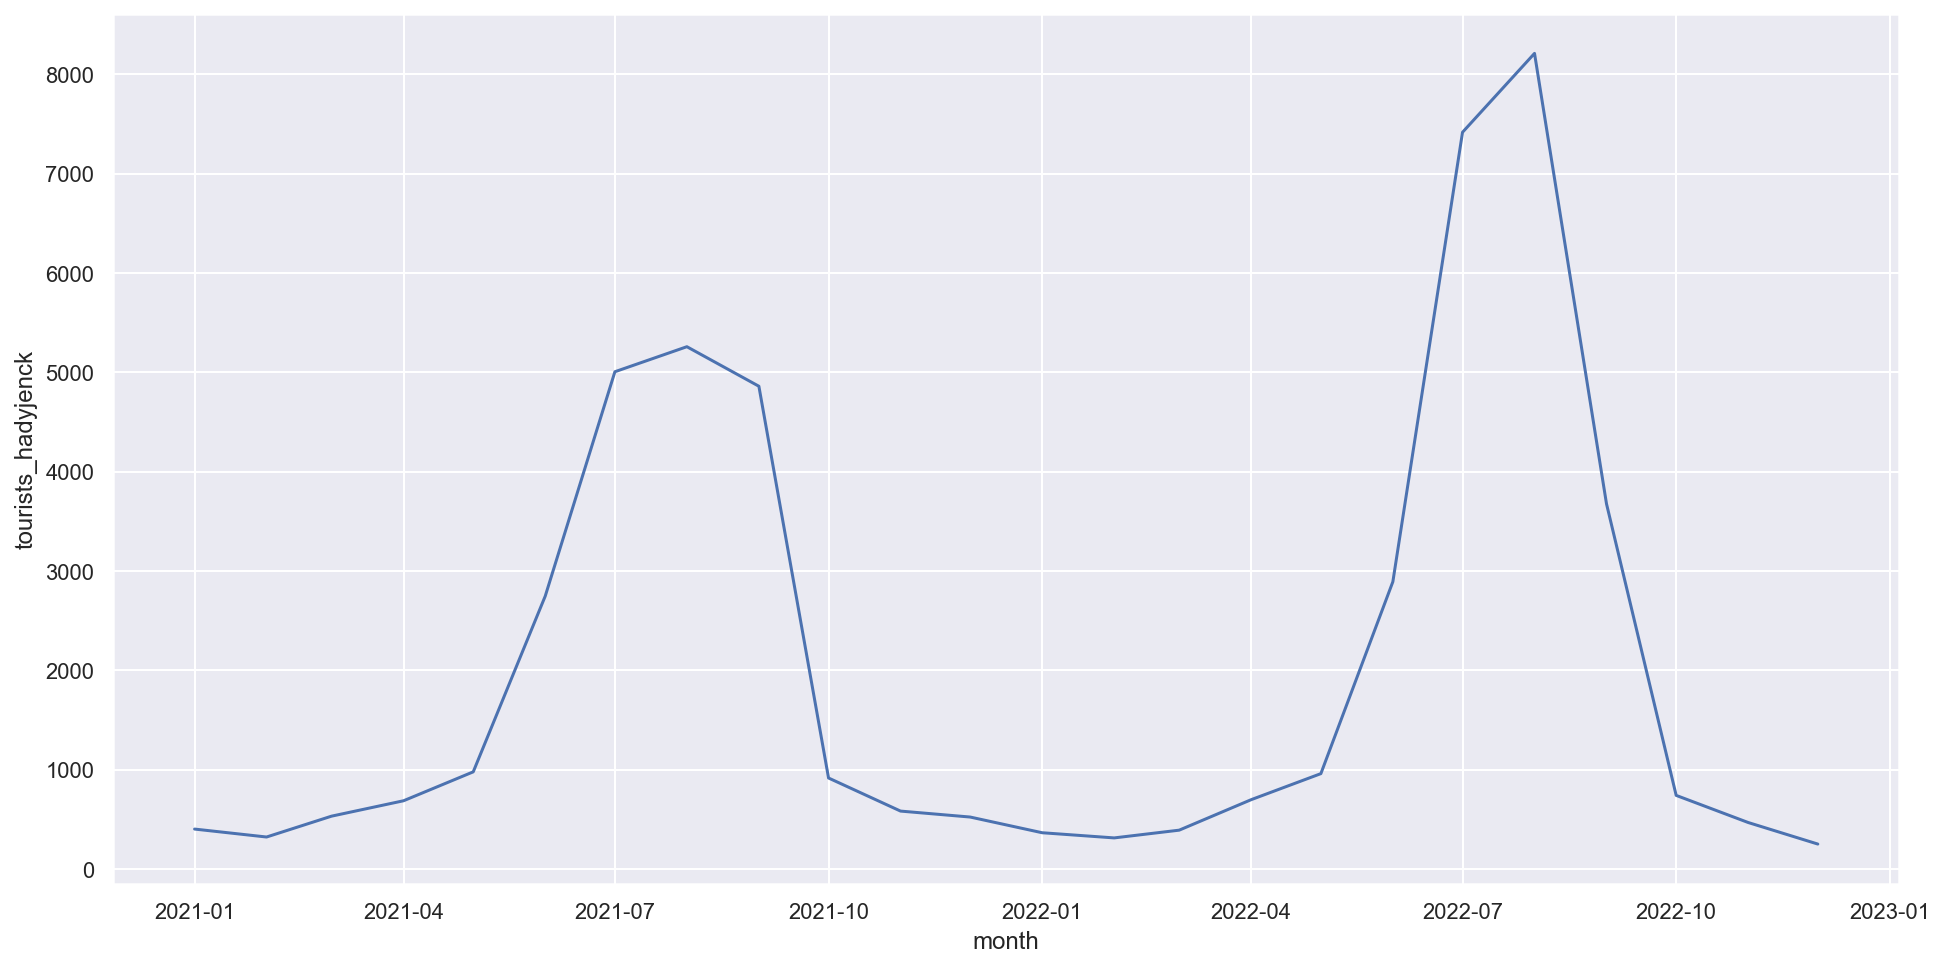

In [56]:
time_hadyjenck = hadyjenck.groupby(['snap_date'], as_index=False).agg({'id_hash' : 'count'})\
.rename(columns={'snap_date':'month', 'id_hash' : 'tourists_hadyjenck'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'tourists_hadyjenck', data = time_hadyjenck)

## Среднее количество дней, 2021-2022

<AxesSubplot:xlabel='month', ylabel='average_days_hadyjenck'>

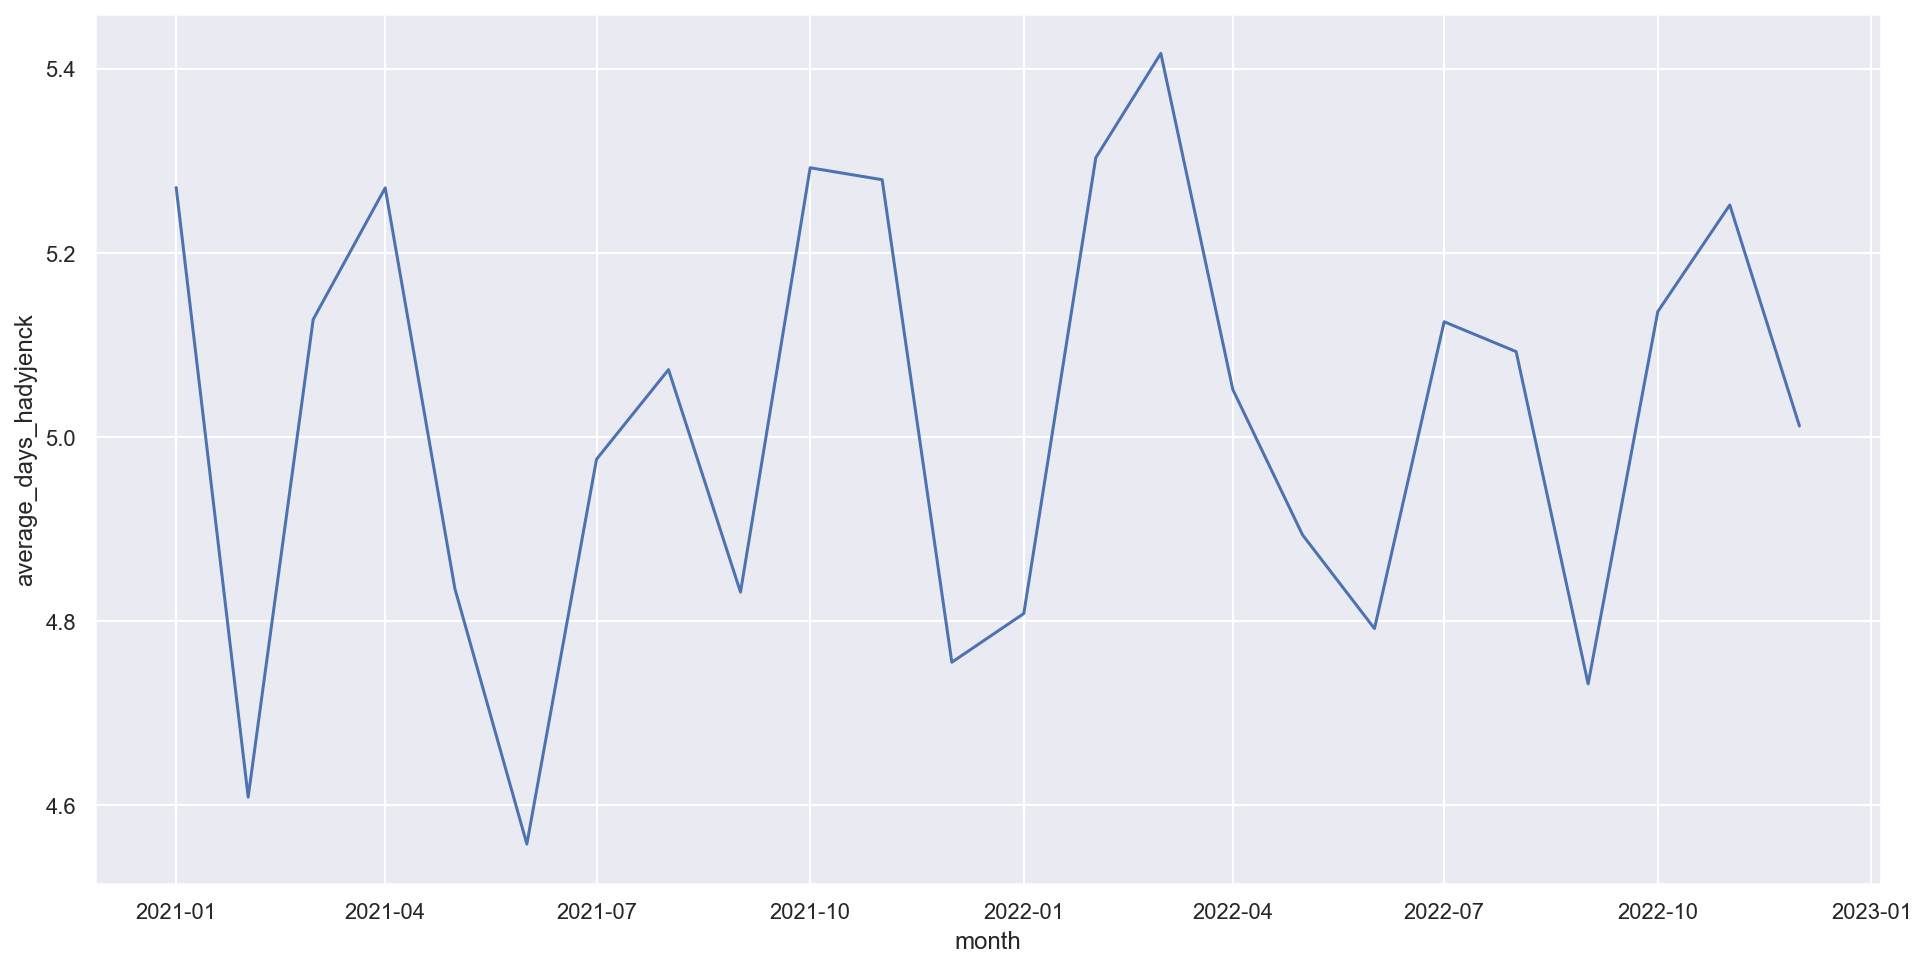

In [58]:
days_hadyjenck = hadyjenck.groupby(['snap_date'], as_index=False).agg({'days' : 'mean'})\
.rename(columns={'snap_date':'month', 'days' : 'average_days_hadyjenck'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'average_days_hadyjenck', data = days_hadyjenck)

## Топ интересы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='interest'>

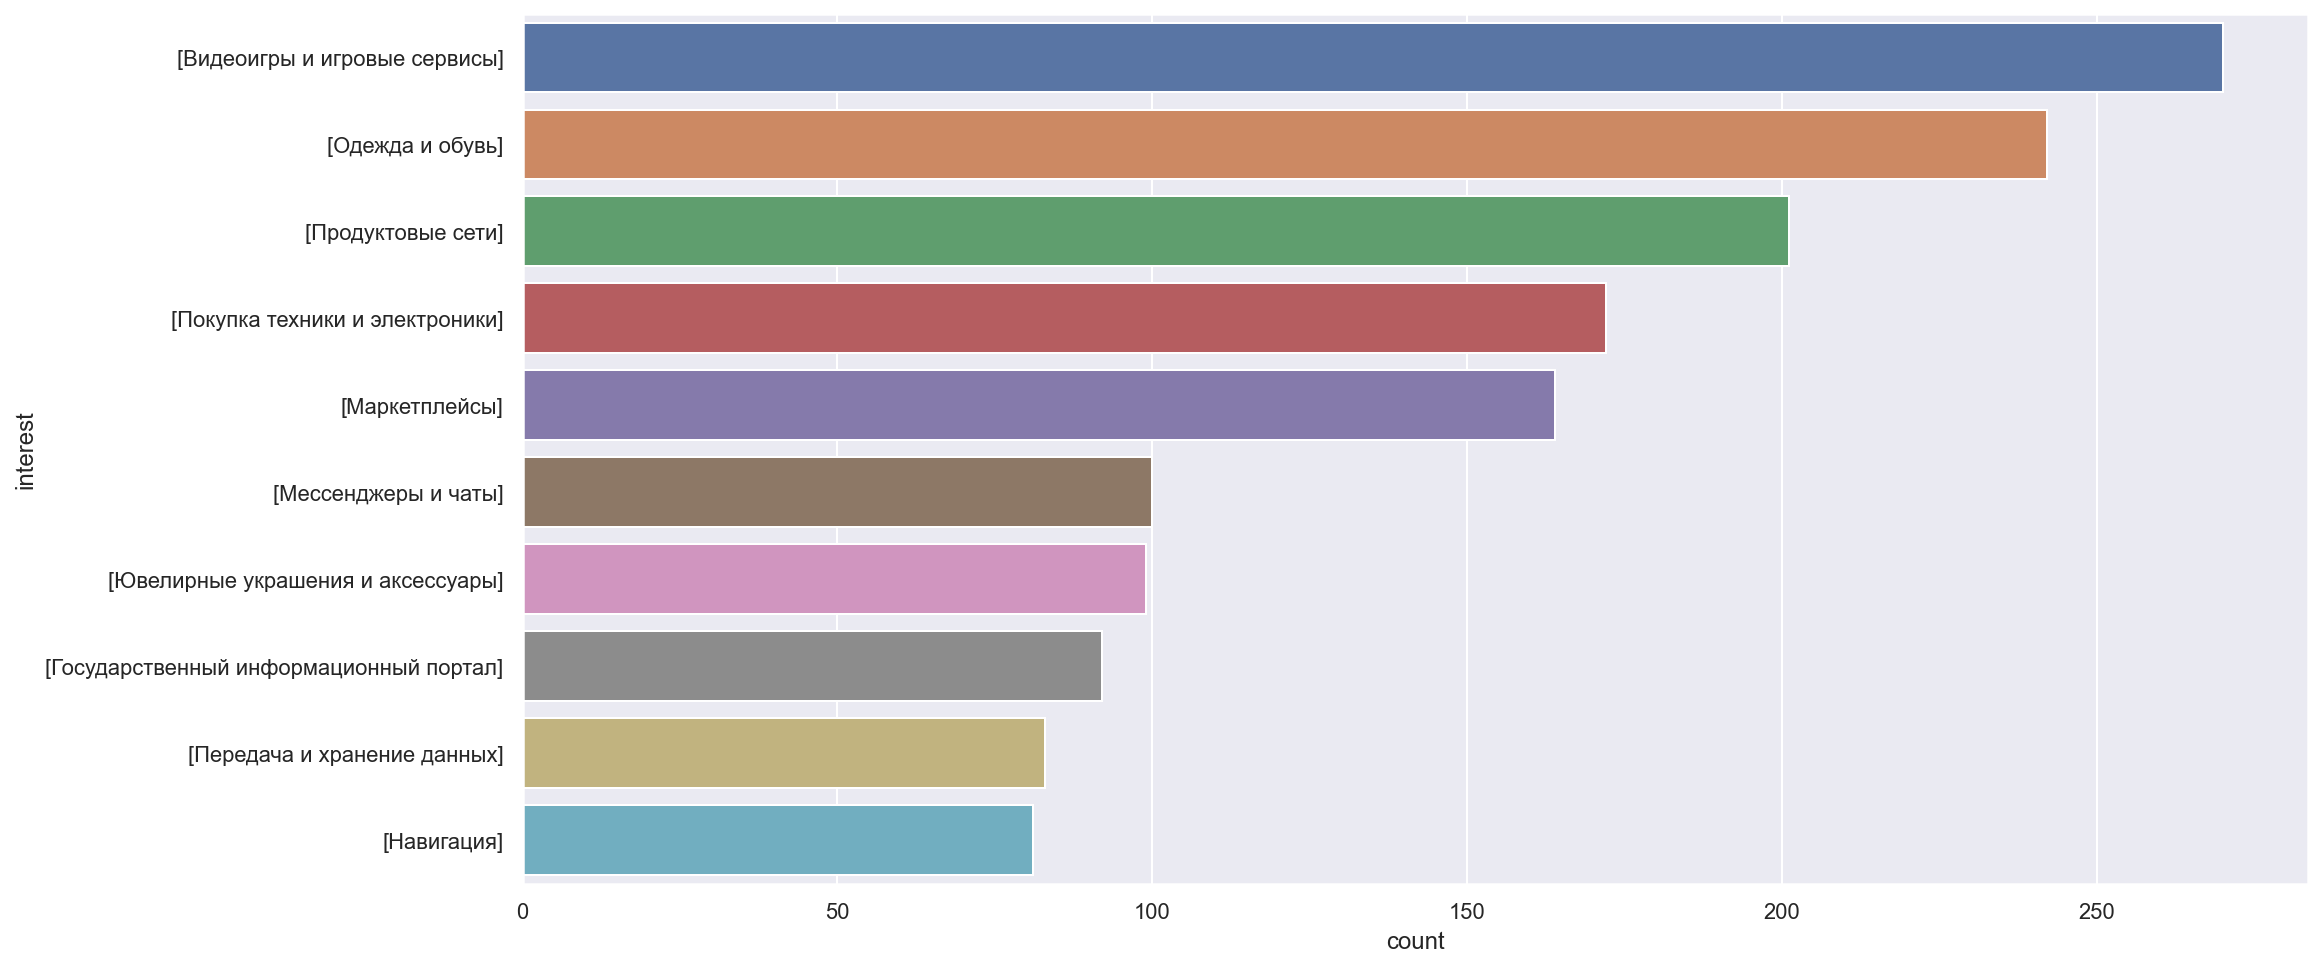

In [139]:
interests_hadyjenck = hadyjenck[~hadyjenck['interests'].isna()]['interests']
df_interests_hadyjenck = interests_hadyjenck.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'interest', 'interests' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_interests_hadyjenck[:10], x='count', y='interest', orient='h')

## Топ сервисы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='service'>

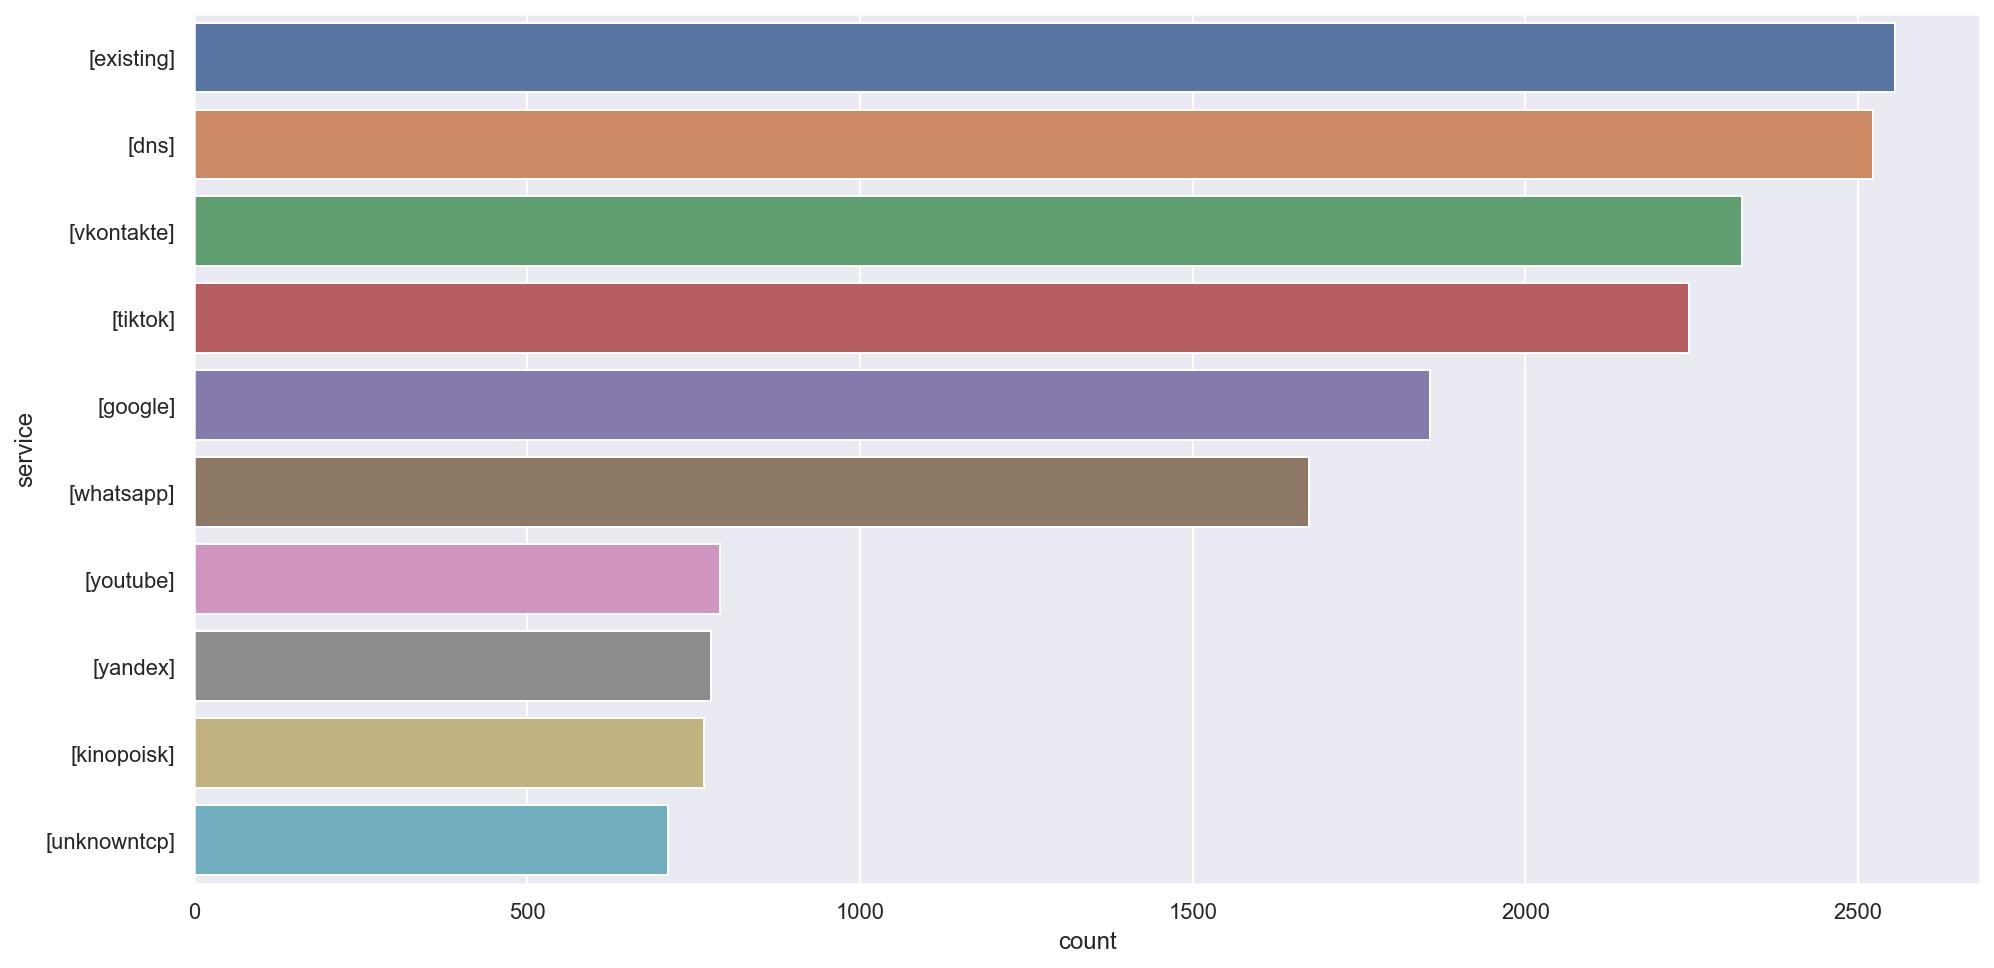

In [60]:
services_hadyjenck = hadyjenck[~hadyjenck['top_service'].isna()]['top_service']
df_services_hadyjenck = services_hadyjenck.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'service', 'top_service' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_services_hadyjenck[:10], x='count', y='service', orient='h')

## Прирост турпотока Мегафон по месяцам, 2021-2022

In [62]:
hadyjenck_month_2021 = hadyjenck.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2021', 'snap_date': 'month'})[:12]

hadyjenck_month_2022 = hadyjenck.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2022', 'snap_date': 'month'})[12:]\
.set_index([pd.Index([i for i in range(12)])])

hadyjenck_month = pd.concat([hadyjenck_month_2021, hadyjenck_month_2022[['tourists_2022']]], axis = 1)

hadyjenck_month['change_abs'] = hadyjenck_month['tourists_2022'] - hadyjenck_month['tourists_2021'] 
hadyjenck_month['change_%'] = (hadyjenck_month['change_abs'] / hadyjenck_month['tourists_2021']) * 100

hadyjenck_month

,month,tourists_2021,tourists_2022,change_abs,change_%
0,2021-01-01,402,365,-37,-9.203980
1,2021-02-01,322,313,-9,-2.795031
2,2021-03-01,532,391,-141,-26.503759
3,2021-04-01,687,698,11,1.601164
4,2021-05-01,978,960,-18,-1.840491
5,2021-06-01,2747,2892,145,5.278486
6,2021-07-01,5006,7417,2411,48.162205
7,2021-08-01,5258,8211,2953,56.162039
8,2021-09-01,4860,3676,-1184,-24.362140
9,2021-10-01,916,741,-175,-19.104803


# 7. Крымск

In [63]:
krymsk = all_cities[all_cities['city'] == 'Крымск']
krymsk.head(1)

,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou,interests,top_service,volume_sum,dl_volume_sum,ul_volume_sum
0,2021-07-01,7930961d1e341b18af9fc0de21835274,12,78,23,Крымск,3,46,230.8075,168.5425,NaN,NaN,NaN,NaN,NaN,NaN


## Турпоток Мегафона, 2021-2022

<AxesSubplot:xlabel='month', ylabel='tourists_krymsk'>

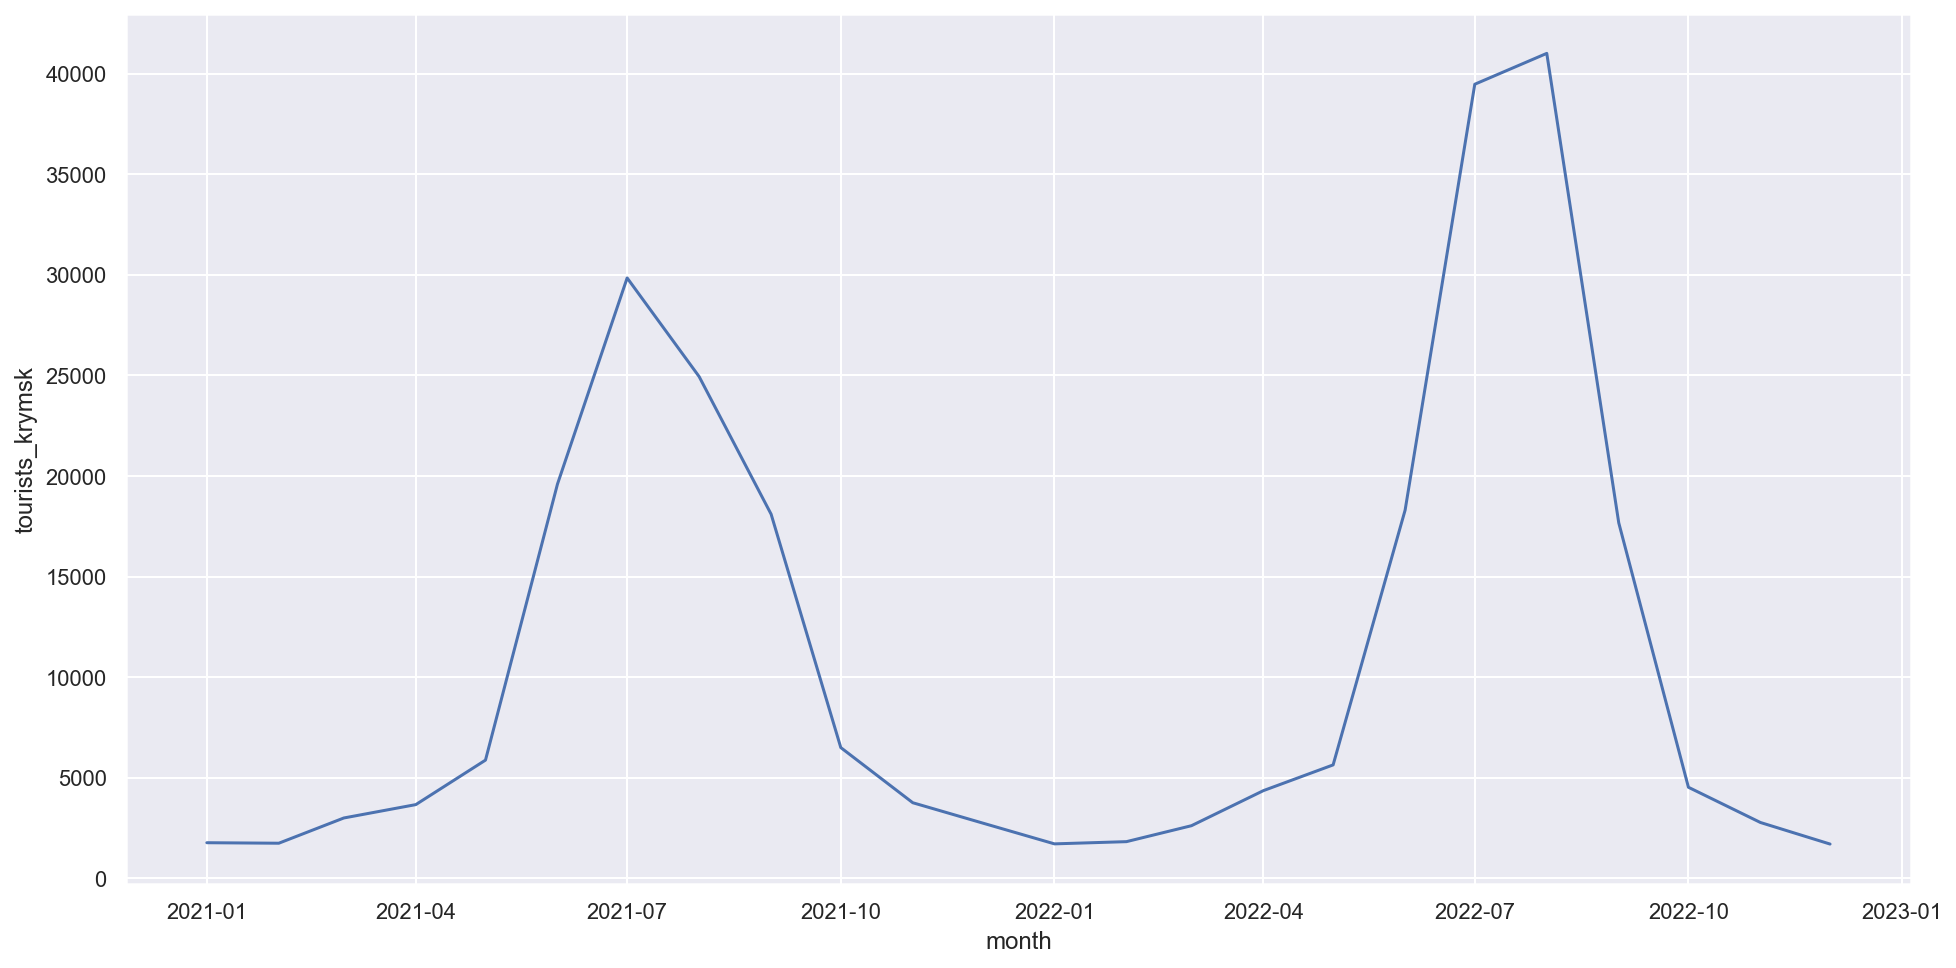

In [65]:
time_krymsk = krymsk.groupby(['snap_date'], as_index=False).agg({'id_hash' : 'count'})\
.rename(columns={'snap_date':'month', 'id_hash' : 'tourists_krymsk'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'tourists_krymsk', data = time_krymsk)

## Среднее количество дней, 2021-2022

<AxesSubplot:xlabel='month', ylabel='average_days_krymsk'>

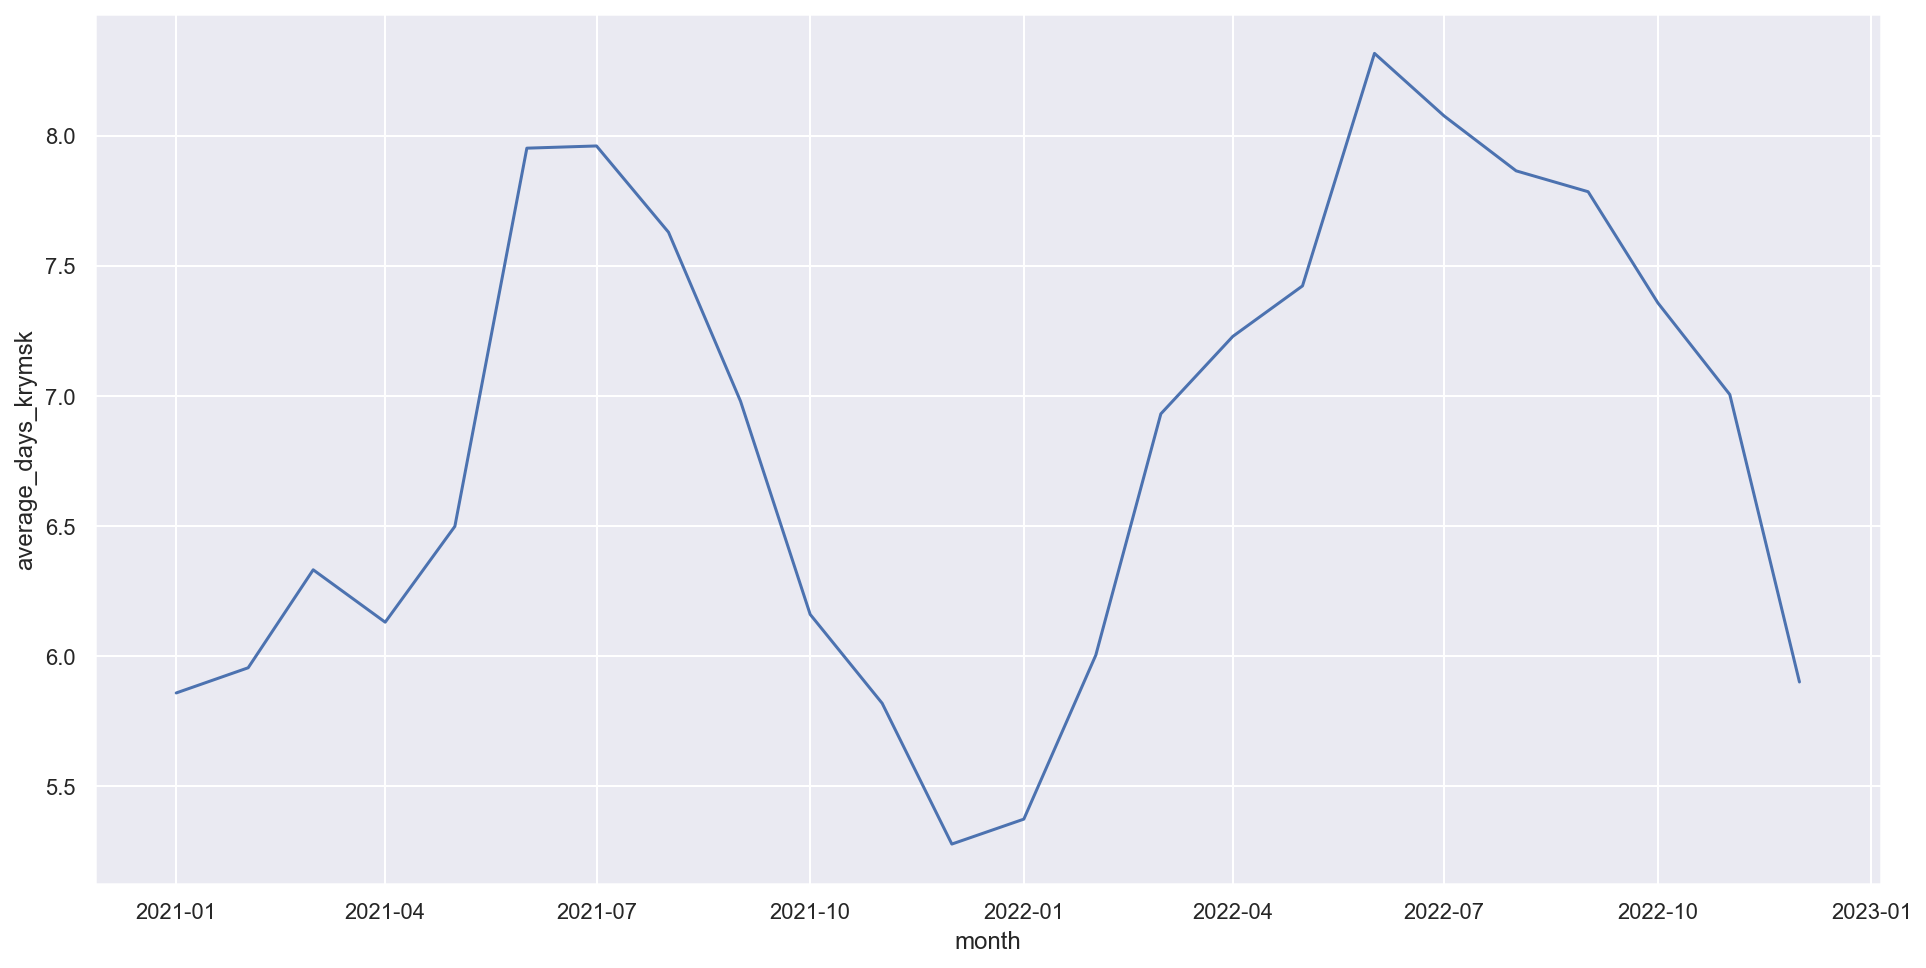

In [68]:
days_krymsk = krymsk.groupby(['snap_date'], as_index=False).agg({'days' : 'mean'})\
.rename(columns={'snap_date':'month', 'days' : 'average_days_krymsk'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'average_days_krymsk', data = days_krymsk)

## Топ интересы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='interest'>

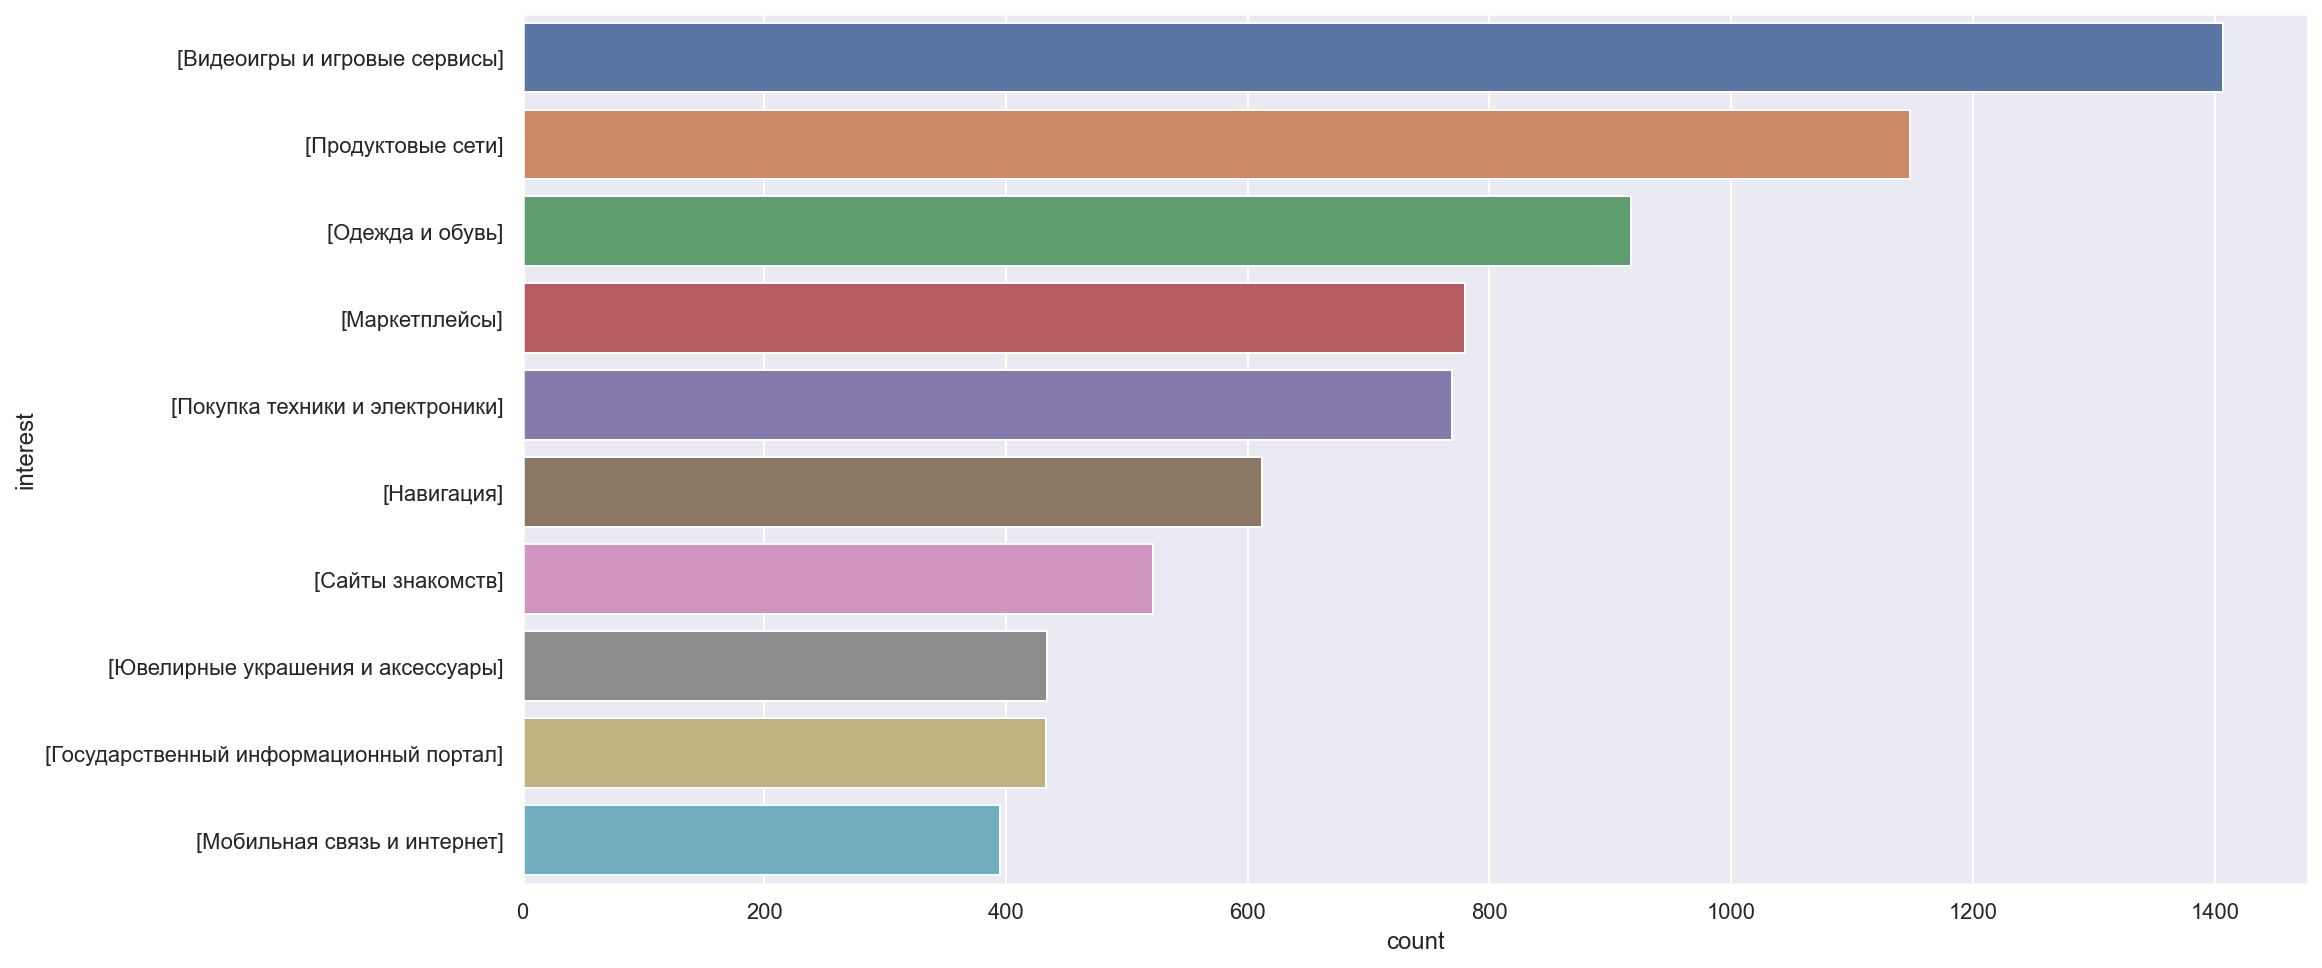

In [140]:
interests_krymsk = krymsk[~krymsk['interests'].isna()]['interests']
df_interests_krymsk = interests_krymsk.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'interest', 'interests' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_interests_krymsk[:10], x='count', y='interest', orient='h')

## Топ сервисы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='service'>

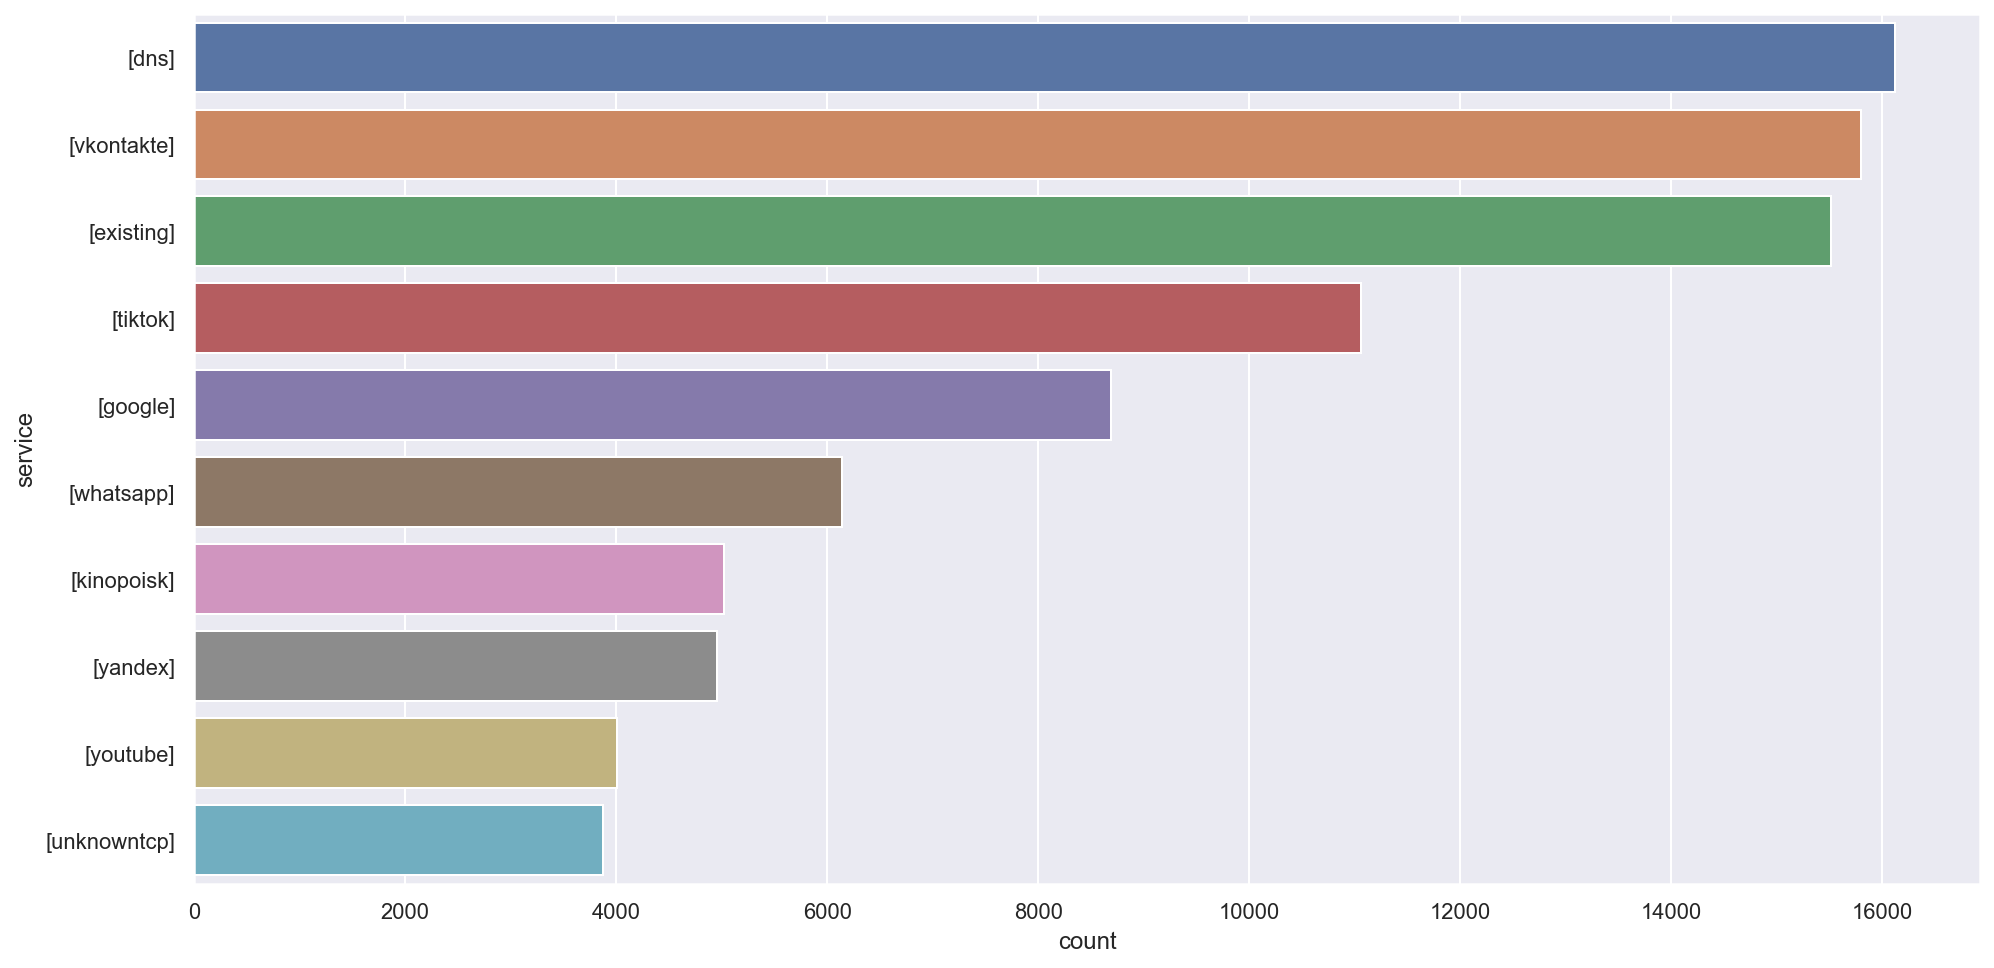

In [70]:
services_krymsk = krymsk[~krymsk['top_service'].isna()]['top_service']
df_services_krymsk = services_krymsk.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'service', 'top_service' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_services_krymsk[:10], x='count', y='service', orient='h')

## Прирост турпотока Мегафон по месяцам, 2021-2022

In [71]:
krymsk_month_2021 = krymsk.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2021', 'snap_date': 'month'})[:12]

krymsk_month_2022 = krymsk.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2022', 'snap_date': 'month'})[12:]\
.set_index([pd.Index([i for i in range(12)])])

krymsk_month = pd.concat([krymsk_month_2021, krymsk_month_2022[['tourists_2022']]], axis = 1)

krymsk_month['change_abs'] = krymsk_month['tourists_2022'] - krymsk_month['tourists_2021'] 
krymsk_month['change_%'] = (krymsk_month['change_abs'] / krymsk_month['tourists_2021']) * 100

krymsk_month

,month,tourists_2021,tourists_2022,change_abs,change_%
0,2021-01-01,1765,1708,-57,-3.229462
1,2021-02-01,1740,1818,78,4.482759
2,2021-03-01,2995,2611,-384,-12.821369
3,2021-04-01,3660,4356,696,19.016393
4,2021-05-01,5872,5634,-238,-4.053134
5,2021-06-01,19597,18301,-1296,-6.613257
6,2021-07-01,29847,39478,9631,32.267900
7,2021-08-01,24941,41013,16072,64.440079
8,2021-09-01,18099,17669,-430,-2.375822
9,2021-10-01,6495,4522,-1973,-30.377213


# 8. Горно-Алтайск

In [72]:
altaysk = all_cities[all_cities['city'] == 'Горно-Алтайск']
altaysk.head(1)

,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou,interests,top_service,volume_sum,dl_volume_sum,ul_volume_sum
0,2021-07-01,c52f674b40dd0f94d53244acc14a53e6,9,78,4,Горно-Алтайск,1,40,556.465,182.525,3049.122,NaN,NaN,NaN,NaN,NaN


## Турпоток Мегафона, 2021-2022

<AxesSubplot:xlabel='month', ylabel='tourists_altaysk'>

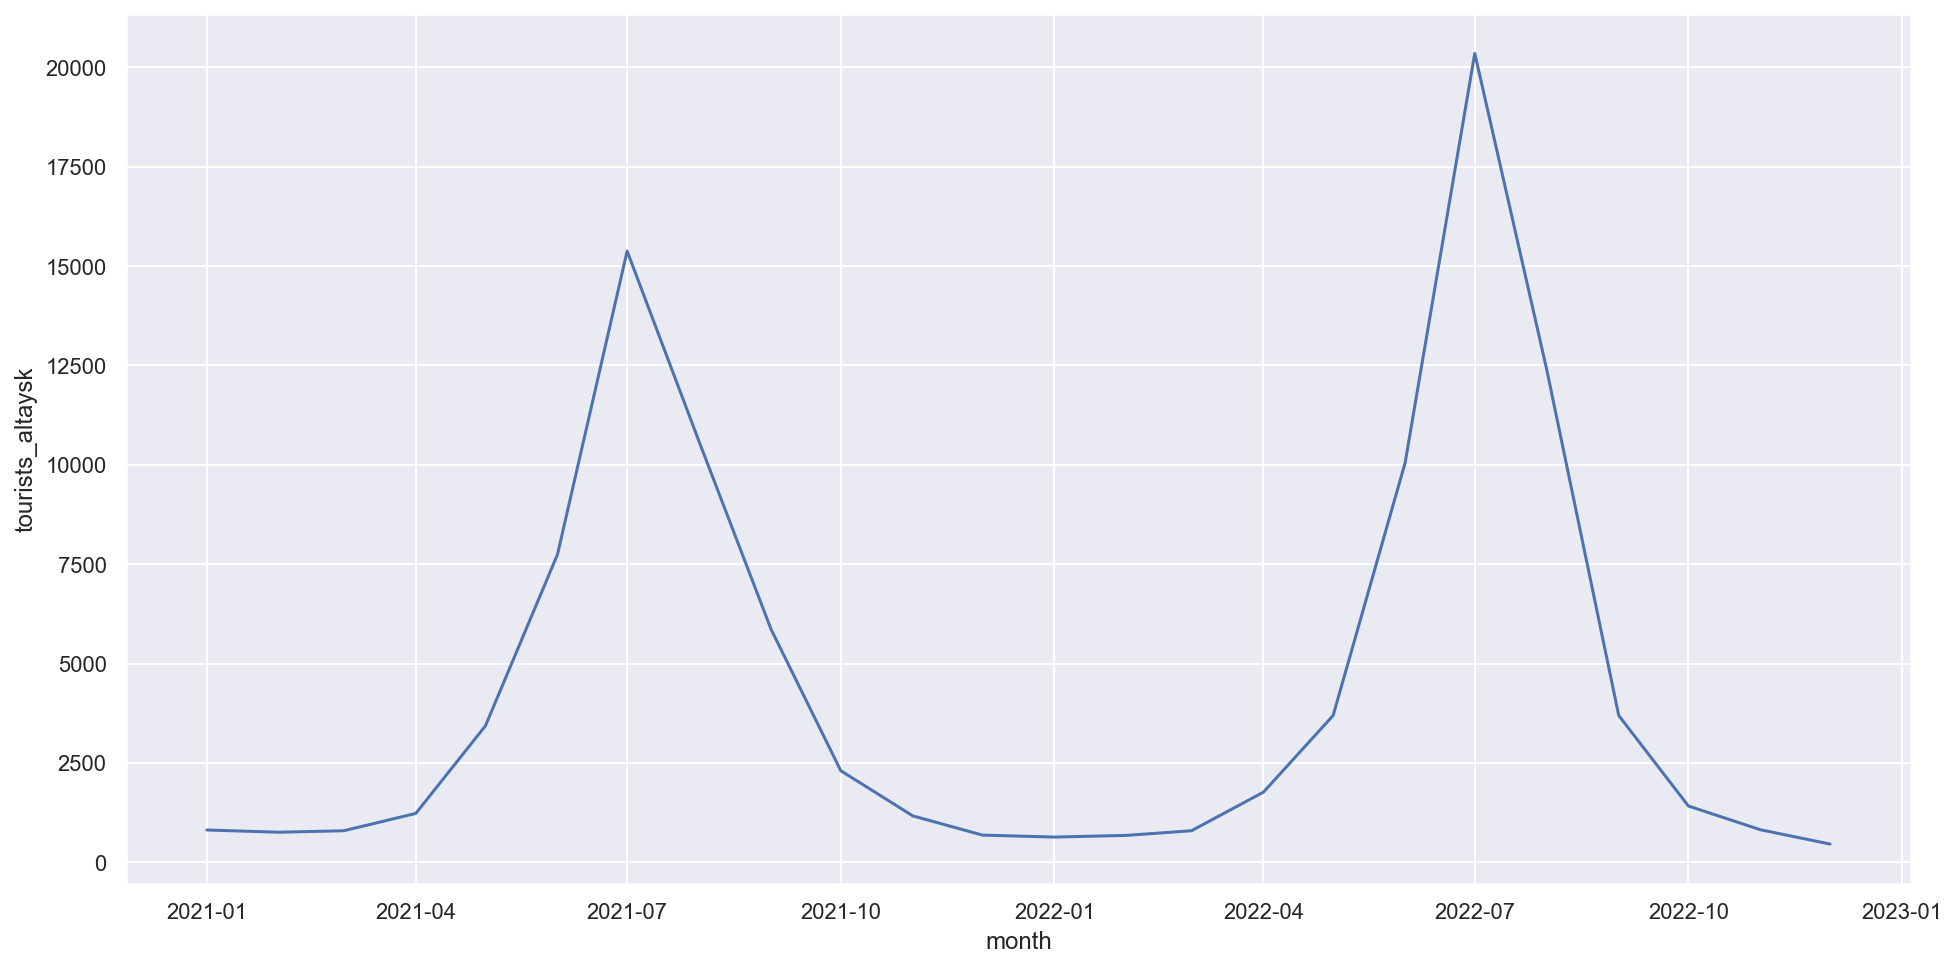

In [74]:
time_altaysk = altaysk.groupby(['snap_date'], as_index=False).agg({'id_hash' : 'count'})\
.rename(columns={'snap_date':'month', 'id_hash' : 'tourists_altaysk'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'tourists_altaysk', data = time_altaysk)

## Среднее количество дней, 2021-2022

<AxesSubplot:xlabel='month', ylabel='average_days_altaysk'>

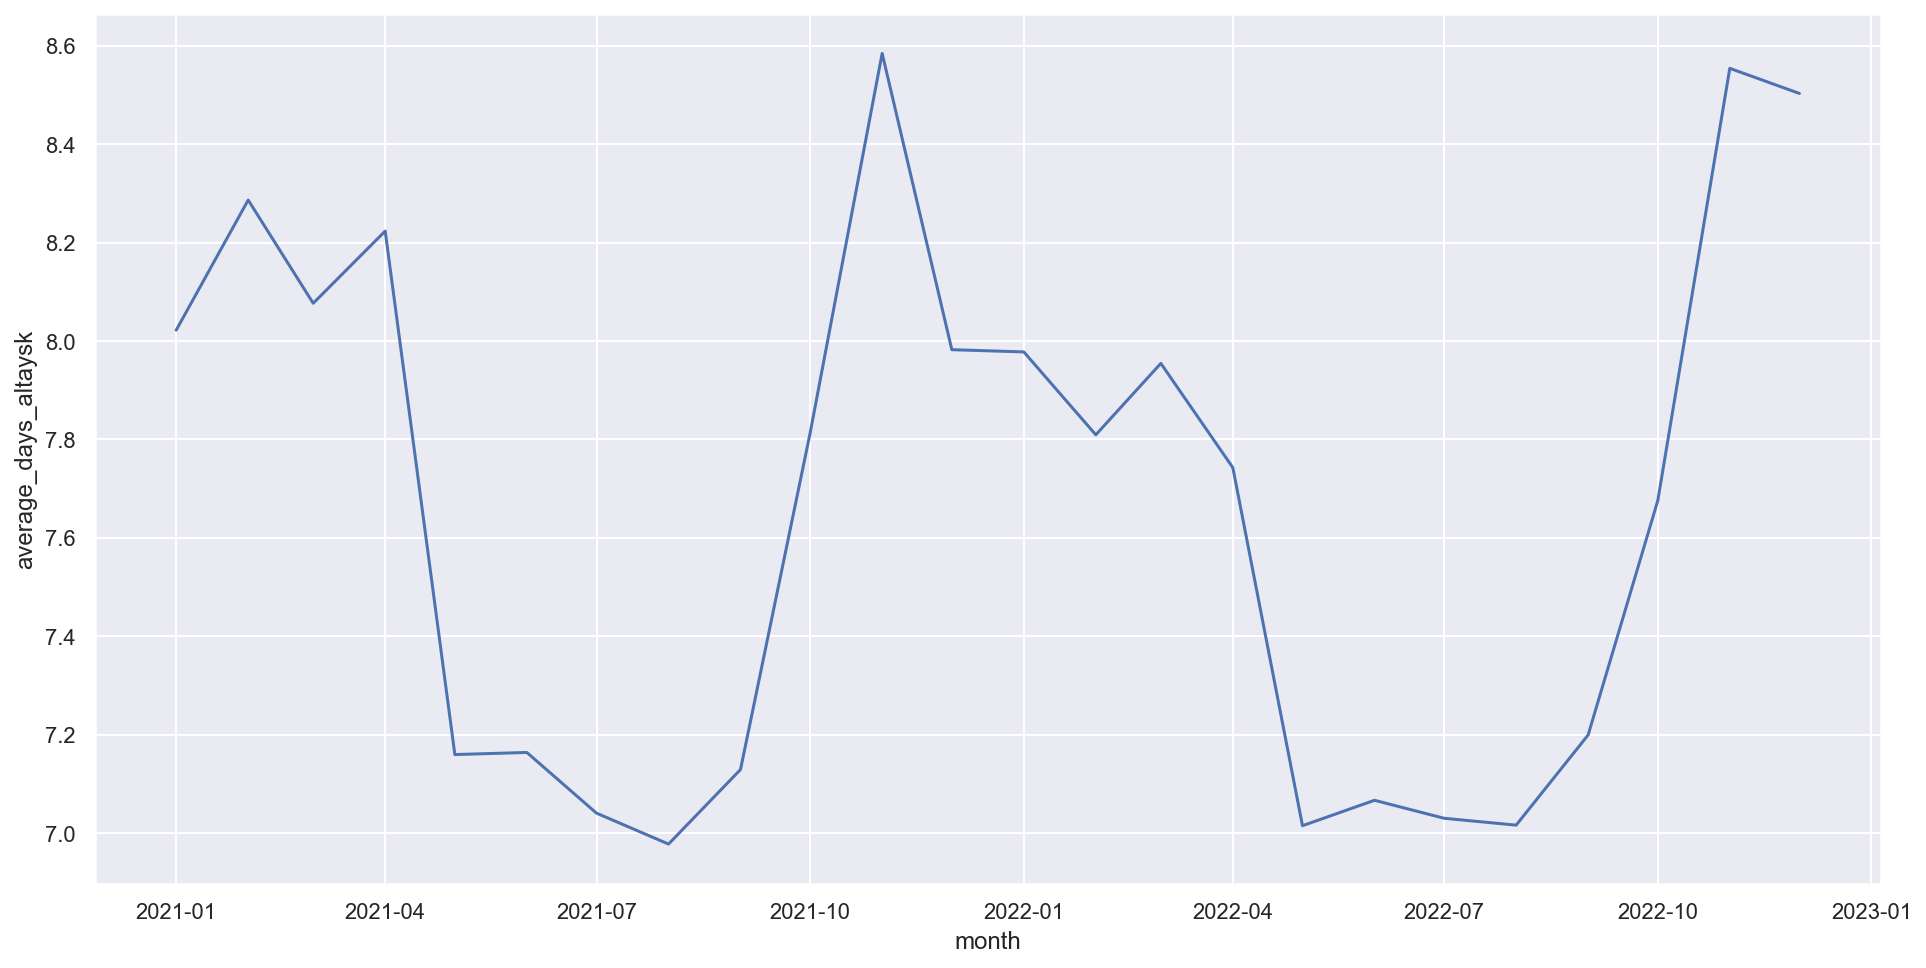

In [75]:
days_altaysk = altaysk.groupby(['snap_date'], as_index=False).agg({'days' : 'mean'})\
.rename(columns={'snap_date':'month', 'days' : 'average_days_altaysk'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'average_days_altaysk', data = days_altaysk)

## Топ интересы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='interest'>

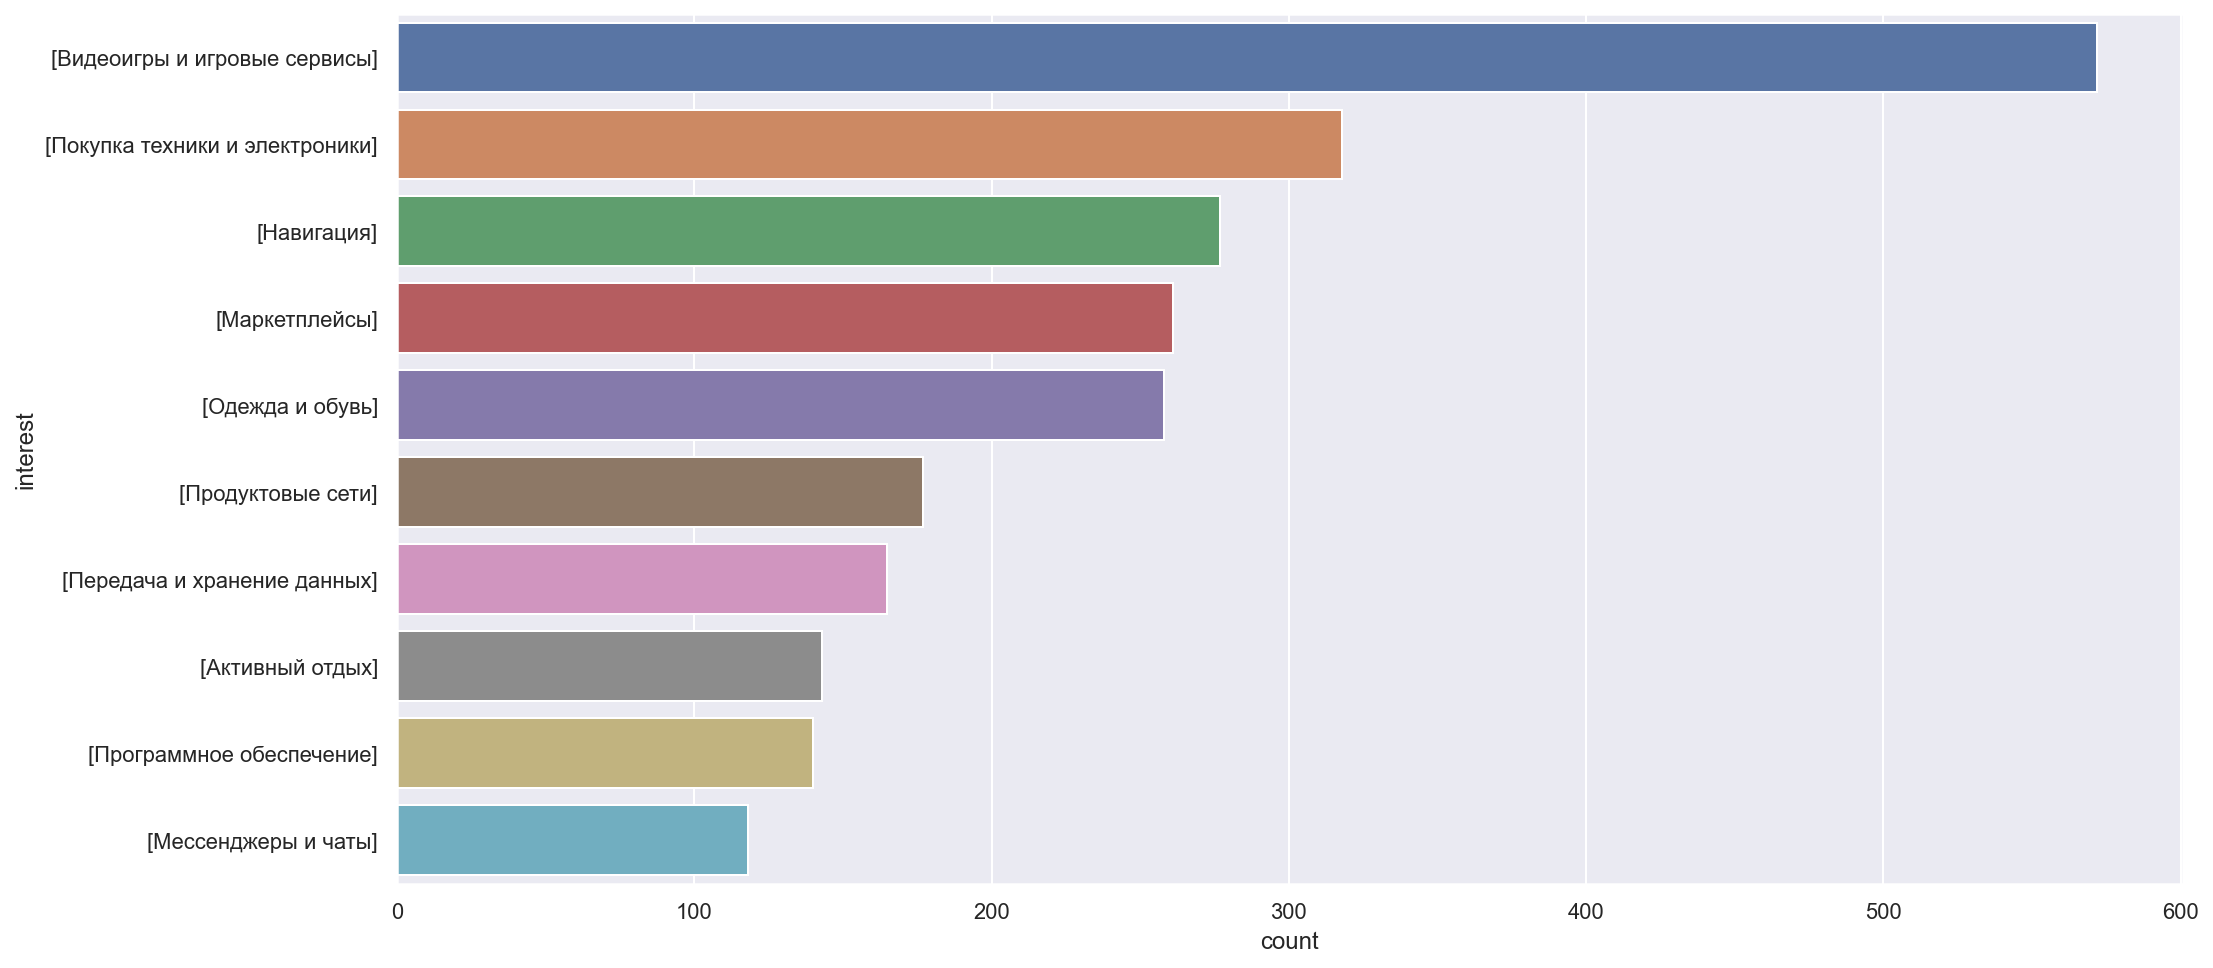

In [141]:
interests_altaysk = altaysk[~altaysk['interests'].isna()]['interests']
df_interests_altaysk = interests_altaysk.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'interest', 'interests' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_interests_altaysk[:10], x='count', y='interest', orient='h')

## Топ сервисы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='service'>

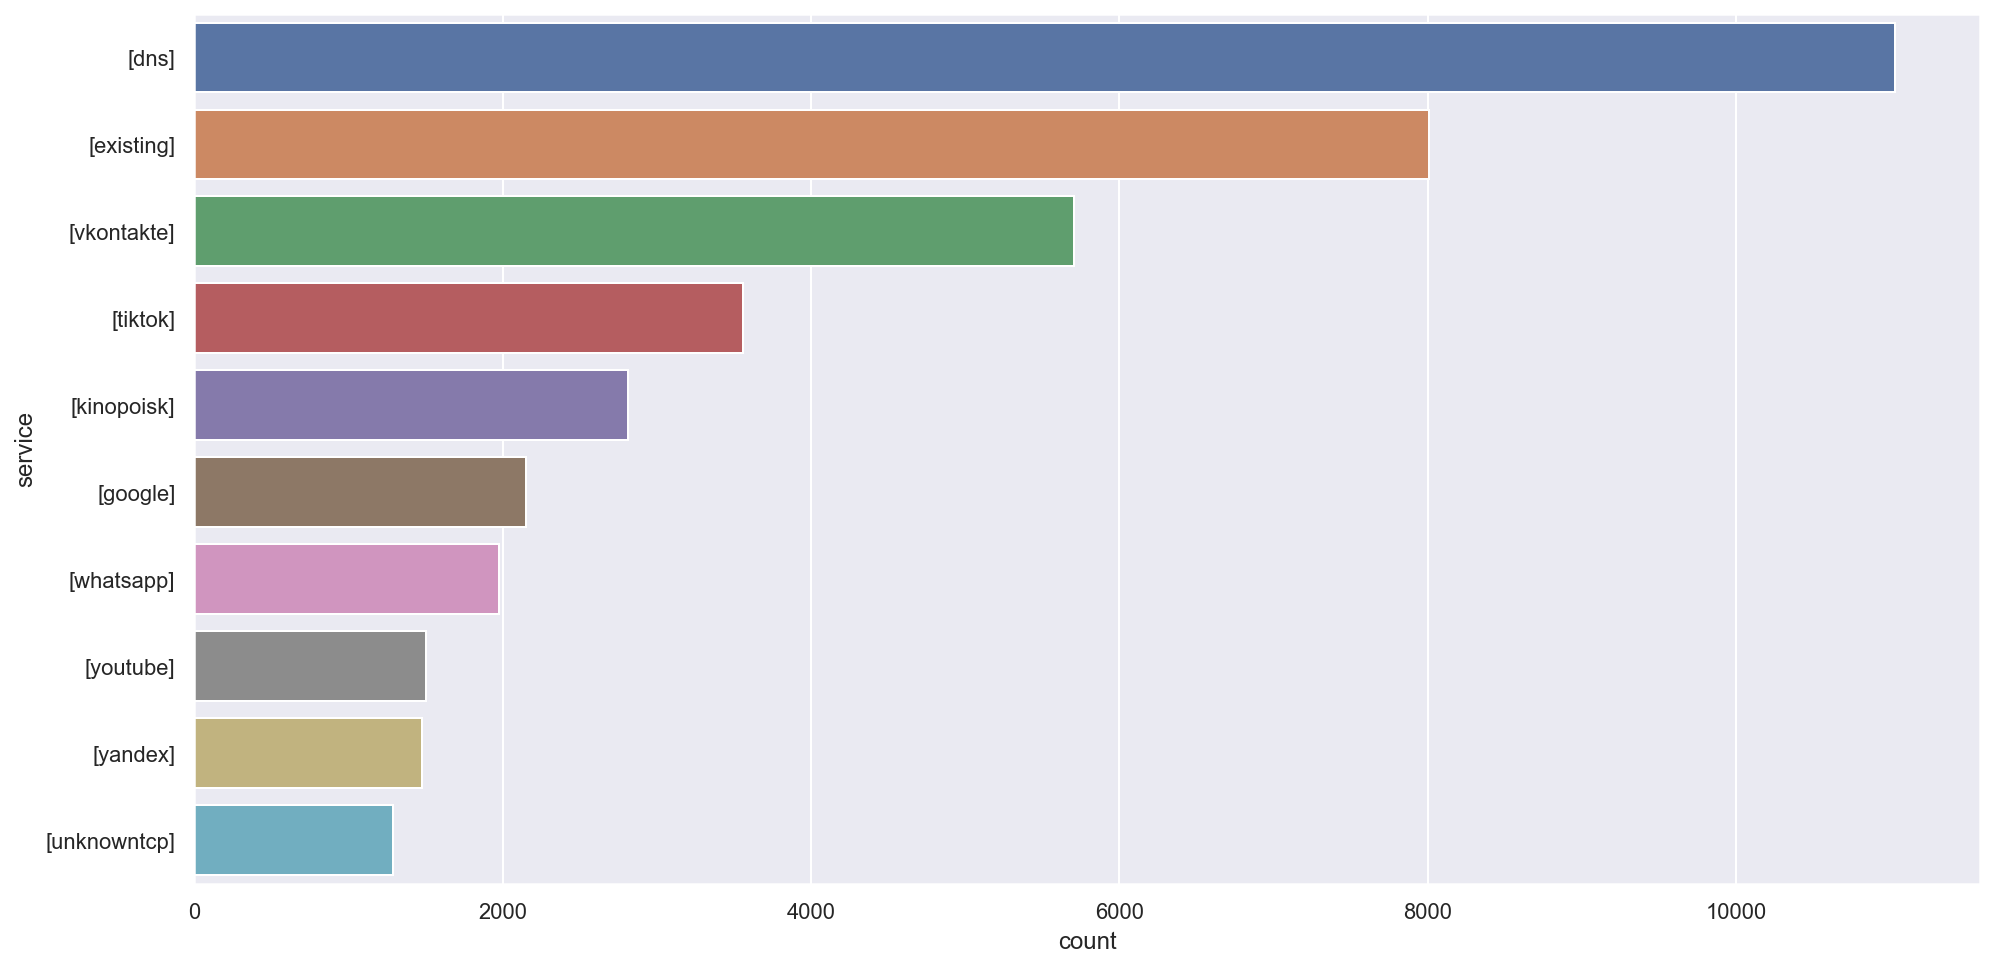

In [77]:
services_altaysk = altaysk[~altaysk['top_service'].isna()]['top_service']
df_services_altaysk = services_altaysk.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'service', 'top_service' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_services_altaysk[:10], x='count', y='service', orient='h')

## Прирост турпотока Мегафон по месяцам, 2021-2022

In [78]:
altaysk_month_2021 = altaysk.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2021', 'snap_date': 'month'})[:12]

altaysk_month_2022 = altaysk.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2022', 'snap_date': 'month'})[12:]\
.set_index([pd.Index([i for i in range(12)])])

altaysk_month = pd.concat([altaysk_month_2021, altaysk_month_2022[['tourists_2022']]], axis = 1)

altaysk_month['change_abs'] = altaysk_month['tourists_2022'] - altaysk_month['tourists_2021'] 
altaysk_month['change_%'] = (altaysk_month['change_abs'] / altaysk_month['tourists_2021']) * 100

altaysk_month

,month,tourists_2021,tourists_2022,change_abs,change_%
0,2021-01-01,813,635,-178,-21.894219
1,2021-02-01,757,677,-80,-10.568032
2,2021-03-01,794,794,0,0.000000
3,2021-04-01,1230,1765,535,43.495935
4,2021-05-01,3435,3693,258,7.510917
5,2021-06-01,7742,10047,2305,29.772669
6,2021-07-01,15374,20347,4973,32.346819
7,2021-08-01,10580,12389,1809,17.098299
8,2021-09-01,5858,3692,-2166,-36.975077
9,2021-10-01,2304,1416,-888,-38.541667


# 9. Туапсе

In [79]:
tuapse = all_cities[all_cities['city'] == 'Туапсе']
tuapse.head(1)

,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou,interests,top_service,volume_sum,dl_volume_sum,ul_volume_sum
0,2021-07-01,29d38c72bce3ef161025ff9ddf205b12,5,77,23,Туапсе,1,26,91.682495,42.052498,28155.545,NaN,NaN,NaN,NaN,NaN


## Турпоток Мегафон, 2021-2022

<AxesSubplot:xlabel='month', ylabel='tourists_tuapse'>

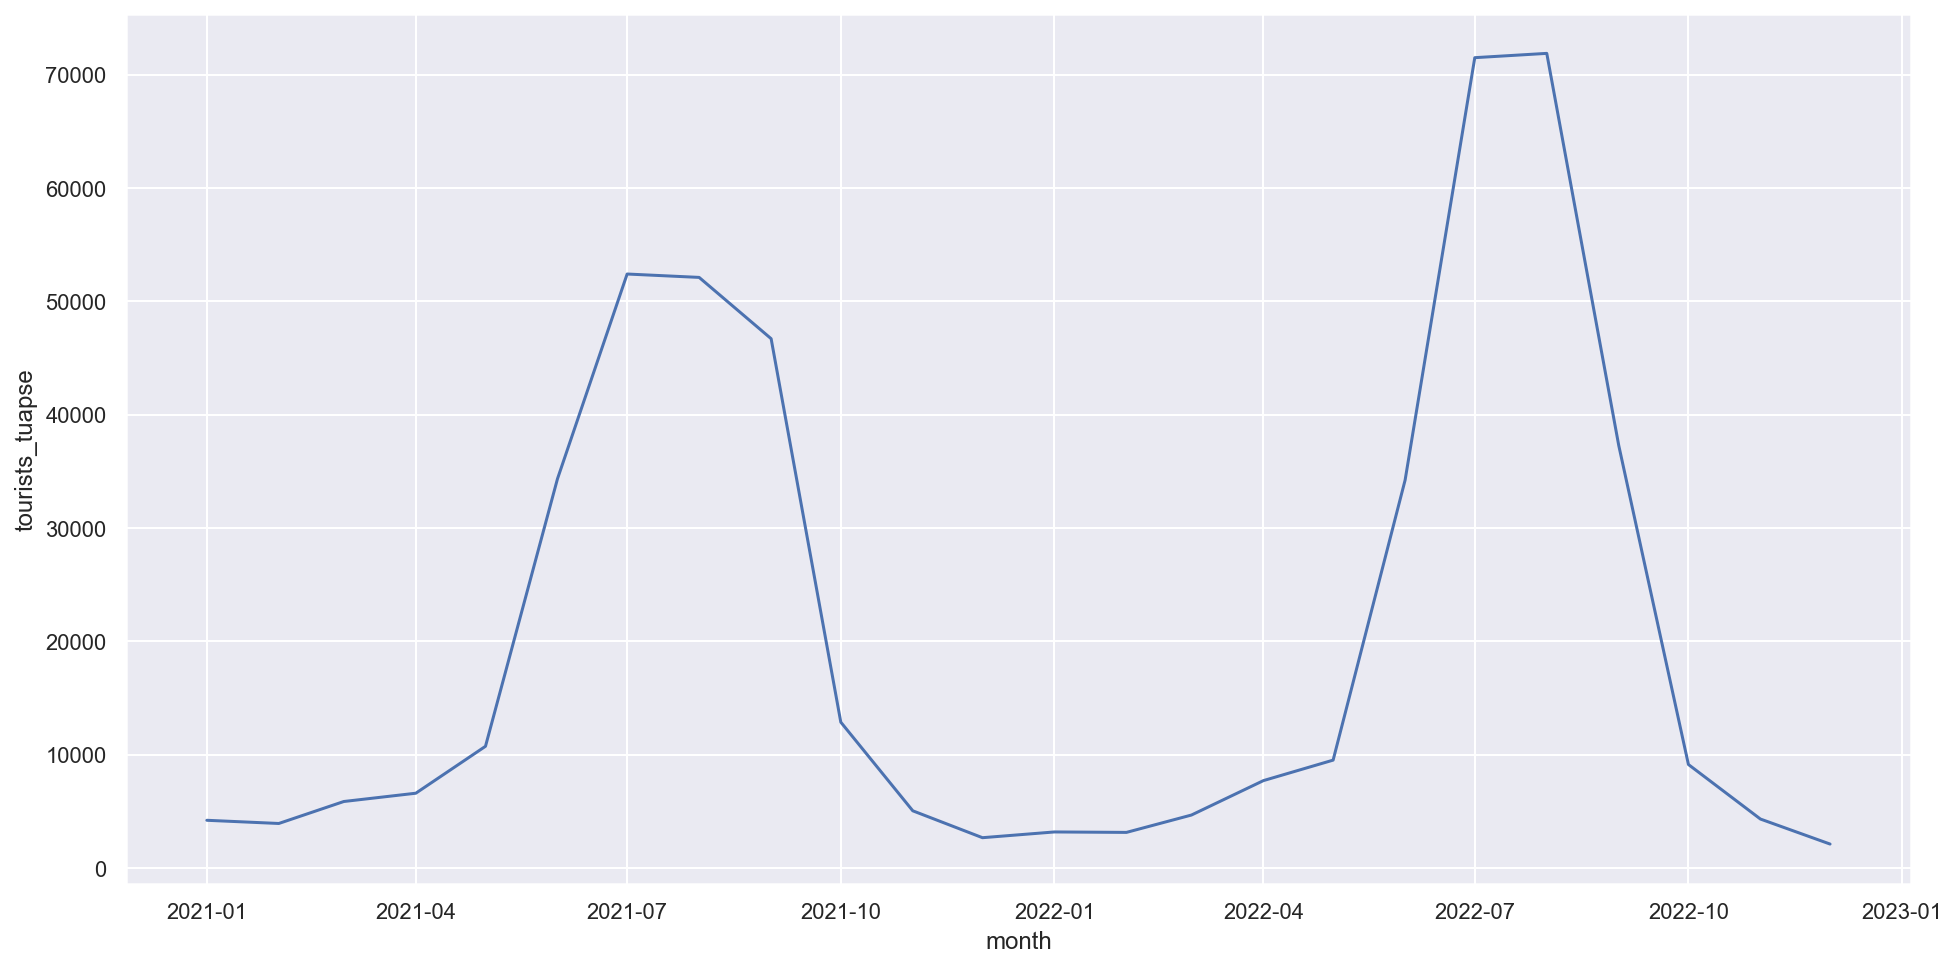

In [81]:
time_tuapse = tuapse.groupby(['snap_date'], as_index=False).agg({'id_hash' : 'count'})\
.rename(columns={'snap_date':'month', 'id_hash' : 'tourists_tuapse'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'tourists_tuapse', data = time_tuapse)

## Среднее количество дней, 2021-2022

<AxesSubplot:xlabel='month', ylabel='average_days_tuapse'>

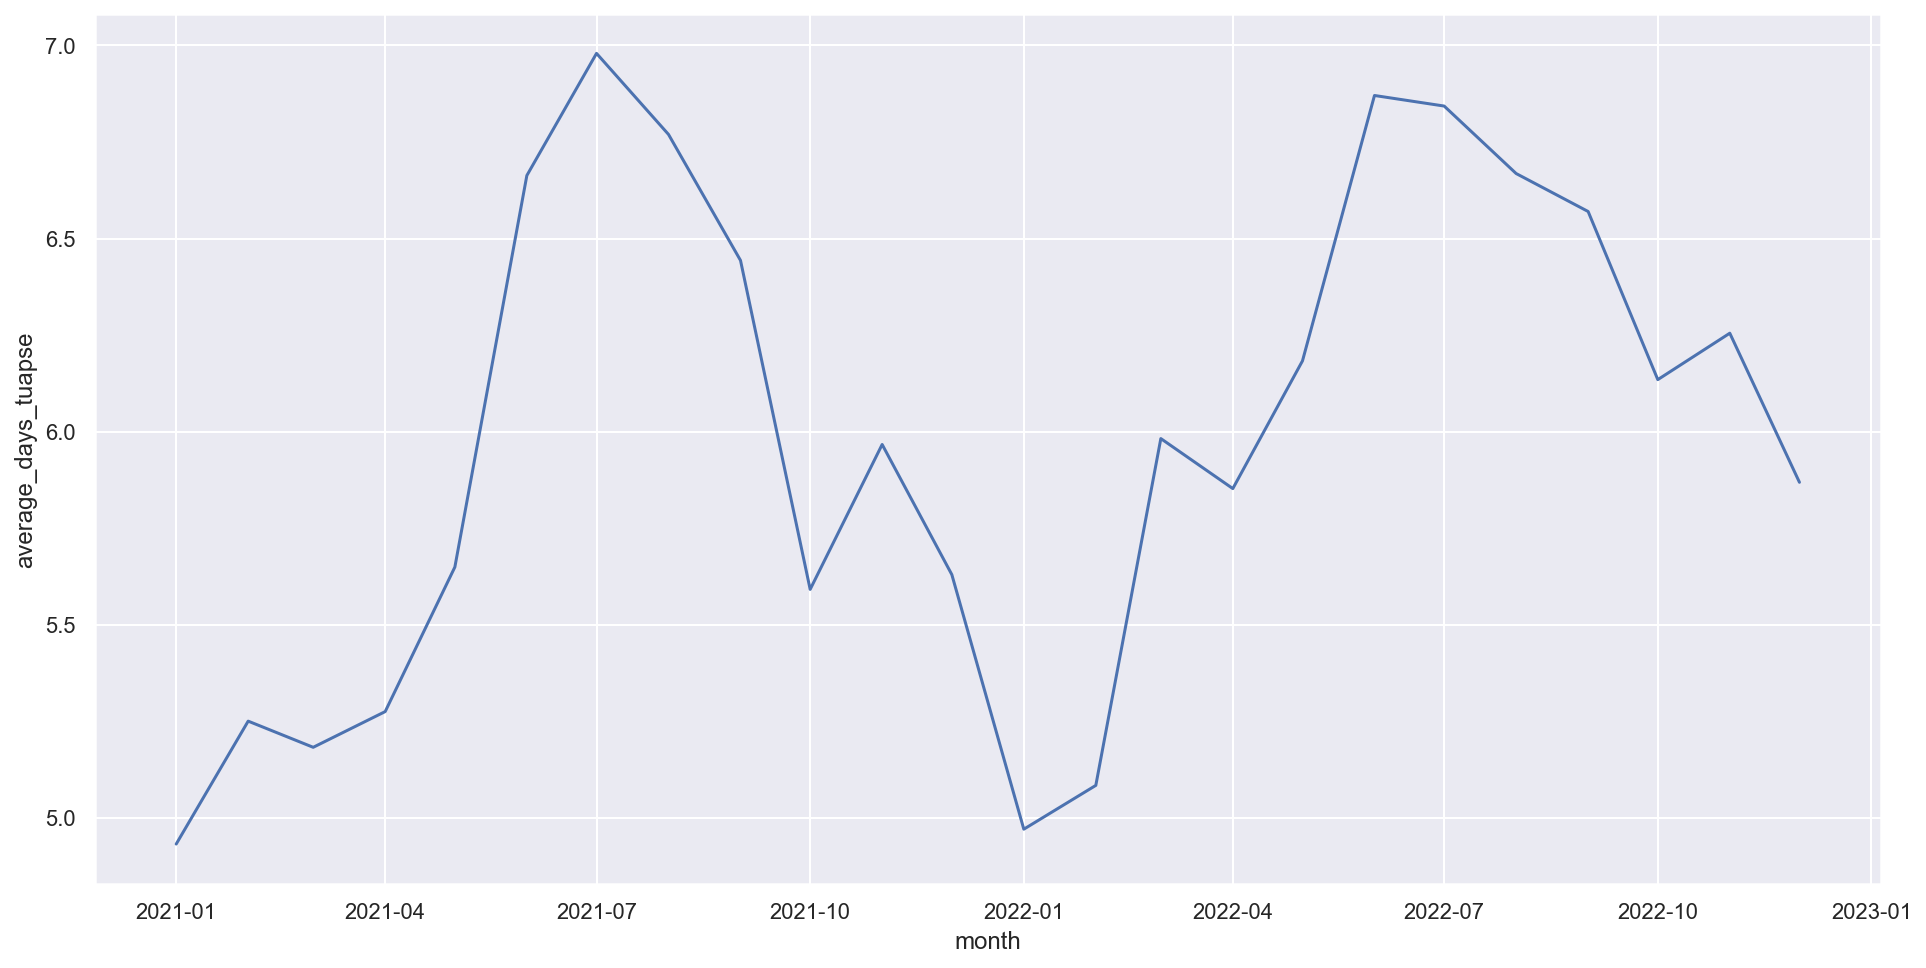

In [84]:
days_tuapse = tuapse.groupby(['snap_date'], as_index=False).agg({'days' : 'mean'})\
.rename(columns={'snap_date':'month', 'days' : 'average_days_tuapse'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(x = 'month', y = 'average_days_tuapse', data = days_tuapse)

## Топ интересы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='interest'>

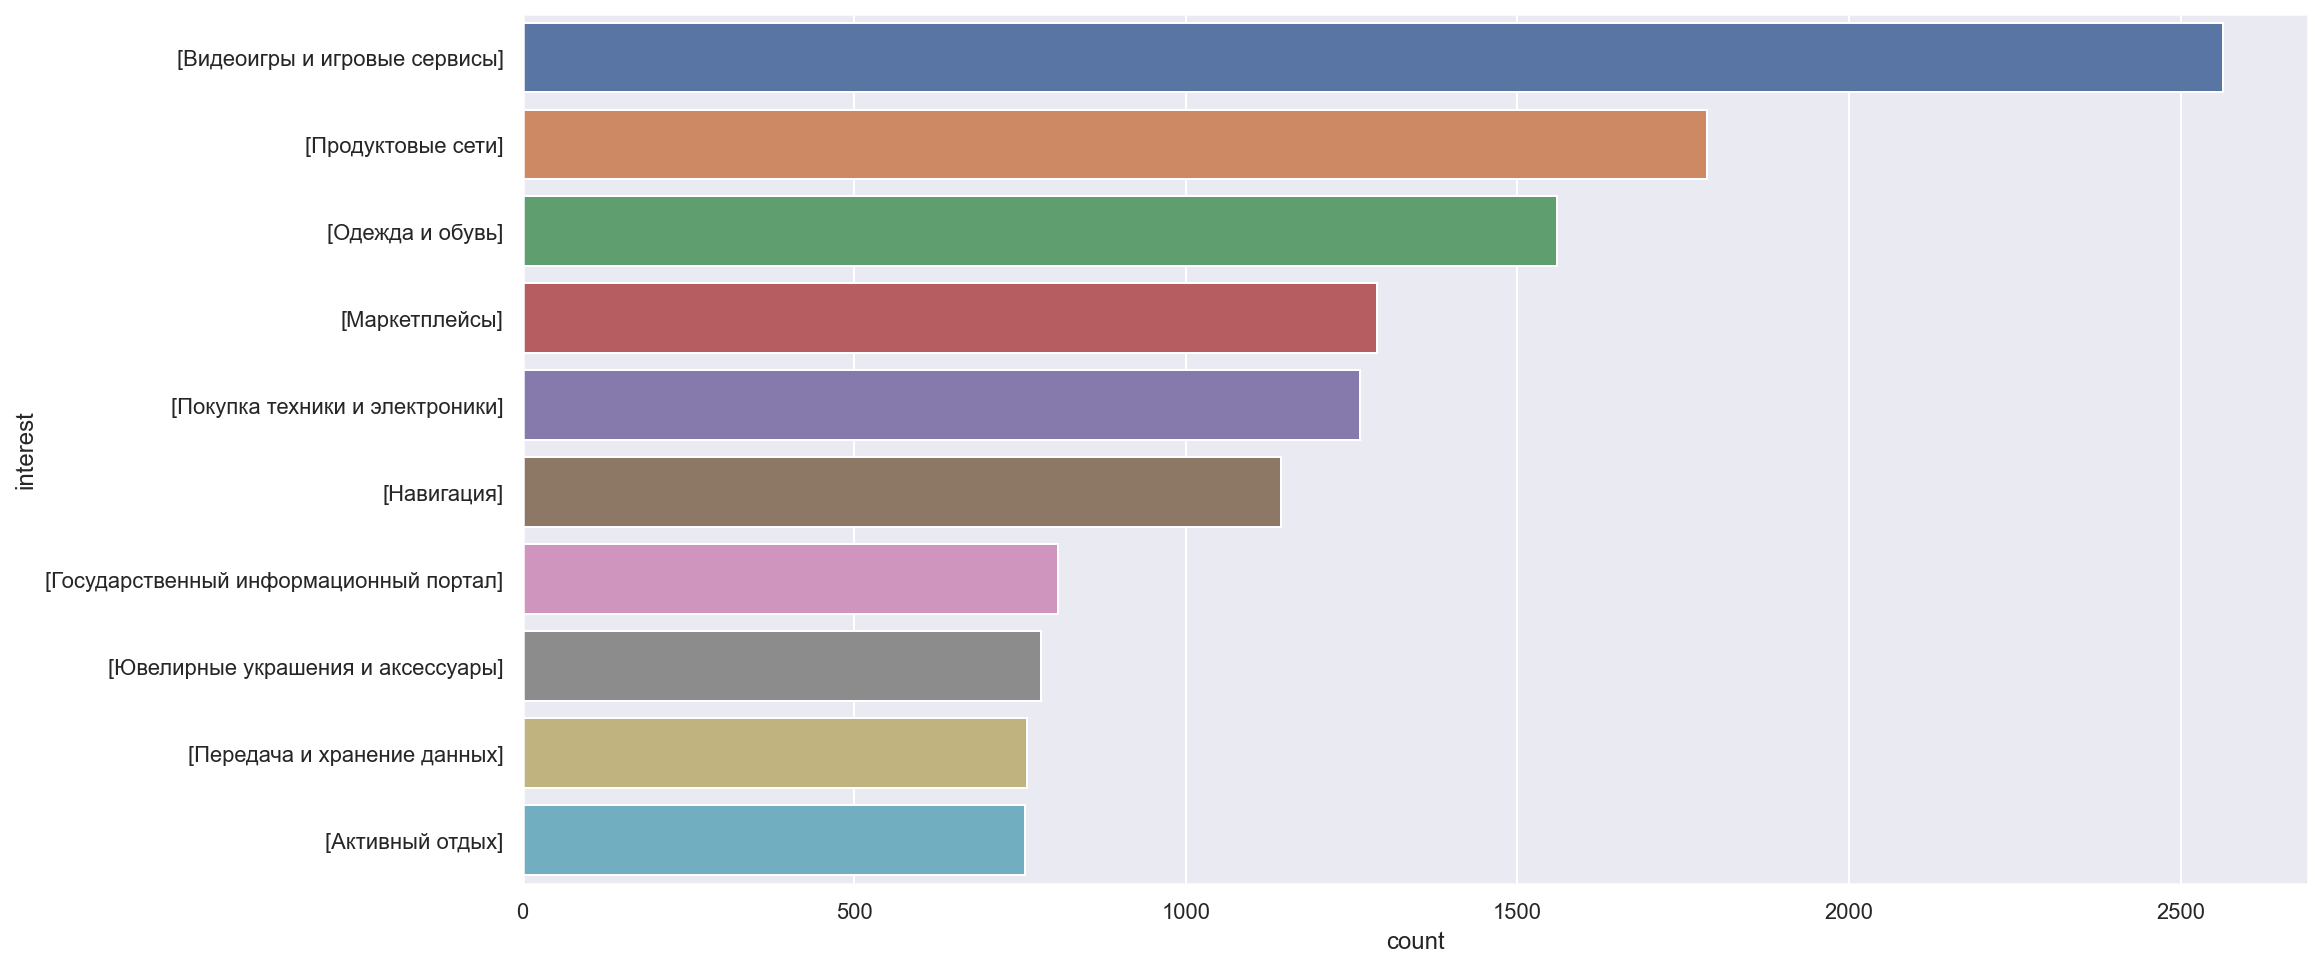

In [142]:
interests_tuapse = tuapse[~tuapse['interests'].isna()]['interests']
df_interests_tuapse= interests_tuapse.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'interest', 'interests' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_interests_tuapse[:10], x='count', y='interest', orient='h')

,interest,count
0,[Видеоигры и игровые сервисы],2564
1,[Продуктовые сети],1786
2,[Одежда и обувь],1560
3,[Маркетплейсы],1288
4,[Покупка техники и электроники],1262
5,[Навигация],1144
6,[Государственный информационный портал],808
7,[Ювелирные украшения и аксессуары],782
8,[Передача и хранение данных],760
9,[Активный отдых],757


## Топ сервисы, 2021-2022

<AxesSubplot:xlabel='count', ylabel='service'>

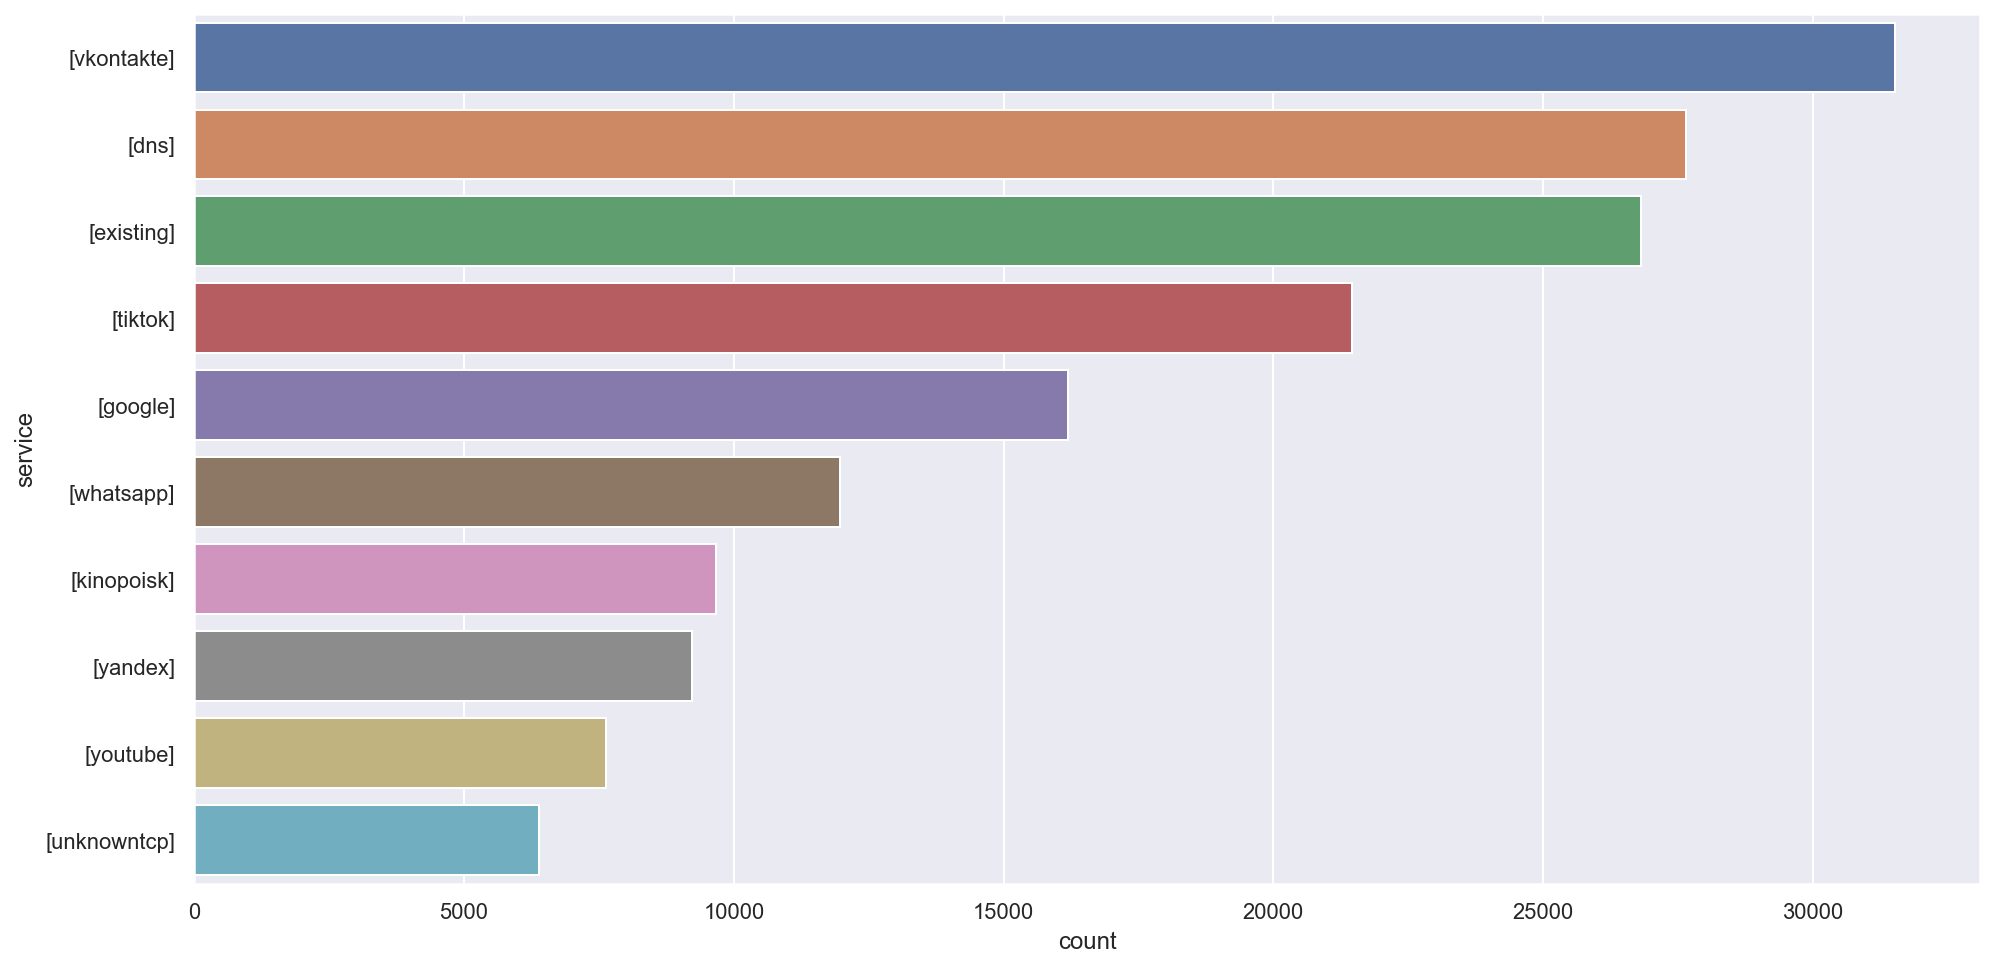

In [86]:
services_tuapse = tuapse[~tuapse['top_service'].isna()]['top_service']
df_services_tuapse = services_tuapse.value_counts().to_frame().reset_index()\
           .rename(columns={'index':'service', 'top_service' : 'count'})
sns.set(rc = {'figure.figsize':(16, 8)})
sns.barplot(data=df_services_tuapse[:10], x='count', y='service', orient='h')

## Прирост турпотока Мегафон по месяцам, 2021-2022

In [91]:
tuapse_month_2021 = tuapse.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2021', 'snap_date': 'month'})[:12]

tuapse_month_2022 = tuapse.groupby(['snap_date'],  as_index=False)\
.agg({'id_hash': 'count'})\
.rename(columns={'id_hash': 'tourists_2022', 'snap_date': 'month'})[12:]\
.set_index([pd.Index([i for i in range(12)])])

tuapse_month = pd.concat([tuapse_month_2021, tuapse_month_2022[['tourists_2022']]], axis = 1)

tuapse_month['change_abs'] = tuapse_month['tourists_2022'] - tuapse_month['tourists_2021'] 
tuapse_month['change_%'] = (tuapse_month['change_abs'] / tuapse_month['tourists_2021']) * 100

tuapse_month

,month,tourists_2021,tourists_2022,change_abs,change_%
0,2021-01-01,4224,3195,-1029,-24.360795
1,2021-02-01,3942,3155,-787,-19.964485
2,2021-03-01,5881,4687,-1194,-20.302670
3,2021-04-01,6612,7725,1113,16.833031
4,2021-05-01,10751,9531,-1220,-11.347782
5,2021-06-01,34346,34234,-112,-0.326093
6,2021-07-01,52414,71500,19086,36.413935
7,2021-08-01,52116,71879,19763,37.921176
8,2021-09-01,46709,37284,-9425,-20.178124
9,2021-10-01,12881,9144,-3737,-29.011723


----

In [ ]:
time_yuriev
time_kolchugino
time_sortavala
time_slavyansk
time_hadyjenck
time_krymsk
time_altaysk
time_tuapse

In [92]:
time_hadyjenck

,month,tourists_hadyjenck
0,2021-01-01,402
1,2021-02-01,322
2,2021-03-01,532
3,2021-04-01,687
4,2021-05-01,978
5,2021-06-01,2747
6,2021-07-01,5006
7,2021-08-01,5258
8,2021-09-01,4860
9,2021-10-01,916


In [131]:
pd.concat([time_yuriev, time_kolchugino[['tourists_kolchugino']],
                        time_sortavala[['tourists_sortavala']],
                        time_slavyansk[['tourists_slavyansk']],
                        time_hadyjenck[['tourists_hadyjenck']],
                        time_krymsk[['tourists_krymsk']],
                        time_altaysk[['tourists_altaysk']],
                        time_tuapse[['tourists_tuapse']]], axis=1)\
.to_excel('tourists_flow_cities.xlsx')
           
           
           
                                       
                                       
            

In [145]:
df_interests_yuriev

,interest,count
0,[Навигация],151
1,[Маркетплейсы],107
2,[Продуктовые сети],94
3,[Покупка техники и электроники],68
4,[Видеоигры и игровые сервисы],67
...,...,...
15409,"[Новости и СМИ, Мобильная связь и интернет, Ме...",1
15410,"[Мобильная связь и интернет, Велоспорт, Образо...",1
15411,"[Программное обеспечение, Активный отдых, Това...",1
15412,"[Технический трафик, Фильмы и сериалы, ТВ]",1


In [144]:
df_interests_yuriev[:10].to_csv('interests_yuriev.csv')
df_interests_kolchugino[:10].to_csv('interests_kolchugino.csv')
df_interests_sortavala[:10].to_csv('interests_sortavala.csv')
df_interests_slavyansk[:10].to_csv('interests_slavyansk.csv')
df_interests_hadyjenck[:10].to_csv('interests_hadyjenck.csv')
df_interests_krymsk[:10].to_csv('interests_krymsk.csv')
df_interests_altaysk[:10].to_csv('interests_altaysk.csv')
df_interests_tuapse[:10].to_csv('interests_tuapse.csv')

In [ ]:
pd.concat(df_interests_yuriev)